/Users/murtada/Documents/BU/Arabic NLP/data_BCEV2/0/testpics/10.png
/Users/murtada/Documents/BU/Arabic NLP/data_BCEV2/0/output_docscrum/.DS_Store
0.00	0.00	/Users/murtada/Documents/BU/Arabic NLP/data_BCEV2/0/testpics/10.png
Total  704  characters are found.
0.09	0.09	got characters


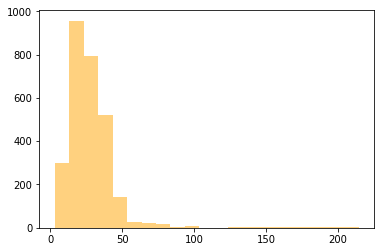

Total 2816 all NNs
('average NN distance: ', 28.15050159941393)


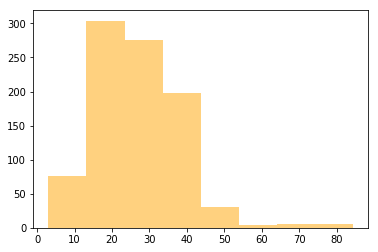

Total 898 hor NNs
Distance peaks: [13, 23, 33, 3, 43, 74, 64, 53]
average NN horizontal distance: 27.19



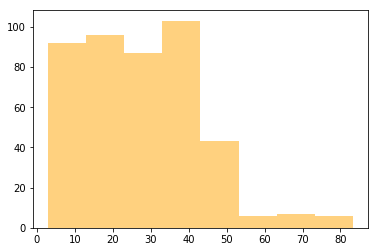

Total 440 ver NNs
Distance peaks: [33, 13, 3, 23, 43, 63, 53, 73, 53, 73]
average NN vertical distance: 27.66

0.93	0.84	got words & tuples
Total  304  words are found.
0.99	0.06	built Docstrum
1.00	0.01	finished analysing page
average time: 0.88

Done.


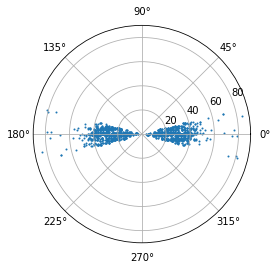

In [33]:
#!/usr/bin/python
# find . -name '.DS_Store' -type f -delete
# Chulwoo Pack

import sys
import os
from page import Page

SHOW_STEPS = False    # change this to false if you just want to see the final output for each page.
SAVE_OUTPUT = False
SAVE_DOCSTRUM = False

inputFolder = os.path.join('/Users/murtada/Documents/BU/Arabic NLP/data_BCEV2/0/testpics')
outputFolder = os.path.join('/Users/murtada/Documents/BU/Arabic NLP/data_BCEV2/0/output_docscrum')
    
inputPath = os.path.join(inputFolder, os.listdir(inputFolder)[1])
outputPath = os.path.join(outputFolder, os.listdir(inputFolder)[0])
print(inputPath)
print(outputPath)
page = Page(inputPath, SHOW_STEPS, SAVE_DOCSTRUM)
#page = Page(inputPath, SHOW_STEPS)
    
if SAVE_OUTPUT:
    page.save(outputPath)  # save a copy of what is displayed. Used for getting images for the paper.
    
page.show((800, 800))

In [3]:
inputPath

'/Users/murtada/Documents/BU/Arabic NLP/data_BCEV2/0/testpics/10.png'

In [32]:
# LINE EXTRACTION TESTING

import sys
import os
from page import Page

import cv2
import math
import numpy
import subprocess
import os

import colors
import geometry as g
from box import Box
import text
from dimension import Dimension
from stopwatch import Stopwatch
import numpy
import matplotlib.pyplot as plt
import ntpath


SHOW_STEPS = True    # change this to false if you just want to see the final output for each page.
SAVE_OUTPUT = True
SAVE_DOCSTRUM = False

inputFolder = os.path.join('images')
outputFolder = os.path.join('output')

    
inputPath = os.path.join(inputFolder, os.listdir(inputFolder)[0])
outputPath = os.path.join(outputFolder, os.listdir(inputFolder)[0])

page = Page(inputPath, SHOW_STEPS, SAVE_DOCSTRUM)


if True:
    page.save(outputPath)  # save a copy of what is displayed. Used for getting images for the paper.
    
page.show((800, 800))

OSError: [Errno 2] No such file or directory: 'images'

In [ ]:
print("%.2f" %1.237)

In [34]:
for line in page.lines:
    line.group = None

for line in page.lines:
    print(line.group)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [35]:
#NER VERSION: ADJUSTIVE SEARCHING ORDER
import cv2
import math
from shapely.geometry import Point            # For checking overlap
from shapely.geometry.polygon import Polygon  # For checking overlap
from shapely.geometry import MultiPoint       # For checking overlap

import progressbar      # For displaying progressbar
from time import sleep  # For displaying progressbar

#from stopwatch import Stopwatch   # For checking run-time

#stopwatch = Stopwatch()

image = page.image.copy()

EPS = 1e-10
group_idx = 0
threshold_angle = 1.0
threshold_paralldist = 1.7 * 13.0
threshold_perpendist = 1.7 * 17.0 #[1.5~1.7]
threshold_overlap    = 1.0
threshold_early_skip = 100
threshold_visualize_line_width = 5

SHOW_DETAIL      = False
SHOW_VISUAL_STEP = False
EARLY_SKIP       = False

########
# INIT #
########
# Get lines
_my_lines  = page.lines
# Remove dots
my_lines = []
for _my_line in _my_lines:
    if(_my_line.start.x-_my_line.end.x==0 and _my_line.start.y-_my_line.end.y==0):
        continue
    else:
        my_lines.append(_my_line)
# Sorting lines
my_lines.sort(key=lambda line:((line.start.y+line.end.y)/2,(line.start.x+line.end.x)/2))
# Lines assigned a group
my_lines_in_group = []
# Lines not assigned any group yet
my_lines_no_group = []
for i in range(0,len(my_lines)-1):
    my_lines_no_group.append(i)
if SHOW_DETAIL: print("no_group:",my_lines_in_group)
if SHOW_DETAIL: print("in_group:",my_lines_no_group)
# First line, not dot (its index, i)

bar = progressbar.ProgressBar(maxval=len(my_lines_no_group), \
            widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
progress_idx = 0
bar.start()
# print("BAR REMOVED")
max_loop = len(my_lines)
#act_loop = 0

for act_loop in xrange(max_loop): # Make sure looked up every lines   
    #flag_found_none = True
    if ((len(my_lines_in_group) == 0) and (len(my_lines_no_group) == 0)):
        break
    #test_act_loop = test_act_loop+1
    
    progress_idx = progress_idx+2 # Update progressbar
    bar.update(act_loop)      # Update progressbar
    sleep(0.1)
#     print("#BAR PROGRESS STEP#")
    #######################
    # Set the ith element #
    #######################
    i = -1
    if EARLY_SKIP:
        early_skip = threshold_early_skip
    ## TODO: Since, currently there is no lines in my_lines_in_group queue and lines are remained, find another line as ith element in my_lines_no_group queue with excluding dots. 
    if(len(my_lines_in_group) == 0):
        delta_x_i = 0
        delta_y_i = 0
        for candidate_line_idx in my_lines_no_group[:]:
            x_O_i = my_lines[candidate_line_idx].start.x
            y_O_i = page.image.shape[0] - my_lines[candidate_line_idx].start.y
            x_F_i = my_lines[candidate_line_idx].end.x
            y_F_i = page.image.shape[0] - my_lines[candidate_line_idx].end.y 
            #delta_x_i = abs(x_F_i - x_O_i)
            delta_x_i = float(x_F_i - x_O_i)
            #delta_y_i = abs(y_F_i - y_O_i)
            delta_y_i = float(y_F_i - y_O_i)
            if (delta_x_i != 0 and delta_y_i != 0): # Found!
                i = candidate_line_idx
                my_lines_no_group.remove(candidate_line_idx)
                break
    else:
        i = my_lines_in_group.pop(0)
        
    
    # TODO: more sophisticated way to break?
    if (i == -1):
        break
    
    # Visualize ith element
    if SHOW_VISUAL_STEP:
        image = page.image.copy()
        cv2.line(image, ((my_lines[i].start.x,my_lines[i].start.y)),((my_lines[i].end.x,my_lines[i].end.y)), (0,0,255),threshold_visualize_line_width)
        page.display(image, title='Visualization of text-line groupping step')
                                                       
    # No more lines to search
    if (len(my_lines_no_group) == 0):
        break
    else:
        my_lines[i].noise = False  # This assure that dot-wise noise to be excluded from grouping process
        #######################
        # Set the jth element #
        #######################
        for j in my_lines_no_group[:]:
            if EARLY_SKIP:
                if early_skip < 0:
                    break
            if SHOW_VISUAL_STEP:
                cv2.line(image, ((my_lines[j].start.x,my_lines[j].start.y)),((my_lines[j].end.x,my_lines[j].end.y)), (255,0,0),threshold_visualize_line_width)
                page.display(image, title='Visualization of text-line groupping step')

            sameGroup = False
            ################################
            # CALCULATE GEOMETRIC FEATURES #
            ################################
            # Point setting
            x_O_i = my_lines[i].start.x
            y_O_i = page.image.shape[0] - my_lines[i].start.y
            x_F_i = my_lines[i].end.x
            y_F_i = page.image.shape[0] - my_lines[i].end.y 

            x_O_j = my_lines[j].start.x
            y_O_j = page.image.shape[0] - my_lines[j].start.y
            x_F_j = my_lines[j].end.x
            y_F_j = page.image.shape[0] - my_lines[j].end.y

            #delta_x_i = abs(x_F_i - x_O_i)
            #delta_y_i = abs(y_F_i - y_O_i)
            #delta_x_j = abs(x_F_j - x_O_j)
            #delta_y_j = abs(y_F_j - y_O_j)
            delta_x_i = float(x_F_i - x_O_i)
            delta_y_i = float(y_F_i - y_O_i)
            delta_x_j = float(x_F_j - x_O_j)
            delta_y_j = float(y_F_j - y_O_j)
            
            
            # ith or jth line is dot, so skip it
            if (delta_x_j == 0 and delta_y_j == 0):
                my_lines_no_group.remove(j)
                continue

            if SHOW_DETAIL:
                print("\n****************************************************************")
                print("# of in_group:",len(my_lines_in_group),my_lines_in_group)
                print("# of no_group:",len(my_lines_no_group),my_lines_no_group)
                print(i, my_lines[i].points)
                print(j, my_lines[j].points)
                print("i:",x_O_i,y_O_i,"-",x_F_i,y_F_i)
                print("j:",x_O_j,y_O_j,"-",x_F_j,y_F_j)

            # Calculate angle
            theta_i_j = math.atan2(delta_y_j,delta_x_j-math.atan2(delta_y_i,delta_x_i))
            if SHOW_DETAIL:
                print("Angle:",theta_i_j)

            # Calculate overlap
            #if delta_x_j == 0:
            #    delta_x_j = 0.1
            #if delta_y_i == 0:
            #    delta_y_i = 0.1
            #if delta_y_j == 0:
            #    delta_y_j = 0.1
            #if delta_x_i == 0:
            #    delta_x_i = 0.1


            x_A_j = (x_O_i*delta_x_i*delta_x_j + x_O_j*delta_y_i*delta_y_j + delta_x_j*delta_y_i*(y_O_i-y_O_j))/(delta_y_i*delta_y_j + delta_x_i*delta_x_j + EPS)
            if (delta_x_j != 0):
                y_A_j = (delta_y_j/delta_x_j)*(x_A_j - x_O_j) + y_O_j
            else:
                x_A_j = y_O_j

            x_B_j = (x_F_i*delta_x_i*delta_x_j + x_F_j*delta_y_i*delta_y_j + delta_x_j*delta_y_i*(y_F_i-y_F_j))/(delta_y_i*delta_y_j + delta_x_i*delta_x_j + EPS)
            if (delta_x_j != 0):
                y_B_j = (delta_y_j/delta_x_j)*(x_B_j - x_F_j) + y_F_j
            else:
                x_B_j = y_F_j

            # Find C and D ponts
            #x_middle_candidates = [x_O_j, x_F_j, x_A_j, x_B_j]
            #x_middle_candidates.sort()
            #y_middle_candidates = [y_O_j, y_F_j, y_A_j, y_B_j]
            #y_middle_candidates.sort()
            C_D_candidates = [(x_O_j,y_O_j), (x_F_j,y_F_j), (x_A_j,y_A_j), (x_B_j,y_B_j)]
            if (delta_x_j != 0):
                C_D_candidates.sort(key=lambda x:x[0]) # sort by x
            elif (delta_y_j != 0):
                C_D_candidates.sort(key=lambda x:x[1]) # sort by y
            x_C_j,y_C_j = C_D_candidates[1]
            x_D_j,y_D_j = C_D_candidates[2]

            if SHOW_DETAIL:
                print("x_A_j,y_A_j",x_A_j,y_A_j)
                print("x_B_j,y_B_j",x_B_j,y_B_j)
                print("x_C_j,y_C_j",x_C_j,y_C_j)
                print("x_D_j,y_D_j",x_D_j,y_D_j)

            #x_i_j_components = [int(x_O_i), int(x_F_i), int(x_O_j), int(x_F_j)]
            #x_i_j_components.sort()
            #y_i_j_components = [int(y_O_i), int(y_F_i), int(y_O_j), int(y_F_j)]
            #y_i_j_components.sort()
            # convert to int in order to allow generous overlap
            #if ((int(x_O_j) <= int(x_C_j) <= int(x_F_j) and (int(y_O_j) <= int(y_C_j) <= int(y_F_j) or int(y_F_j) <= int(y_C_j) <= int(y_O_j))) or (int(x_O_i) <= int(x_C_j) <= int(x_F_i) and (int(y_O_i) <= int(x_C_j) <= int(y_F_i) or int(y_F_i) <= int(y_C_j) <= int(y_O_i)))) and ((int(x_O_j) <= int(x_D_j) <= int(x_F_j) and (int(y_O_j) <= int(y_D_j) <= int(y_F_j) or int(y_F_j) <= int(y_D_j) <= int(y_O_j))) or (int(x_O_i) <= int(x_D_j) <= int(x_F_i) and (int(y_O_i) <= int(y_D_j) <= int(y_F_i) or int(y_F_i) <= int(y_D_j) <= int(y_O_i)))):
            #if ((x_i_j_components[0] <= int(x_C_j[0]) <= x_i_j_components[-1]) and (y_i_j_components[0] <= int(y_C_j) <= y_i_j_components[-1]) and (x_i_j_components[0] <= int(x_D_j) <= x_i_j_components[-1]) and (y_i_j_components[0] <= int(y_D_j) <= y_i_j_components[-1])):
            #convex_hull = MultiPoint([(x_O_j, y_O_j), (x_O_j, y_F_j), (x_F_j, y_F_j), (x_F_j, y_O_j)])
            #polygon = Polygon([(x_O_i, y_O_i), (x_F_i, y_F_i),(x_F_j, y_F_j), (x_O_j, y_O_j)])
            #convex_hull = MultiPoint([(x_O_i, y_O_i), (x_F_i, y_F_i),(x_F_j, y_F_j), (x_O_j, y_O_j)]).convex_hull
            polygon = Polygon([(x_O_j, y_O_j), (x_O_j, y_F_j), (x_F_j, y_F_j), (x_F_j, y_O_j)])
            C_point = Point(x_C_j, y_C_j)
            D_point = Point(x_D_j, y_D_j)
            #if polygon.area != convex_hull.area:
            #    overlap = False
            #elif (convex_hull.contains(C_point) and convex_hull.contains(D_point)):
            #if (convex_hull.contains(C_point) and convex_hull.contains(D_point)):
            if (polygon.contains(C_point) or polygon.touches(C_point)) and (polygon.contains(D_point) or polygon.touches(D_point)):
                overlap = True
            else:
                overlap = False
            
            #p_j = (math.sqrt(math.pow(y_D_j-y_C_j,2)+math.pow(x_D_j-x_C_j,2)))/2.0
            p_j = math.sqrt(math.pow(y_D_j-y_C_j,2)+math.pow(x_D_j-x_C_j,2))
            l_j = math.sqrt(math.pow(y_F_j-y_O_j,2)+math.pow(x_F_j-x_O_j,2))
            if (l_j == 0):
                l_j = 0.1
            if overlap:
                p_i_j = p_j/l_j
            else:
                p_i_j = -p_j/l_j

            if SHOW_DETAIL:
                print("Overlap?",overlap)
                print("p_j:",p_j)
                print("p_i_j:",p_i_j)

            # Calculate parallel_dist
            if overlap:
                d_i_j_a = p_j
            else:
                d_i_j_a = -p_j
            if SHOW_DETAIL:
                print("parallel_dist: ",d_i_j_a)

            # Calculate perpend_dist
            x_M_j = (x_C_j + x_D_j)/2.0
            y_M_j = (y_C_j + y_D_j)/2.0
            if SHOW_DETAIL:
                print("x_M_j,y_M_j",x_M_j,y_M_j)
                print("delta_x_i:",delta_x_i)
                print("delta_y_i:",delta_y_i)
                print("delta_x_j:",delta_x_j)
                print("delta_y_j:",delta_y_j)

            if delta_x_i != 0.0 and delta_y_i != 0.0:
                d_e_i_j = ((x_M_j - x_O_i) - (y_M_j - y_O_i)*delta_x_i/(delta_y_i + EPS))/((delta_x_i**2)/(delta_y_i**2 + EPS) + 1)**0.5 
            elif delta_y_i == 0.0:
                d_e_i_j = int(y_M_j) - int(y_O_i)
            elif delta_x_i == 0.0:
                d_e_i_j = int(x_M_j) - int(x_O_i)
            d_e_i_j = abs(d_e_i_j)

            if SHOW_DETAIL:
                print("perpend_dist: ",d_e_i_j)

            ######################
            # DECIDING GROUPNESS #
            #######################
            # 1. angle check
            if theta_i_j < threshold_angle:
                if SHOW_DETAIL: print("... Angle ok!")
            # 2. perpend_dist check
                if 0 < d_e_i_j < threshold_perpendist:
                    if SHOW_DETAIL: print("... Perpendicular ok!")
            # 3.a. overlap check
            # 3.b. parallel_dist check
                    if ((overlap and p_i_j <= threshold_overlap)):
                        if SHOW_DETAIL: print("... Overlap & p_i_j ok!")
                        # Group!
                        sameGroup = True
                    elif (abs(d_i_j_a) < threshold_paralldist):
                        if SHOW_DETAIL: print("... Parallel ok!")
                        # Group!
                        sameGroup = True

            if SHOW_DETAIL:
                print("same group? ",sameGroup)
            if sameGroup:

                if EARLY_SKIP:
                    early_skip = threshold_early_skip
                if SHOW_DETAIL:
                    print("before group idx: ",group_idx)
                    print("before i's group: ", my_lines[i].group)
                    print("before j's group: ", my_lines[j].group)
                if (my_lines[i].group == None) and (my_lines[j].group == None):
                    if SHOW_DETAIL:
                        print("... case 1")
                    # Assign to a new block
                    group_idx = group_idx + 1
                    my_lines[i].group = group_idx
                    my_lines[j].group = group_idx
                    #my_lines_no_group.remove(i)     # update queue
                    my_lines_in_group.append(i)     # update queue
                    my_lines_no_group.remove(j)     # update queue
                    my_lines_in_group.append(j)     # update queue
                elif (my_lines[i].group == None):
                    if SHOW_DETAIL: print("... case 2")
                    # Unassigned text-line is assigned to the block of the other
                    my_lines[i].group = my_lines[j].group
                    #my_lines_no_group.remove(i)     # update queue
                    my_lines_in_group.append(i)     # update queue
                elif (my_lines[j].group == None):
                    if SHOW_DETAIL: print("... case 3")
                    # Unassigned text-line is assigned to the block of the other
                    my_lines[j].group = my_lines[i].group
                    my_lines_no_group.remove(j)     # update queue
                    my_lines_in_group.append(j)     # update queue
                if SHOW_DETAIL: print("after group idx: ",group_idx)
                if SHOW_DETAIL: print("after i's group: ", my_lines[i].group)
                if SHOW_DETAIL: print("after j's group: ", my_lines[j].group)
                if SHOW_VISUAL_STEP:
                    cv2.line(image, ((my_lines[j].start.x,my_lines[j].start.y)),((my_lines[j].end.x,my_lines[j].end.y)), (0,255,0),threshold_visualize_line_width)
                    page.display(image, title='Visualization of text-line groupping step')
            else:
                if EARLY_SKIP:
                    early_skip = early_skip - 1
            
        if (my_lines[i].noise == False and my_lines[i].group == None):
            group_idx = group_idx + 1
            my_lines[i].group = group_idx
bar.finish()

print("Total iter: [%d/%d]" %(act_loop,max_loop))
print("Done!")

[========================================================================] 100%


Total iter: [125/126]
Done!


In [26]:
my_lines

[<geometry.Line instance at 0x81d9c5fa0>,
 <geometry.Line instance at 0x81d9fb500>,
 <geometry.Line instance at 0x81d9dbfa0>,
 <geometry.Line instance at 0x81da1eb40>,
 <geometry.Line instance at 0x81da2ef00>,
 <geometry.Line instance at 0x81d9d7eb0>,
 <geometry.Line instance at 0x81d9e7dc0>,
 <geometry.Line instance at 0x81da42eb0>,
 <geometry.Line instance at 0x81d9dba00>,
 <geometry.Line instance at 0x81da036e0>,
 <geometry.Line instance at 0x81d9ce3c0>,
 <geometry.Line instance at 0x81da12870>,
 <geometry.Line instance at 0x81da1e9b0>,
 <geometry.Line instance at 0x81d9dbd20>,
 <geometry.Line instance at 0x81d9eb5a0>,
 <geometry.Line instance at 0x81da2b140>,
 <geometry.Line instance at 0x81d9d7a00>,
 <geometry.Line instance at 0x81da17410>,
 <geometry.Line instance at 0x81da2bcd0>,
 <geometry.Line instance at 0x81d9d73c0>,
 <geometry.Line instance at 0x81d9e0230>,
 <geometry.Line instance at 0x81da179b0>,
 <geometry.Line instance at 0x81da23820>,
 <geometry.Line instance at 0x81d9

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 6. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 6. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 6. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[6. 4. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[10.         10.97560976 11.95121951 12.92682927 13.90243902 14.87804878
 15.85365854 16.82926829 17.80487805 18.7804878  19.75609756 20.73170732
 21.70731707 22.68292683 23.65853659 24.63414634 25.6097561  26.58536585
 27.56097561 28.53658537 29.51219512 30.48780488 31.46341463 32.43902439
 33.41463415 34.3902439  35.36585366 36.34146341 37.31707317 38.29268293
 39.26829268 40.24390244 41.2195122  42.19512195 43.17073171 44.14634146
 45.12195122 46.09756098 47.07317073 48.04878049 49.024390

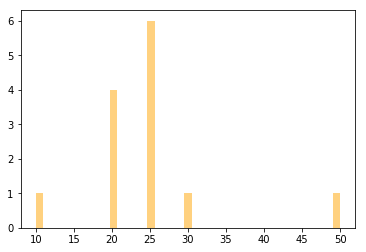

In [17]:

dist = [10,20,20,50,20,20,30,25,25,25,25,25,25]
n, bins, patches = plt.hist(dist, numpy.max(dist)-numpy.min(dist)+1, facecolor='orange', alpha=0.5)
n_copy = n.copy()
print(n)
print(n_copy)
n_copy[::-1].sort()
print(n)
print(n_copy)
print(bins)
print(numpy.argmax(n)+numpy.min(dist))
print(bins.max())

#n_copy[::-1].sort()
a = numpy.where(n == n_copy[2])
print("Test",a)

if len(a[0])>1:
    _max = a[0][int(len(a[0])/2)]
else:
    _max = a[0][0]

_max+numpy.min(dist)

for i in range(5):
    print(i)

In [18]:
peakind = signal.find_peaks_cwt([10,20,20,50,20,20,30], np.arange(1,10))

NameError: name 'signal' is not defined

In [19]:
peakind

NameError: name 'peakind' is not defined

In [ ]:
x_O_i = 491
y_O_i = 615
x_F_i = 757
y_F_i = 600
x_O_j = 491
y_O_j = 615
x_F_j = 757
y_F_j = 600
x_C_j = 757
y_C_j = int(637.6500942238861)

delta_y_j = 7.0
delta_x_j = 658.0
x_A_j = 4144.4503916449075
x_F_j = 3890.0
y_F_j = 1856.0
(delta_y_j/delta_x_j)*(x_A_j - x_F_j) + y_F_j


In [ ]:
('i:', 2639, 4875, '-', 2676, 4872)
('j:', 992, 4892, '-', 2222, 4879)
('Angle:', -0.010568017106413556)
('x_A_j,y_A_j', 2638.9670025686564, 4874.593031680169)
('x_B_j,y_B_j', 2676.178357373372, 4874.19974093833)
('x_C_j,y_C_j', 2222, 4879)
('x_D_j,y_D_j', 2638.9670025686564, 4874.593031680169)

x_O_i = 2639
y_O_i = 4875
x_F_i = 2676
y_F_i = 4872

x_O_j = 896
y_O_j = 4802
x_F_j = 1415
y_F_j = 4805

x_C_j = 2222
y_C_j = 4879
x_D_j = 2638#.9670025686564
y_D_j = 4874#.593031680169


#polygon = Polygon([(x_O_i-1, y_O_i+1), (x_F_i+1, y_F_i+1),(x_F_j+1, y_F_j-1), (x_O_j-1, y_O_j-1)])
polygon = Polygon([(x_O_i, y_O_i), (x_F_i, y_F_i),(x_F_j, y_F_j), (x_O_j, y_O_j)])
#C_point = Point(x_C_j, y_C_j)
#D_point = Point(x_D_j, y_D_j)
polygon.area

In [ ]:
from shapely.geometry import MultiPoint
convex_hull = MultiPoint([(x_O_i, y_O_i), (x_F_i, y_F_i),(x_F_j, y_F_j), (x_O_j, y_O_j)]).convex_hull
convex_hull.area

In [ ]:
x_O_j = 2476
y_O_j = 1938
x_F_j = 2840
y_F_j = 1932
x_A_j = 2363
y_A_j = 1939
x_B_j = 2631
y_B_j = 1935

C_D_candidates = [(x_O_j,y_O_j), (x_F_j,y_F_j), (x_A_j,y_A_j), (x_B_j,y_B_j)]
C_D_candidates.sort(key=lambda x:x[0])
print(C_D_candidates[1])
print(C_D_candidates[2])


In [ ]:
C_D_candidates

In [ ]:
C_D_candidates

In [ ]:
C_x,C_y = C_D_candidates[1]
print(C_x)
print(C_y)


In [ ]:
Polygon([(0-1, y_O_i+1), (x_F_i+1, y_F_i+1),(x_F_j+1, y_F_j-1), (x_O_j-1, y_O_j-1)])

In [42]:
######################
# Draw Grouped Lines #
######################
import cv2
from dimension import Dimension
image = page.image.copy()
for my_line in my_lines:
    #print(my_line.start.x)
#    print my_line.group
    if my_line.group == None:
        continue
        blue  = 0
        green = 0 
        red   = 0
    else:
        blue = (my_line.group*100)%255
        green = (my_line.group*200)%255
        red = (my_line.group*300)%255
        
    #print(blue,green,red)
    cv2.line(image, (my_line.start.x,my_line.start.y), (my_line.end.x,my_line.end.y), (blue,green,red),10)
    
#cv2.imwrite(outputPath, image) 
maxDimension = Dimension(800, 800)
displayDimension = Dimension(image.shape[1], image.shape[0])
displayDimension.fitInside(maxDimension)
image = cv2.resize(image, tuple(displayDimension))
cv2.namedWindow('title', cv2.WINDOW_AUTOSIZE)
cv2.imshow('grouped', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [45]:
#######################
# Draw Bounding Boxes #
#######################
import cv2
import numpy
THRESHOLD_POLY_EXAGGERATE = 10 # Unit: Pixel
image = page.image.copy()
tot_groups = group_idx+1
group_table = []
for group_idx in range(tot_groups):
    group_table.append([])

for my_line in my_lines:
    for group_idx in range(1,tot_groups):
        if my_line.group == None:
            continue
        elif my_line.group == group_idx:
            exaggerated_left_start_x   = my_line.start.x-THRESHOLD_POLY_EXAGGERATE
            exaggerated_up_start_y     = my_line.start.y+THRESHOLD_POLY_EXAGGERATE
            exaggerated_down_start_y   = my_line.start.y-THRESHOLD_POLY_EXAGGERATE
            
            exaggerated_right_end_x    = my_line.end.x+THRESHOLD_POLY_EXAGGERATE
            exaggerated_up_end_y       = my_line.end.y+THRESHOLD_POLY_EXAGGERATE
            exaggerated_down_end_y     = my_line.end.y-THRESHOLD_POLY_EXAGGERATE
            
            group_table[group_idx-1].append([exaggerated_left_start_x,exaggerated_up_start_y])
            group_table[group_idx-1].append([exaggerated_left_start_x,exaggerated_down_start_y])
            
            group_table[group_idx-1].append([exaggerated_right_end_x,exaggerated_up_end_y])
            group_table[group_idx-1].append([exaggerated_right_end_x,exaggerated_down_end_y])
            
            

for group_idx in range(1,tot_groups):
    points = numpy.array(group_table[group_idx-1], dtype='int')
    rect = cv2.minAreaRect(points)
    box = cv2.boxPoints(rect) # cv2.boxPoints(rect) for OpenCV 3.x
    box = numpy.int0(box)
    cv2.drawContours(image,numpy.int32([box]),0,(0,0,255),7)
    #convex_hull = cv2.convexHull(points)
    #cv2.polylines(image, numpy.int32([convex_hull]), True, (0, 0, 255), thickness=2)


maxDimension = Dimension(800, 800)
displayDimension = Dimension(image.shape[1], image.shape[0])
displayDimension.fitInside(maxDimension)
image = cv2.resize(image, tuple(displayDimension))
cv2.namedWindow('Polylines', cv2.WINDOW_AUTOSIZE)
cv2.imshow('Polylines', image)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
cv2.imwrite(outputPath, image)

In [46]:
group_table

[[[442, 178],
  [442, 158],
  [513, 177],
  [513, 157],
  [494, 192],
  [494, 172],
  [591, 180],
  [591, 160],
  [316, 193],
  [316, 173],
  [462, 193],
  [462, 173]],
 [[624, 178],
  [624, 158],
  [660, 180],
  [660, 160],
  [713, 179],
  [713, 159],
  [745, 180],
  [745, 160],
  [789, 182],
  [789, 162],
  [887, 185],
  [887, 165],
  [624, 188],
  [624, 168],
  [692, 196],
  [692, 176],
  [677, 192],
  [677, 172],
  [801, 194],
  [801, 174],
  [652, 222],
  [652, 202],
  [684, 222],
  [684, 202],
  [699, 228],
  [699, 208],
  [921, 237],
  [921, 217],
  [656, 233],
  [656, 213],
  [708, 233],
  [708, 213],
  [882, 244],
  [882, 224],
  [909, 243],
  [909, 223]],
 [[112, 194], [112, 174], [225, 188], [225, 168]],
 [[447, 232],
  [447, 212],
  [536, 233],
  [536, 213],
  [119, 237],
  [119, 217],
  [294, 232],
  [294, 212],
  [269, 243],
  [269, 223],
  [427, 234],
  [427, 214],
  [121, 248],
  [121, 228],
  [168, 247],
  [168, 227],
  [428, 247],
  [428, 227],
  [472, 247],
  [472, 2

In [31]:
cv2.imwrite(outputPath, image)

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgcodecs/src/loadsave.cpp:684: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'imwrite_'


In [44]:
################################
# Draw BoundingBox (Rectangle) #
################################
import cv2
import numpy
import sys
import os
from page import Page

import cv2
import math
import numpy
import subprocess
import os

import colors
import geometry as g
from box import Box
import text
from dimension import Dimension
from stopwatch import Stopwatch
import numpy
import matplotlib.pyplot as plt
import ntpath

image = page.image.copy()
boundingbox_table = numpy.zeros((group_idx+1,4))  # [min_x,max_x,min_y,max_y]
boundingbox_table[:,0] = image.shape[1]
boundingbox_table[:,1] = 0
boundingbox_table[:,2] = image.shape[0]
boundingbox_table[:,3] = 0

# Find BoundingBoxes for Each Group
for my_line in my_lines:
    for i in range(1,group_idx+1):
        if my_line.group == None:
            # Update if found new min or max
            if my_line.start.x < boundingbox_table[-1,0]:
                boundingbox_table[-1,0] = my_line.start.x
            if my_line.end.x > boundingbox_table[-1,1]:
                boundingbox_table[-1,1] = my_line.end.x
            if my_line.start.y < boundingbox_table[-1,2]:
                boundingbox_table[-1,2] = my_line.start.y
            if my_line.end.y > boundingbox_table[-1,3]:
                boundingbox_table[-1,3] = my_line.end.y
        elif my_line.group == i:
            # Update if found new min or max
            if my_line.start.x < boundingbox_table[i-1,0]:
                boundingbox_table[i-1,0] = my_line.start.x
            if my_line.end.x > boundingbox_table[i-1,1]:
                boundingbox_table[i-1,1] = my_line.end.x
            if my_line.start.y < boundingbox_table[i-1,2]:
                boundingbox_table[i-1,2] = my_line.start.y
            if my_line.end.y > boundingbox_table[i-1,3]:
                boundingbox_table[i-1,3] = my_line.end.y
                
# Draw BoundingBoxes 
for i in range(group_idx+1):
    x_min = int(boundingbox_table[i,0])
    x_max = int(boundingbox_table[i,1])
    y_min = int(boundingbox_table[i,2])
    y_max = int(boundingbox_table[i,3])
    cv2.rectangle(image,(x_min,y_max),(x_max,y_min),(0,0,255),5) # (image, Top-Left, Bottom-Right, BGR_Color, Width)


maxDimension = Dimension(800, 800)
displayDimension = Dimension(image.shape[1], image.shape[0])
displayDimension.fitInside(maxDimension)
image = cv2.resize(image, tuple(displayDimension))
cv2.namedWindow('title', cv2.WINDOW_AUTOSIZE)
cv2.imshow('grouped', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
cv2.imwrite(outputPath, image)

In [ ]:
############################
############################
############################
############################
#### LEGACY CODES BELOW ####
############################
############################
############################
############################

In [24]:
#WORKING OLD VERSION: BUT CLUSMY RESULT
#from __future__ import division
#i=0
#j=5

SHOW_DETAIL = True
SHOW_DETAIL = True

# Sorting lines
my_lines = page.lines
my_lines.sort(key=lambda line:((line.start.y+line.end.y)/2,(line.start.x+line.end.x)/2))
#my_lines[0].start.x = 2
#my_lines[0].start.y = 0
#my_lines[0].end.x = 6
#my_lines[0].end.y = 0

#my_lines[5].start.x = 1
#my_lines[5].start.y = 1
#my_lines[5].end.x = 5
#my_lines[5].end.y = 3

#my_lines[0].group = None
#my_lines[5].group = None

EPS = 3#1e-3
group_idx = 0
threshold_angle = 1.0
threshold_perpendist = 1.3 * 60.0
threshold_overlap    = 1.0
threshold_paralldist = 1.5 * 40.0

for idx_my_line, my_line in enumerate(my_lines):
    if(idx_my_line+1 == len(my_lines)-1):
        break
    i = idx_my_line
    for j in range(i+1,len(my_lines)-1):
    #for j in range(i+1,30):
        sameGroup = False
        ################################
        # CALCULATE GEOMETRIC FEATURES #
        ################################
        # Point setting
        x_O_i = my_lines[i].start.x
        #y_O_i = my_lines[i].start.y
        y_O_i = page.image.shape[0] - my_lines[i].start.y
        x_F_i = my_lines[i].end.x
        #y_F_i = my_lines[i].end.y
        y_F_i = page.image.shape[0] - my_lines[i].end.y 

        x_O_j = my_lines[j].start.x
        #y_O_j = my_lines[j].start.y
        y_O_j = page.image.shape[0] - my_lines[j].start.y
        x_F_j = my_lines[j].end.x
        #y_F_j = my_lines[j].end.y
        y_F_j = page.image.shape[0] - my_lines[j].end.y
        
        delta_x_i = abs(x_F_i - x_O_i)
        delta_y_i = abs(y_F_i - y_O_i)
        delta_x_j = abs(x_F_j - x_O_j)
        delta_y_j = abs(y_F_j - y_O_j)
        
        # ith or jth line is dot, so skip it
        if ((delta_x_i == 0 and delta_y_i == 0) or (delta_x_j == 0 and delta_y_j == 0)):
            continue
            
        if SHOW_DETAIL:
            print("\n****************************************************************")
            print(i, my_lines[i].points)
            print(j, my_lines[j].points)
            print("i:",x_O_i,y_O_i,"-",x_F_i,y_F_i)
            print("j:",x_O_j,y_O_j,"-",x_F_j,y_F_j)
            
        # Calculate angle
        theta_i_j = math.atan2(delta_y_j,delta_x_j-math.atan2(delta_y_i,delta_x_i))
        if SHOW_DETAIL:
            print("Angle:",theta_i_j)

        # Calculate overlap
        #if delta_x_j == 0:
        #    delta_x_j = 0.1
        #if delta_y_i == 0:
        #    delta_y_i = 0.1
        #if delta_y_j == 0:
        #    delta_y_j = 0.1
        #if delta_x_i == 0:
        #    delta_x_i = 0.1


        x_A_j = (x_O_i*delta_x_i*delta_x_j + x_O_j*delta_y_i*delta_y_j + delta_x_j*delta_y_i*(y_O_i-y_O_j))/(delta_y_i*delta_y_j + delta_x_i*delta_x_j + EPS)
        if (delta_x_j != 0):
            y_A_j = (delta_y_j/delta_x_j)*(x_A_j - x_O_j) + y_O_j
        else:
            x_A_j = y_O_j

        x_B_j = (x_F_i*delta_x_i*delta_x_j + x_F_j*delta_y_i*delta_y_j + delta_x_j*delta_y_i*(y_F_i-y_F_j))/(delta_y_i*delta_y_j + delta_x_i*delta_x_j + EPS)
        if (delta_x_j != 0):
            y_B_j = (delta_y_j/delta_x_j)*(x_A_j - x_F_j) + y_F_j
        else:
            x_B_j = y_F_j

        x_middle_candidates = [x_O_j, x_F_j, x_A_j, x_B_j]
        x_middle_candidates.sort()
        y_middle_candidates = [y_O_j, y_F_j, y_A_j, y_B_j]
        y_middle_candidates.sort()

        x_C_j = x_middle_candidates[-2]
        y_C_j = y_middle_candidates[-2]

        x_D_j = x_middle_candidates[-3]
        y_D_j = y_middle_candidates[-3]
        if SHOW_DETAIL:
            print("x_A_j,y_A_j",x_A_j,y_A_j)
            print("x_B_j,y_B_j",x_B_j,y_B_j)
            print("x_C_j,y_C_j",x_C_j,y_C_j)
            print("x_D_j,y_D_j",x_D_j,y_D_j)

        if ((x_O_j <= x_C_j <= x_F_j and y_O_j <= y_C_j <= y_F_j) or (x_O_i <= x_C_j <= x_F_i and y_O_i <= x_C_j <= y_F_i)) and ((x_O_j <= x_D_j <= x_F_j and y_O_j <= y_D_j <= y_F_j) or (x_O_i <= x_D_j <= x_F_i and y_O_i <= y_D_j <= y_F_i)):
            overlap = True
        else:
            overlap = False
        # Force to be true; no overlap is required in the default mode
        #overlap = True

        p_j = (math.sqrt(math.pow(y_D_j-y_C_j,2)+math.pow(x_D_j-x_C_j,2)))/2.0
        l_j = math.sqrt(math.pow(y_F_j-y_O_j,2)+math.pow(x_F_j-x_O_j,2))
        if (l_j == 0):
            l_j = 0.1
        if overlap:
            p_i_j = p_j/l_j
        else:
            p_i_j = -p_j/l_j
        
        if SHOW_DETAIL:
            print("Overlap?",overlap)
            print("p_j:",p_j)
            print("p_i_j:",p_i_j)

        # Calculate parallel_dist
        if overlap:
            d_i_j_a = p_j
        else:
            d_i_j_a = -p_j
        if SHOW_DETAIL:
            print("parallel_dist: ",d_i_j_a)

        # Calculate perpend_dist
        x_M_j = (x_C_j + x_D_j)/2.0
        y_M_j = (y_C_j + y_D_j)/2.0
        if SHOW_DETAIL:
            print("x_M_j,y_M_j",x_M_j,y_M_j)
            print("delta_x_i:",delta_x_i)
            print("delta_y_i:",delta_y_i)
            print("delta_x_j:",delta_x_j)
            print("delta_y_j:",delta_y_j)
            
        if delta_x_i != 0.0 and delta_x_i != 0.0:
            d_e_i_j = ((x_M_j - x_O_i) - (y_M_j - y_O_i)*delta_x_i/(delta_y_i + EPS))/((delta_x_i**2)/(delta_y_i**2 + EPS) + 1)**0.5
            #((x_M_j - x_O_i) - (y_M_j - y_O_i)*delta_x_i/(delta_y_i + EPS))/(math.pow(math.pow(delta_x_i,2)/math.pow(delta_y_i,2)+1,0.5) + EPS)
        elif delta_y_i == 0.0:
            d_e_i_j = y_M_j - y_O_i  
        elif delta_x_i == 0.0:
            d_e_i_j = x_M_j - x_O_i
        d_e_i_j = abs(d_e_i_j)
        
        if SHOW_DETAIL:
            print("perpend_dist: ",d_e_i_j)

        ######################
        # DECIDING GROUPNESS #
        #######################
        # 1. angle check
        if theta_i_j < threshold_angle:
            if SHOW_DETAIL: print("... Angle ok!")
        # 2. perpend_dist check
            if 0 < d_e_i_j < threshold_perpendist:
                if SHOW_DETAIL: print("... Perpendicular ok!")
        # 3.a. overlap check
        # 3.b. parallel_dist check
                if ((overlap and p_i_j < threshold_overlap)):
                    if SHOW_DETAIL: print("... Overlap & p_i_j ok!")
                    # Group!
                    sameGroup = True
                elif (abs(d_i_j_a) < threshold_paralldist):
                    if SHOW_DETAIL: print("... Parallel ok!")
                    # Group!
                    sameGroup = True
                    
        if SHOW_DETAIL:
            print("same group? ",sameGroup)
        if sameGroup:
            if SHOW_DETAIL:
                print("before group idx: ",group_idx)
                print("before i's group: ", my_lines[i].group)
                print("before j's group: ", my_lines[j].group)
            if (my_lines[i].group == None) and (my_lines[j].group == None):
                if SHOW_DETAIL:
                    print("... case 1")
                # Assign to a new block
                group_idx = group_idx + 1
                my_lines[i].group = group_idx
                my_lines[j].group = group_idx
            elif (my_lines[i].group == None):
                if SHOW_DETAIL: print("... case 2")
                # Unassigned text-line is assigned to the block of the other
                my_lines[i].group = my_lines[j].group
            elif (my_lines[j].group == None):
                if SHOW_DETAIL: print("... case 3")
                # Unassigned text-line is assigned to the block of the other
                my_lines[j].group = my_lines[i].group
            if SHOW_DETAIL: print("after group idx: ",group_idx)
            if SHOW_DETAIL: print("after i's group: ", my_lines[i].group)
            if SHOW_DETAIL: print("after j's group: ", my_lines[j].group)
            #else:
                # Block merge

print("Done!")


****************************************************************
(1, [(x:452, y:168), (x:503, y:167)])
(3, [(x:634, y:168), (x:650, y:170)])
('i:', 452, 1456, '-', 503, 1457)
('j:', 634, 1456, '-', 650, 1454)
('Angle:', 0.12450598695258296)
('x_A_j,y_A_j', 450, 1456)
('x_B_j,y_B_j', 501, 1454)
('x_C_j,y_C_j', 634, 1456)
('x_D_j,y_D_j', 501, 1454)
('Overlap?', False)
('p_j:', 66.50751837198558)
('p_i_j:', -4.124621194728069)
('parallel_dist: ', -66.50751837198558)
('x_M_j,y_M_j', 567.5, 1455.0)
('delta_x_i:', 51)
('delta_y_i:', 1)
('delta_x_j:', 16)
('delta_y_j:', 2)
('perpend_dist: ', 5.026513803206441)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(1, [(x:452, y:168), (x:503, y:167)])
(4, [(x:723, y:169), (x:735, y:170)])
('i:', 452, 1456, '-', 503, 1457)
('j:', 723, 1455, '-', 735, 1454)
('Angle:', 0.08327666080072357)
('x_A_j,y_A_j', 450, 1455)
('x_B_j,y_B_j', 500, 1454)
('x_C_j,y_C_j', 723, 1455)
('x_D

... Angle ok!
('same group? ', False)

****************************************************************
(1, [(x:452, y:168), (x:503, y:167)])
(145, [(x:282, y:1021), (x:287, y:1022)])
('i:', 452, 1456, '-', 503, 1457)
('j:', 282, 603, '-', 287, 602)
('Angle:', 0.1981524646173877)
('x_A_j,y_A_j', 462, 603)
('x_B_j,y_B_j', 512, 602)
('x_C_j,y_C_j', 462, 603)
('x_D_j,y_D_j', 287, 602)
('Overlap?', False)
('p_j:', 87.50142855976695)
('p_i_j:', -17.160441988211414)
('parallel_dist: ', -87.50142855976695)
('x_M_j,y_M_j', 374.5, 602.5)
('delta_x_i:', 51)
('delta_y_i:', 1)
('delta_x_j:', 5)
('delta_y_j:', 1)
('perpend_dist: ', 423.4666409432312)
... Angle ok!
('same group? ', False)

****************************************************************
(1, [(x:452, y:168), (x:503, y:167)])
(146, [(x:420, y:1028), (x:526, y:1016)])
('i:', 452, 1456, '-', 503, 1457)
('j:', 420, 596, '-', 526, 608)
('Angle:', 0.11274828882596295)
('x_A_j,y_A_j', 468, 596)
('x_B_j,y_B_j', 519, 608)
('x_C_j,y_C_j', 519,

('x_C_j,y_C_j', 512, 340)
('x_D_j,y_D_j', 479, 337)
('Overlap?', True)
('p_j:', 16.56804152578089)
('p_i_j:', 0.5)
('parallel_dist: ', 16.56804152578089)
('x_M_j,y_M_j', 495.5, 338.5)
('delta_x_i:', 51)
('delta_y_i:', 1)
('delta_x_j:', 33)
('delta_y_j:', 3)
('perpend_dist: ', 560.1329460643295)
... Angle ok!
('same group? ', False)

****************************************************************
(1, [(x:452, y:168), (x:503, y:167)])
(256, [(x:199, y:1297), (x:345, y:1295)])
('i:', 452, 1456, '-', 503, 1457)
('j:', 199, 327, '-', 345, 329)
('Angle:', 0.013699612769055382)
('x_A_j,y_A_j', 473, 327)
('x_B_j,y_B_j', 524, 329)
('x_C_j,y_C_j', 473, 329)
('x_D_j,y_D_j', 345, 327)
('Overlap?', False)
('p_j:', 64.00781202322104)
('p_i_j:', -0.43836854285190363)
('parallel_dist: ', -64.00781202322104)
('x_M_j,y_M_j', 409.0, 328.0)
('delta_x_i:', 51)
('delta_y_i:', 1)
('delta_x_j:', 146)
('delta_y_j:', 2)
('perpend_dist: ', 561.9897187070344)
... Angle ok!
('same group? ', False)

**************

("after i's group: ", 2)
("after j's group: ", 1)

****************************************************************
(3, [(x:634, y:168), (x:650, y:170)])
(31, [(x:620, y:228), (x:634, y:226)])
('i:', 634, 1456, '-', 650, 1454)
('j:', 620, 1396, '-', 634, 1398)
('Angle:', 0.14315152386356328)
('x_A_j,y_A_j', 632, 1396)
('x_B_j,y_B_j', 648, 1398)
('x_C_j,y_C_j', 634, 1398)
('x_D_j,y_D_j', 632, 1396)
('Overlap?', True)
('p_j:', 1.4142135623730951)
('p_i_j:', 0.1)
('parallel_dist: ', 1.4142135623730951)
('x_M_j,y_M_j', 633.0, 1397.0)
('delta_x_i:', 16)
('delta_y_i:', 2)
('delta_x_j:', 14)
('delta_y_j:', 2)
('perpend_dist: ', 30.8741298159461)
... Angle ok!
... Perpendicular ok!
... Overlap & p_i_j ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 2)
("before j's group: ", 1)
('after group idx: ', 0)
("after i's group: ", 2)
("after j's group: ", 1)

****************************************************************
(3, [(x:634, y:168), (x:650, y:170)])
(32, [(x:279,

(3, [(x:634, y:168), (x:650, y:170)])
(214, [(x:120, y:1204), (x:155, y:1206)])
('i:', 634, 1456, '-', 650, 1454)
('j:', 120, 420, '-', 155, 418)
('Angle:', 0.057283869392849684)
('x_A_j,y_A_j', 754, 420)
('x_B_j,y_B_j', 770, 418)
('x_C_j,y_C_j', 754, 420)
('x_D_j,y_D_j', 155, 418)
('Overlap?', False)
('p_j:', 299.50166944442896)
('p_i_j:', -8.543253753869807)
('parallel_dist: ', -299.50166944442896)
('x_M_j,y_M_j', 454.5, 419.0)
('delta_x_i:', 16)
('delta_y_i:', 2)
('delta_x_j:', 35)
('delta_y_j:', 2)
('perpend_dist: ', 516.0319812527861)
... Angle ok!
('same group? ', False)

****************************************************************
(3, [(x:634, y:168), (x:650, y:170)])
(215, [(x:533, y:1207), (x:553, y:1205)])
('i:', 634, 1456, '-', 650, 1454)
('j:', 533, 417, '-', 553, 419)
('Angle:', 0.10028808453734604)
('x_A_j,y_A_j', 754, 417)
('x_B_j,y_B_j', 769, 419)
('x_C_j,y_C_j', 754, 419)
('x_D_j,y_D_j', 553, 417)
('Overlap?', False)
('p_j:', 100.50497500124061)
('p_i_j:', -5.00030

('delta_y_i:', 1)
('delta_x_j:', 40)
('delta_y_j:', 7)
('perpend_dist: ', 45.53851948358397)
... Angle ok!
... Perpendicular ok!
... Parallel ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 2)
("before j's group: ", 2)
('after group idx: ', 0)
("after i's group: ", 2)
("after j's group: ", 2)

****************************************************************
(4, [(x:723, y:169), (x:735, y:170)])
(45, [(x:374, y:269), (x:458, y:263)])
('i:', 723, 1455, '-', 735, 1454)
('j:', 374, 1355, '-', 458, 1361)
('Angle:', 0.07137787357207274)
('x_A_j,y_A_j', 727, 1355)
('x_B_j,y_B_j', 738, 1361)
('x_C_j,y_C_j', 727, 1361)
('x_D_j,y_D_j', 458, 1355)
('Overlap?', False)
('p_j:', 134.53345308881356)
('p_i_j:', -1.5975186095441327)
('parallel_dist: ', -134.53345308881356)
('x_M_j,y_M_j', 592.5, 1358.0)
('delta_x_i:', 12)
('delta_y_i:', 1)
('delta_x_j:', 84)
('delta_y_j:', 6)
('perpend_dist: ', 26.386037462509847)
... Angle ok!
... Perpendicular ok!
('same group? ', False)




****************************************************************
(4, [(x:723, y:169), (x:735, y:170)])
(223, [(x:619, y:1220), (x:650, y:1219)])
('i:', 723, 1455, '-', 735, 1454)
('j:', 619, 404, '-', 650, 405)
('Angle:', 0.03233354000386883)
('x_A_j,y_A_j', 803, 404)
('x_B_j,y_B_j', 815, 405)
('x_C_j,y_C_j', 803, 405)
('x_D_j,y_D_j', 650, 404)
('Overlap?', False)
('p_j:', 76.50163396947806)
('p_i_j:', -2.466511673128638)
('parallel_dist: ', -76.50163396947806)
('x_M_j,y_M_j', 726.5, 404.5)
('delta_x_i:', 12)
('delta_y_i:', 1)
('delta_x_j:', 31)
('delta_y_j:', 1)
('perpend_dist: ', 518.6788049484023)
... Angle ok!
('same group? ', False)

****************************************************************
(4, [(x:723, y:169), (x:735, y:170)])
(225, [(x:310, y:1239), (x:324, y:1240)])
('i:', 723, 1455, '-', 735, 1454)
('j:', 310, 385, '-', 324, 384)
('Angle:', 0.07173200990076165)
('x_A_j,y_A_j', 795, 385)
('x_B_j,y_B_j', 806, 384)
('x_C_j,y_C_j', 795, 385)
('x_D_j,y_D_j', 324, 384)
('Ove

('Overlap?', False)
('p_j:', 91.5)
('p_i_j:', -30.5)
('parallel_dist: ', -91.5)
('x_M_j,y_M_j', 698.5, 1409.0)
('delta_x_i:', 78)
('delta_y_i:', 3)
('delta_x_j:', 3)
('delta_y_j:', 0)
('perpend_dist: ', 20.34264797836441)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(7, [(x:799, y:172), (x:877, y:175)])
(26, [(x:457, y:222), (x:526, y:223)])
('i:', 799, 1452, '-', 877, 1449)
('j:', 457, 1402, '-', 526, 1401)
('Angle:', 0.01449981634717215)
('x_A_j,y_A_j', 800, 1402)
('x_B_j,y_B_j', 878, 1401)
('x_C_j,y_C_j', 800, 1402)
('x_D_j,y_D_j', 526, 1401)
('Overlap?', False)
('p_j:', 137.00091240572087)
('p_i_j:', -1.9853119832224322)
('parallel_dist: ', -137.00091240572087)
('x_M_j,y_M_j', 663.0, 1401.5)
('delta_x_i:', 78)
('delta_y_i:', 3)
('delta_x_j:', 69)
('delta_y_j:', 1)
('perpend_dist: ', 23.09345315755436)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

*****************************************

('same group? ', False)

****************************************************************
(7, [(x:799, y:172), (x:877, y:175)])
(198, [(x:791, y:1163), (x:888, y:1165)])
('i:', 799, 1452, '-', 877, 1449)
('j:', 791, 461, '-', 888, 459)
('Angle:', 0.02062380684093795)
('x_A_j,y_A_j', 836, 461)
('x_B_j,y_B_j', 914, 459)
('x_C_j,y_C_j', 888, 461)
('x_D_j,y_D_j', 836, 459)
('Overlap?', False)
('p_j:', 26.019223662515376)
('p_i_j:', -0.26818241974895196)
('parallel_dist: ', -26.019223662515376)
('x_M_j,y_M_j', 862.0, 460.0)
('delta_x_i:', 78)
('delta_y_i:', 3)
('delta_x_j:', 97)
('delta_y_j:', 2)
('perpend_dist: ', 574.962650276171)
... Angle ok!
('same group? ', False)

****************************************************************
(7, [(x:799, y:172), (x:877, y:175)])
(202, [(x:428, y:1169), (x:496, y:1167)])
('i:', 799, 1452, '-', 877, 1449)
('j:', 428, 455, '-', 496, 457)
('Angle:', 0.02941991063976141)
('x_A_j,y_A_j', 836, 455)
('x_B_j,y_B_j', 914, 457)
('x_C_j,y_C_j', 836, 457)
('x_

("after j's group: ", 1)

****************************************************************
(9, [(x:504, y:182), (x:581, y:170)])
(33, [(x:892, y:234), (x:899, y:233)])
('i:', 504, 1442, '-', 581, 1454)
('j:', 892, 1390, '-', 899, 1391)
('Angle:', 0.14505745925793967)
('x_A_j,y_A_j', 517, 1390)
('x_B_j,y_B_j', 594, 1391)
('x_C_j,y_C_j', 892, 1391)
('x_D_j,y_D_j', 594, 1390)
('Overlap?', False)
('p_j:', 149.00083892381278)
('p_i_j:', -21.071900721102498)
('parallel_dist: ', -149.00083892381278)
('x_M_j,y_M_j', 743.0, 1390.5)
('delta_x_i:', 77)
('delta_y_i:', 12)
('delta_x_j:', 7)
('delta_y_j:', 1)
('perpend_dist: ', 78.61266594266134)
... Angle ok!
('same group? ', False)

****************************************************************
(9, [(x:504, y:182), (x:581, y:170)])
(35, [(x:131, y:238), (x:158, y:237)])
('i:', 504, 1442, '-', 581, 1454)
('j:', 131, 1386, '-', 158, 1387)
('Angle:', 0.03723311539286412)
('x_A_j,y_A_j', 509, 1386)
('x_B_j,y_B_j', 588, 1387)
('x_C_j,y_C_j', 509, 138

('perpend_dist: ', 731.7521613290637)
... Angle ok!
('same group? ', False)

****************************************************************
(9, [(x:504, y:182), (x:581, y:170)])
(167, [(x:107, y:1105), (x:149, y:1106)])
('i:', 504, 1442, '-', 581, 1454)
('j:', 107, 519, '-', 149, 518)
('Angle:', 0.023892941993554094)
('x_A_j,y_A_j', 645, 519)
('x_B_j,y_B_j', 724, 518)
('x_C_j,y_C_j', 645, 519)
('x_D_j,y_D_j', 149, 518)
('Overlap?', False)
('p_j:', 248.00050403174586)
('p_i_j:', -5.903100928035386)
('parallel_dist: ', -248.00050403174586)
('x_M_j,y_M_j', 397.0, 518.5)
('delta_x_i:', 77)
('delta_y_i:', 12)
('delta_x_j:', 42)
('delta_y_j:', 1)
('perpend_dist: ', 723.651948879108)
... Angle ok!
('same group? ', False)

****************************************************************
(9, [(x:504, y:182), (x:581, y:170)])
(172, [(x:489, y:1107), (x:513, y:1107)])
('i:', 504, 1442, '-', 581, 1454)
('j:', 489, 517, '-', 513, 517)
('Angle:', 0.0)
('x_A_j,y_A_j', 647, 517)
('x_B_j,y_B_j', 725,

('x_B_j,y_B_j', 769, 241)
('x_C_j,y_C_j', 707, 241)
('x_D_j,y_D_j', 691, 238)
('Overlap?', True)
('p_j:', 8.139410298049853)
('p_i_j:', 0.06027704674926424)
('parallel_dist: ', 8.139410298049853)
('x_M_j,y_M_j', 699.0, 239.5)
('delta_x_i:', 77)
('delta_y_i:', 12)
('delta_x_j:', 135)
('delta_y_j:', 3)
('perpend_dist: ', 994.4884867463286)
... Angle ok!
('same group? ', False)

****************************************************************
(9, [(x:504, y:182), (x:581, y:170)])
(292, [(x:735, y:1384), (x:893, y:1387)])
('i:', 504, 1442, '-', 581, 1454)
('j:', 735, 240, '-', 893, 237)
('Angle:', 0.019003650805954335)
('x_A_j,y_A_j', 691, 240)
('x_B_j,y_B_j', 770, 237)
('x_C_j,y_C_j', 770, 240)
('x_D_j,y_D_j', 735, 237)
('Overlap?', False)
('p_j:', 17.564168070250297)
('p_i_j:', -0.11114558744699518)
('parallel_dist: ', -17.564168070250297)
('x_M_j,y_M_j', 752.5, 238.5)
('delta_x_i:', 77)
('delta_y_i:', 12)
('delta_x_j:', 158)
('delta_y_j:', 3)
('perpend_dist: ', 1003.6454749850639)
... A

... Angle ok!
('same group? ', False)

****************************************************************
(10, [(x:122, y:184), (x:215, y:178)])
(145, [(x:282, y:1021), (x:287, y:1022)])
('i:', 122, 1440, '-', 215, 1446)
('j:', 282, 603, '-', 287, 602)
('Angle:', 0.19990459641566985)
('x_A_j,y_A_j', 176, 603)
('x_B_j,y_B_j', 267, 602)
('x_C_j,y_C_j', 282, 603)
('x_D_j,y_D_j', 267, 602)
('Overlap?', False)
('p_j:', 7.516648189186454)
('p_i_j:', -1.474135992056677)
('parallel_dist: ', -7.516648189186454)
('x_M_j,y_M_j', 274.5, 602.5)
('delta_x_i:', 93)
('delta_y_i:', 6)
('delta_x_j:', 5)
('delta_y_j:', 1)
('perpend_dist: ', 591.064765958484)
... Angle ok!
('same group? ', False)

****************************************************************
(10, [(x:122, y:184), (x:215, y:178)])
(146, [(x:420, y:1028), (x:526, y:1016)])
('i:', 122, 1440, '-', 215, 1446)
('j:', 420, 596, '-', 526, 608)
('Angle:', 0.11279558929761233)
('x_A_j,y_A_j', 178, 596)
('x_B_j,y_B_j', 270, 608)
('x_C_j,y_C_j', 420

(10, [(x:122, y:184), (x:215, y:178)])
(295, [(x:399, y:1392), (x:463, y:1388)])
('i:', 122, 1440, '-', 215, 1446)
('j:', 399, 232, '-', 463, 236)
('Angle:', 0.06248154492626234)
('x_A_j,y_A_j', 200, 232)
('x_B_j,y_B_j', 293, 236)
('x_C_j,y_C_j', 399, 236)
('x_D_j,y_D_j', 293, 232)
('Overlap?', False)
('p_j:', 53.03772242470448)
('p_i_j:', -0.8271005566068128)
('parallel_dist: ', -53.03772242470448)
('x_M_j,y_M_j', 346.0, 234.0)
('delta_x_i:', 93)
('delta_y_i:', 6)
('delta_x_j:', 64)
('delta_y_j:', 4)
('perpend_dist: ', 851.4285716445113)
... Angle ok!
('same group? ', False)

****************************************************************
(10, [(x:122, y:184), (x:215, y:178)])
(299, [(x:373, y:1430), (x:881, y:1429)])
('i:', 122, 1440, '-', 215, 1446)
('j:', 373, 194, '-', 881, 195)
('Angle:', 0.0019687510795585303)
('x_A_j,y_A_j', 202, 194)
('x_B_j,y_B_j', 295, 195)
('x_C_j,y_C_j', 373, 195)
('x_D_j,y_D_j', 295, 194)
('Overlap?', False)
('p_j:', 39.003204996512785)
('p_i_j:', -0.076

('x_M_j,y_M_j', 533.5, 1005.5)
('delta_x_i:', 48)
('delta_y_i:', 8)
('delta_x_j:', 83)
('delta_y_j:', 11)
('perpend_dist: ', 307.9204278795887)
... Angle ok!
('same group? ', False)

****************************************************************
(12, [(x:634, y:178), (x:682, y:186)])
(109, [(x:762, y:724), (x:784, y:729)])
('i:', 634, 1446, '-', 682, 1438)
('j:', 762, 900, '-', 784, 895)
('Angle:', 0.22511054853898366)
('x_A_j,y_A_j', 724, 900)
('x_B_j,y_B_j', 770, 895)
('x_C_j,y_C_j', 770, 900)
('x_D_j,y_D_j', 762, 895)
('Overlap?', False)
('p_j:', 4.716990566028302)
('p_i_j:', -0.20907693097238872)
('parallel_dist: ', -4.716990566028302)
('x_M_j,y_M_j', 766.0, 897.5)
('delta_x_i:', 48)
('delta_y_i:', 8)
('delta_x_j:', 22)
('delta_y_j:', 5)
('perpend_dist: ', 426.8797308428762)
... Angle ok!
('same group? ', False)

****************************************************************
(12, [(x:634, y:178), (x:682, y:186)])
(114, [(x:737, y:757), (x:759, y:753)])
('i:', 634, 1446, '-', 68

('delta_y_j:', 2)
('perpend_dist: ', 838.2931388242205)
... Angle ok!
('same group? ', False)

****************************************************************
(12, [(x:634, y:178), (x:682, y:186)])
(278, [(x:775, y:1342), (x:893, y:1342)])
('i:', 634, 1446, '-', 682, 1438)
('j:', 775, 282, '-', 893, 282)
('Angle:', 0.0)
('x_A_j,y_A_j', 827, 282)
('x_B_j,y_B_j', 874, 282)
('x_C_j,y_C_j', 874, 282)
('x_D_j,y_D_j', 827, 282)
('Overlap?', True)
('p_j:', 23.5)
('p_i_j:', 0.19915254237288135)
('parallel_dist: ', 23.5)
('x_M_j,y_M_j', 850.5, 282.0)
('delta_x_i:', 48)
('delta_y_i:', 8)
('delta_x_j:', 118)
('delta_y_j:', 0)
('perpend_dist: ', 895.1489705059571)
... Angle ok!
('same group? ', False)

****************************************************************
(12, [(x:634, y:178), (x:682, y:186)])
(280, [(x:620, y:1339), (x:702, y:1349)])
('i:', 634, 1446, '-', 682, 1438)
('j:', 620, 285, '-', 702, 275)
('Angle:', 0.12159449333530677)
('x_A_j,y_A_j', 822, 285)
('x_B_j,y_B_j', 871, 275)
('x

('x_D_j,y_D_j', 451, 1038)
('Overlap?', False)
('p_j:', 176.0)
('p_i_j:', -11.0)
('parallel_dist: ', -176.0)
('x_M_j,y_M_j', 627.0, 1038.0)
('delta_x_i:', 126)
('delta_y_i:', 0)
('delta_x_j:', 16)
('delta_y_j:', 0)
('perpend_dist: ', 236.78746426000265)
... Angle ok!
('same group? ', False)

****************************************************************
(14, [(x:326, y:183), (x:452, y:183)])
(95, [(x:587, y:612), (x:611, y:614)])
('i:', 326, 1441, '-', 452, 1441)
('j:', 587, 1012, '-', 611, 1010)
('Angle:', 0.08314123188844123)
('x_A_j,y_A_j', 325, 1012)
('x_B_j,y_B_j', 451, 1010)
('x_C_j,y_C_j', 587, 1012)
('x_D_j,y_D_j', 451, 1010)
('Overlap?', False)
('p_j:', 68.00735254367721)
('p_i_j:', -2.823851612786069)
('parallel_dist: ', -68.00735254367721)
('x_M_j,y_M_j', 519.0, 1011.0)
('delta_x_i:', 126)
('delta_y_i:', 0)
('delta_x_j:', 24)
('delta_y_j:', 2)
('perpend_dist: ', 250.8899741764572)
... Angle ok!
('same group? ', False)

******************************************************

('x_A_j,y_A_j', 325, 327)
('x_B_j,y_B_j', 451, 326)
('x_C_j,y_C_j', 750, 327)
('x_D_j,y_D_j', 451, 326)
('Overlap?', False)
('p_j:', 149.50083611806323)
('p_i_j:', -1.0602629529619525)
('parallel_dist: ', -149.50083611806323)
('x_M_j,y_M_j', 600.5, 326.5)
('delta_x_i:', 126)
('delta_y_i:', 0)
('delta_x_j:', 141)
('delta_y_j:', 1)
('perpend_dist: ', 647.1691283151932)
... Angle ok!
('same group? ', False)

****************************************************************
(14, [(x:326, y:183), (x:452, y:183)])
(261, [(x:496, y:1298), (x:526, y:1299)])
('i:', 326, 1441, '-', 452, 1441)
('j:', 496, 326, '-', 526, 325)
('Angle:', 0.033320995878247196)
('x_A_j,y_A_j', 325, 326)
('x_B_j,y_B_j', 451, 325)
('x_C_j,y_C_j', 496, 326)
('x_D_j,y_D_j', 451, 325)
('Overlap?', False)
('p_j:', 22.5055548698538)
('p_i_j:', -0.7497687397805095)
('parallel_dist: ', -22.5055548698538)
('x_M_j,y_M_j', 473.5, 325.5)
('delta_x_i:', 126)
('delta_y_i:', 0)
('delta_x_j:', 30)
('delta_y_j:', 1)
('perpend_dist: ', 

('delta_x_i:', 104)
('delta_y_i:', 2)
('delta_x_j:', 83)
('delta_y_j:', 11)
('perpend_dist: ', 226.95524131172115)
... Angle ok!
('same group? ', False)

****************************************************************
(15, [(x:687, y:182), (x:791, y:184)])
(109, [(x:762, y:724), (x:784, y:729)])
('i:', 687, 1442, '-', 791, 1440)
('j:', 762, 900, '-', 784, 895)
('Angle:', 0.2236656423262111)
('x_A_j,y_A_j', 696, 900)
('x_B_j,y_B_j', 800, 895)
('x_C_j,y_C_j', 784, 900)
('x_D_j,y_D_j', 762, 895)
('Overlap?', False)
('p_j:', 11.280514172678478)
('p_i_j:', -0.5)
('parallel_dist: ', -11.280514172678478)
('x_M_j,y_M_j', 773.0, 897.5)
('delta_x_i:', 104)
('delta_y_i:', 2)
('delta_x_j:', 22)
('delta_y_j:', 5)
('perpend_dist: ', 290.2296616597193)
... Angle ok!
('same group? ', False)

****************************************************************
(15, [(x:687, y:182), (x:791, y:184)])
(114, [(x:737, y:757), (x:759, y:753)])
('i:', 687, 1442, '-', 791, 1440)
('j:', 737, 867, '-', 759, 871)
('

('delta_y_j:', 1)
('perpend_dist: ', 622.5736014874718)
... Angle ok!
('same group? ', False)

****************************************************************
(15, [(x:687, y:182), (x:791, y:184)])
(284, [(x:676, y:1371), (x:706, y:1372)])
('i:', 687, 1442, '-', 791, 1440)
('j:', 676, 253, '-', 706, 252)
('Angle:', 0.03334235072584182)
('x_A_j,y_A_j', 709, 253)
('x_B_j,y_B_j', 812, 252)
('x_C_j,y_C_j', 709, 253)
('x_D_j,y_D_j', 706, 252)
('Overlap?', False)
('p_j:', 1.5811388300841898)
('p_i_j:', -0.0526753716984874)
('parallel_dist: ', -1.5811388300841898)
('x_M_j,y_M_j', 707.5, 252.5)
('delta_x_i:', 104)
('delta_y_i:', 2)
('delta_x_j:', 30)
('delta_y_j:', 1)
('perpend_dist: ', 629.7711017722436)
... Angle ok!
('same group? ', False)

****************************************************************
(15, [(x:687, y:182), (x:791, y:184)])
(285, [(x:544, y:1374), (x:591, y:1370)])
('i:', 687, 1442, '-', 791, 1440)
('j:', 544, 250, '-', 591, 254)
('Angle:', 0.08493637540445573)
('x_A_j,y

('perpend_dist: ', 512.1428571428571)
... Angle ok!
('same group? ', False)

****************************************************************
(20, [(x:277, y:193), (x:289, y:193)])
(172, [(x:489, y:1107), (x:513, y:1107)])
('i:', 277, 1431, '-', 289, 1431)
('j:', 489, 517, '-', 513, 517)
('Angle:', 0.0)
('x_A_j,y_A_j', 274, 517)
('x_B_j,y_B_j', 286, 517)
('x_C_j,y_C_j', 489, 517)
('x_D_j,y_D_j', 286, 517)
('Overlap?', False)
('p_j:', 101.5)
('p_i_j:', -4.229166666666667)
('parallel_dist: ', -101.5)
('x_M_j,y_M_j', 387.5, 517.0)
('delta_x_i:', 12)
('delta_y_i:', 0)
('delta_x_j:', 24)
('delta_y_j:', 0)
('perpend_dist: ', 538.0714285714286)
... Angle ok!
('same group? ', False)

****************************************************************
(20, [(x:277, y:193), (x:289, y:193)])
(173, [(x:823, y:1106), (x:860, y:1108)])
('i:', 277, 1431, '-', 289, 1431)
('j:', 823, 518, '-', 860, 516)
('Angle:', 0.05400150037596829)
('x_A_j,y_A_j', 275, 518)
('x_B_j,y_B_j', 287, 516)
('x_C_j,y_C_j', 823

("before j's group: ", 2)
('after group idx: ', 0)
("after i's group: ", 2)
("after j's group: ", 2)

****************************************************************
(22, [(x:662, y:212), (x:674, y:212)])
(28, [(x:666, y:223), (x:698, y:223)])
('i:', 662, 1412, '-', 674, 1412)
('j:', 666, 1401, '-', 698, 1401)
('Angle:', 0.0)
('x_A_j,y_A_j', 656, 1401)
('x_B_j,y_B_j', 668, 1401)
('x_C_j,y_C_j', 668, 1401)
('x_D_j,y_D_j', 666, 1401)
('Overlap?', True)
('p_j:', 1.0)
('p_i_j:', 0.03125)
('parallel_dist: ', 1.0)
('x_M_j,y_M_j', 667.0, 1401.0)
('delta_x_i:', 12)
('delta_y_i:', 0)
('delta_x_j:', 32)
('delta_y_j:', 0)
('perpend_dist: ', 7.0)
... Angle ok!
... Perpendicular ok!
... Overlap & p_i_j ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 2)
("before j's group: ", 2)
('after group idx: ', 0)
("after i's group: ", 2)
("after j's group: ", 2)

****************************************************************
(22, [(x:662, y:212), (x:674, y:212)])
(29, [(x:129, y

('delta_y_j:', 2)
('perpend_dist: ', 523.4285714285714)
... Angle ok!
('same group? ', False)

****************************************************************
(22, [(x:662, y:212), (x:674, y:212)])
(174, [(x:687, y:1115), (x:719, y:1110)])
('i:', 662, 1412, '-', 674, 1412)
('j:', 687, 509, '-', 719, 514)
('Angle:', 0.15499674192394097)
('x_A_j,y_A_j', 656, 509)
('x_B_j,y_B_j', 668, 514)
('x_C_j,y_C_j', 687, 514)
('x_D_j,y_D_j', 668, 509)
('Overlap?', False)
('p_j:', 9.82344135219425)
('p_i_j:', -0.3033024459005035)
('parallel_dist: ', -9.82344135219425)
('x_M_j,y_M_j', 677.5, 511.5)
('delta_x_i:', 12)
('delta_y_i:', 0)
('delta_x_j:', 32)
('delta_y_j:', 5)
('perpend_dist: ', 516.7857142857143)
... Angle ok!
('same group? ', False)

****************************************************************
(22, [(x:662, y:212), (x:674, y:212)])
(175, [(x:174, y:1119), (x:514, y:1115)])
('i:', 662, 1412, '-', 674, 1412)
('j:', 174, 505, '-', 514, 509)
('Angle:', 0.011764163149758748)
('x_A_j,y_A_j

('i:', 662, 1412, '-', 674, 1412)
('j:', 764, 127, '-', 797, 127)
('Angle:', 0.0)
('x_A_j,y_A_j', 657, 127)
('x_B_j,y_B_j', 668, 127)
('x_C_j,y_C_j', 764, 127)
('x_D_j,y_D_j', 668, 127)
('Overlap?', False)
('p_j:', 48.0)
('p_i_j:', -1.4545454545454546)
('parallel_dist: ', -48.0)
('x_M_j,y_M_j', 716.0, 127.0)
('delta_x_i:', 12)
('delta_y_i:', 0)
('delta_x_j:', 33)
('delta_y_j:', 0)
('perpend_dist: ', 742.0)
... Angle ok!
('same group? ', False)

****************************************************************
(24, [(x:604, y:215), (x:607, y:215)])
(26, [(x:457, y:222), (x:526, y:223)])
('i:', 604, 1409, '-', 607, 1409)
('j:', 457, 1402, '-', 526, 1401)
('Angle:', 0.014491739065500022)
('x_A_j,y_A_j', 595, 1402)
('x_B_j,y_B_j', 598, 1401)
('x_C_j,y_C_j', 595, 1402)
('x_D_j,y_D_j', 526, 1401)
('Overlap?', False)
('p_j:', 34.50362299817223)
('p_i_j:', -0.5)
('parallel_dist: ', -34.50362299817223)
('x_M_j,y_M_j', 560.5, 1401.5)
('delta_x_i:', 3)
('delta_y_i:', 0)
('delta_x_j:', 69)
('delta_

('delta_x_j:', 139)
('delta_y_j:', 16)
('perpend_dist: ', 470.75)
... Angle ok!
('same group? ', False)

****************************************************************
(24, [(x:604, y:215), (x:607, y:215)])
(195, [(x:358, y:1166), (x:380, y:1161)])
('i:', 604, 1409, '-', 607, 1409)
('j:', 358, 458, '-', 380, 463)
('Angle:', 0.22347660114063303)
('x_A_j,y_A_j', 577, 458)
('x_B_j,y_B_j', 580, 463)
('x_C_j,y_C_j', 577, 463)
('x_D_j,y_D_j', 380, 458)
('Overlap?', False)
('p_j:', 98.53172078067043)
('p_i_j:', -4.367341739586449)
('parallel_dist: ', -98.53172078067043)
('x_M_j,y_M_j', 478.5, 460.5)
('delta_x_i:', 3)
('delta_y_i:', 0)
('delta_x_j:', 22)
('delta_y_j:', 5)
('perpend_dist: ', 411.5)
... Angle ok!
('same group? ', False)

****************************************************************
(24, [(x:604, y:215), (x:607, y:215)])
(197, [(x:160, y:1161), (x:372, y:1167)])
('i:', 604, 1409, '-', 607, 1409)
('j:', 160, 463, '-', 372, 457)
('Angle:', 0.028294333848503724)
('x_A_j,y_A_j',

('x_D_j,y_D_j', 526, 1355)
('Overlap?', False)
('p_j:', 39.528470752104745)
('p_i_j:', -0.8051957830010387)
('parallel_dist: ', -39.528470752104745)
('x_M_j,y_M_j', 565.5, 1356.5)
('delta_x_i:', 69)
('delta_y_i:', 1)
('delta_x_j:', 49)
('delta_y_j:', 3)
('perpend_dist: ', 25.886772937529848)
... Angle ok!
... Perpendicular ok!
... Parallel ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 1)
("before j's group: ", 1)
('after group idx: ', 0)
("after i's group: ", 1)
("after j's group: ", 1)

****************************************************************
(26, [(x:457, y:222), (x:526, y:223)])
(50, [(x:505, y:269), (x:529, y:272)])
('i:', 457, 1402, '-', 526, 1401)
('j:', 505, 1355, '-', 529, 1352)
('Angle:', 0.12442935536716984)
('x_A_j,y_A_j', 456, 1355)
('x_B_j,y_B_j', 525, 1352)
('x_C_j,y_C_j', 525, 1355)
('x_D_j,y_D_j', 505, 1352)
('Overlap?', False)
('p_j:', 10.111874208078342)
('p_i_j:', -0.4180745445328199)
('parallel_dist: ', -10.111874208078342)
('x_

('same group? ', False)

****************************************************************
(26, [(x:457, y:222), (x:526, y:223)])
(222, [(x:109, y:1213), (x:153, y:1218)])
('i:', 457, 1402, '-', 526, 1401)
('j:', 109, 411, '-', 153, 406)
('Angle:', 0.11318794347908445)
('x_A_j,y_A_j', 470, 411)
('x_B_j,y_B_j', 539, 406)
('x_C_j,y_C_j', 470, 411)
('x_D_j,y_D_j', 153, 406)
('Overlap?', False)
('p_j:', 158.51971486222146)
('p_i_j:', -3.5796823107925255)
('parallel_dist: ', -158.51971486222146)
('x_M_j,y_M_j', 311.5, 408.5)
('delta_x_i:', 69)
('delta_y_i:', 1)
('delta_x_j:', 44)
('delta_y_j:', 5)
('perpend_dist: ', 492.3775047369343)
... Angle ok!
('same group? ', False)

****************************************************************
(26, [(x:457, y:222), (x:526, y:223)])
(223, [(x:619, y:1220), (x:650, y:1219)])
('i:', 457, 1402, '-', 526, 1401)
('j:', 619, 404, '-', 650, 405)
('Angle:', 0.032261953651175325)
('x_A_j,y_A_j', 470, 404)
('x_B_j,y_B_j', 539, 405)
('x_C_j,y_C_j', 619, 405)
(

('delta_y_j:', 5)
('perpend_dist: ', 42.79424904019809)
... Angle ok!
... Perpendicular ok!
... Overlap & p_i_j ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 2)
("before j's group: ", 2)
('after group idx: ', 0)
("after i's group: ", 2)
("after j's group: ", 2)

****************************************************************
(27, [(x:709, y:218), (x:911, y:227)])
(47, [(x:605, y:266), (x:654, y:269)])
('i:', 709, 1406, '-', 911, 1397)
('j:', 605, 1358, '-', 654, 1355)
('Angle:', 0.061203638192359196)
('x_A_j,y_A_j', 710, 1358)
('x_B_j,y_B_j', 911, 1355)
('x_C_j,y_C_j', 710, 1358)
('x_D_j,y_D_j', 654, 1355)
('Overlap?', False)
('p_j:', 28.040149785619906)
('p_i_j:', -0.571178442588661)
('parallel_dist: ', -28.040149785619906)
('x_M_j,y_M_j', 682.0, 1356.5)
('delta_x_i:', 202)
('delta_y_i:', 9)
('delta_x_j:', 49)
('delta_y_j:', 3)
('perpend_dist: ', 36.57224268738773)
... Angle ok!
... Perpendicular ok!
... Parallel ok!
('same group? ', True)
('before group

('delta_x_i:', 202)
('delta_y_i:', 9)
('delta_x_j:', 17)
('delta_y_j:', 2)
('perpend_dist: ', 755.561743499231)
... Angle ok!
('same group? ', False)

****************************************************************
(27, [(x:709, y:218), (x:911, y:227)])
(222, [(x:109, y:1213), (x:153, y:1218)])
('i:', 709, 1406, '-', 911, 1397)
('j:', 109, 411, '-', 153, 406)
('Angle:', 0.1132646214043641)
('x_A_j,y_A_j', 749, 411)
('x_B_j,y_B_j', 950, 406)
('x_C_j,y_C_j', 749, 411)
('x_D_j,y_D_j', 153, 406)
('Overlap?', False)
('p_j:', 298.01048639267714)
('p_i_j:', -6.729654210504636)
('parallel_dist: ', -298.01048639267714)
('x_M_j,y_M_j', 451.0, 408.5)
('delta_x_i:', 202)
('delta_y_i:', 9)
('delta_x_j:', 44)
('delta_y_j:', 5)
('perpend_dist: ', 749.963449812407)
... Angle ok!
('same group? ', False)

****************************************************************
(27, [(x:709, y:218), (x:911, y:227)])
(223, [(x:619, y:1220), (x:650, y:1219)])
('i:', 709, 1406, '-', 911, 1397)
('j:', 619, 404, '-'

('p_j:', 86.00581375697809)
('p_i_j:', -2.147462691171854)
('parallel_dist: ', -86.00581375697809)
('x_M_j,y_M_j', 782.0, 1308.0)
('delta_x_i:', 32)
('delta_y_i:', 0)
('delta_x_j:', 40)
('delta_y_j:', 2)
('perpend_dist: ', 59.913778204294964)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(28, [(x:666, y:223), (x:698, y:223)])
(75, [(x:624, y:345), (x:653, y:344)])
('i:', 666, 1401, '-', 698, 1401)
('j:', 624, 1279, '-', 653, 1280)
('Angle:', 0.034469100999508014)
('x_A_j,y_A_j', 663, 1279)
('x_B_j,y_B_j', 695, 1280)
('x_C_j,y_C_j', 663, 1280)
('x_D_j,y_D_j', 653, 1279)
('Overlap?', False)
('p_j:', 5.024937810560445)
('p_i_j:', -0.1731707929052686)
('parallel_dist: ', -5.024937810560445)
('x_M_j,y_M_j', 658.0, 1279.5)
('delta_x_i:', 32)
('delta_y_i:', 0)
('delta_x_j:', 29)
('delta_y_j:', 1)
('perpend_dist: ', 69.64706347214072)
... Angle ok!
... Perpendicular ok!
... Parallel ok!
('same group? ', True)
('bef

('p_i_j:', -2.032552383433758)
('parallel_dist: ', -63.53148825582476)
('x_M_j,y_M_j', 599.5, 367.0)
('delta_x_i:', 32)
('delta_y_i:', 0)
('delta_x_j:', 31)
('delta_y_j:', 4)
('perpend_dist: ', 592.8021343176761)
... Angle ok!
('same group? ', False)

****************************************************************
(28, [(x:666, y:223), (x:698, y:223)])
(241, [(x:608, y:1263), (x:636, y:1263)])
('i:', 666, 1401, '-', 698, 1401)
('j:', 608, 361, '-', 636, 361)
('Angle:', 0.0)
('x_A_j,y_A_j', 663, 361)
('x_B_j,y_B_j', 695, 361)
('x_C_j,y_C_j', 663, 361)
('x_D_j,y_D_j', 636, 361)
('Overlap?', False)
('p_j:', 13.5)
('p_i_j:', -0.48214285714285715)
('parallel_dist: ', -13.5)
('x_M_j,y_M_j', 649.5, 361.0)
('delta_x_i:', 32)
('delta_y_i:', 0)
('delta_x_j:', 28)
('delta_y_j:', 0)
('perpend_dist: ', 598.966548320645)
... Angle ok!
('same group? ', False)

****************************************************************
(28, [(x:666, y:223), (x:698, y:223)])
(245, [(x:551, y:1281), (x:614, y:128

('Overlap?', False)
('p_j:', 235.00053191429163)
('p_i_j:', -8.098653153325078)
('parallel_dist: ', -235.00053191429163)
('x_M_j,y_M_j', 523.0, 1279.5)
('delta_x_i:', 155)
('delta_y_i:', 5)
('delta_x_j:', 29)
('delta_y_j:', 1)
('perpend_dist: ', 91.11841664264396)
... Angle ok!
('same group? ', False)

****************************************************************
(29, [(x:129, y:227), (x:284, y:222)])
(77, [(x:543, y:360), (x:905, y:359)])
('i:', 129, 1397, '-', 284, 1402)
('j:', 543, 1264, '-', 905, 1265)
('Angle:', 0.0027626700093329013)
('x_A_j,y_A_j', 133, 1264)
('x_B_j,y_B_j', 288, 1265)
('x_C_j,y_C_j', 543, 1265)
('x_D_j,y_D_j', 288, 1264)
('Overlap?', False)
('p_j:', 127.5009803883876)
('p_i_j:', -0.3522113091425606)
('parallel_dist: ', -127.5009803883876)
('x_M_j,y_M_j', 415.5, 1264.5)
('delta_x_i:', 155)
('delta_y_i:', 5)
('delta_x_j:', 362)
('delta_y_j:', 1)
('perpend_dist: ', 97.36656101211076)
... Angle ok!
('same group? ', False)

***************************************

('parallel_dist: ', -196.50063613128586)
('x_M_j,y_M_j', 514.5, 339.5)
('delta_x_i:', 155)
('delta_y_i:', 5)
('delta_x_j:', 12)
('delta_y_j:', 1)
('perpend_dist: ', 712.2308813622267)
... Angle ok!
('same group? ', False)

****************************************************************
(29, [(x:129, y:227), (x:284, y:222)])
(248, [(x:479, y:1287), (x:512, y:1284)])
('i:', 129, 1397, '-', 284, 1402)
('j:', 479, 337, '-', 512, 340)
('Angle:', 0.0907480789093131)
('x_A_j,y_A_j', 164, 337)
('x_B_j,y_B_j', 318, 340)
('x_C_j,y_C_j', 479, 340)
('x_D_j,y_D_j', 318, 337)
('Overlap?', False)
('p_j:', 80.51397394241573)
('p_i_j:', -2.429797565908168)
('parallel_dist: ', -80.51397394241573)
('x_M_j,y_M_j', 398.5, 338.5)
('delta_x_i:', 155)
('delta_y_i:', 5)
('delta_x_j:', 33)
('delta_y_j:', 3)
('perpend_dist: ', 708.9340789065285)
... Angle ok!
('same group? ', False)

****************************************************************
(29, [(x:129, y:227), (x:284, y:222)])
(256, [(x:199, y:1297), (

****************************************************************
(30, [(x:571, y:224), (x:596, y:228)])
(91, [(x:803, y:586), (x:819, y:586)])
('i:', 571, 1400, '-', 596, 1396)
('j:', 803, 1038, '-', 819, 1038)
('Angle:', 0.0)
('x_A_j,y_A_j', 624, 1038)
('x_B_j,y_B_j', 648, 1038)
('x_C_j,y_C_j', 803, 1038)
('x_D_j,y_D_j', 648, 1038)
('Overlap?', False)
('p_j:', 77.5)
('p_i_j:', -4.84375)
('parallel_dist: ', -77.5)
('x_M_j,y_M_j', 725.5, 1038.0)
('delta_x_i:', 25)
('delta_y_i:', 4)
('delta_x_j:', 16)
('delta_y_j:', 0)
('perpend_dist: ', 251.95253875930752)
... Angle ok!
('same group? ', False)

****************************************************************
(30, [(x:571, y:224), (x:596, y:228)])
(95, [(x:587, y:612), (x:611, y:614)])
('i:', 571, 1400, '-', 596, 1396)
('j:', 587, 1012, '-', 611, 1010)
('Angle:', 0.08369193433062047)
('x_A_j,y_A_j', 629, 1012)
('x_B_j,y_B_j', 653, 1010)
('x_C_j,y_C_j', 629, 1012)
('x_D_j,y_D_j', 611, 1010)
('Overlap?', False)
('p_j:', 9.055385138137417)


(273, [(x:62, y:1339), (x:130, y:1338)])
('i:', 571, 1400, '-', 596, 1396)
('j:', 62, 285, '-', 130, 286)
('Angle:', 0.014739206424640848)
('x_A_j,y_A_j', 746, 285)
('x_B_j,y_B_j', 770, 286)
('x_C_j,y_C_j', 746, 286)
('x_D_j,y_D_j', 130, 285)
('Overlap?', False)
('p_j:', 308.0004058438885)
('p_i_j:', -4.528928039745078)
('parallel_dist: ', -308.0004058438885)
('x_M_j,y_M_j', 438.0, 285.5)
('delta_x_i:', 25)
('delta_y_i:', 4)
('delta_x_j:', 68)
('delta_y_j:', 1)
('perpend_dist: ', 669.7389130529823)
... Angle ok!
('same group? ', False)

****************************************************************
(30, [(x:571, y:224), (x:596, y:228)])
(274, [(x:264, y:1342), (x:418, y:1337)])
('i:', 571, 1400, '-', 596, 1396)
('j:', 264, 282, '-', 418, 287)
('Angle:', 0.03248957942190656)
('x_A_j,y_A_j', 746, 282)
('x_B_j,y_B_j', 771, 287)
('x_C_j,y_C_j', 746, 287)
('x_D_j,y_D_j', 418, 282)
('Overlap?', False)
('p_j:', 164.01905377120062)
('p_i_j:', -1.0644978732568706)
('parallel_dist: ', -164.019

('x_M_j,y_M_j', 625.5, 517.0)
('delta_x_i:', 14)
('delta_y_i:', 2)
('delta_x_j:', 24)
('delta_y_j:', 0)
('perpend_dist: ', 458.0546906813338)
... Angle ok!
('same group? ', False)

****************************************************************
(31, [(x:620, y:228), (x:634, y:226)])
(173, [(x:823, y:1106), (x:860, y:1108)])
('i:', 620, 1396, '-', 634, 1398)
('j:', 823, 518, '-', 860, 516)
('Angle:', 0.054208990154634325)
('x_A_j,y_A_j', 741, 518)
('x_B_j,y_B_j', 756, 516)
('x_C_j,y_C_j', 823, 518)
('x_D_j,y_D_j', 756, 516)
('Overlap?', False)
('p_j:', 33.514922049737784)
('p_i_j:', -0.9044882824936122)
('parallel_dist: ', -33.514922049737784)
('x_M_j,y_M_j', 789.5, 517.0)
('delta_x_i:', 14)
('delta_y_i:', 2)
('delta_x_j:', 37)
('delta_y_j:', 2)
('perpend_dist: ', 488.50872614237034)
... Angle ok!
('same group? ', False)

****************************************************************
(31, [(x:620, y:228), (x:634, y:226)])
(174, [(x:687, y:1115), (x:719, y:1110)])
('i:', 620, 1396, '-

... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(32, [(x:279, y:233), (x:417, y:224)])
(43, [(x:698, y:255), (x:738, y:262)])
('i:', 279, 1391, '-', 417, 1400)
('j:', 698, 1369, '-', 738, 1362)
('Angle:', 0.17352255998854496)
('x_A_j,y_A_j', 284, 1369)
('x_B_j,y_B_j', 422, 1362)
('x_C_j,y_C_j', 698, 1369)
('x_D_j,y_D_j', 422, 1362)
('Overlap?', False)
('p_j:', 138.04437692278523)
('p_i_j:', -3.3994479272117313)
('parallel_dist: ', -138.04437692278523)
('x_M_j,y_M_j', 560.0, 1365.5)
('delta_x_i:', 138)
('delta_y_i:', 9)
('delta_x_j:', 40)
('delta_y_j:', 7)
('perpend_dist: ', 38.11431116862839)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(32, [(x:279, y:233), (x:417, y:224)])
(45, [(x:374, y:269), (x:458, y:263)])
('i:', 279, 1391, '-', 417, 1400)
('j:', 374, 1355, '-', 458, 1361)
('Angle:', 0.07136260474912831)
('x_A_j,y_A_j', 28

... Angle ok!
('same group? ', False)

****************************************************************
(32, [(x:279, y:233), (x:417, y:224)])
(195, [(x:358, y:1166), (x:380, y:1161)])
('i:', 279, 1391, '-', 417, 1400)
('j:', 358, 458, '-', 380, 463)
('Angle:', 0.22411814326988572)
('x_A_j,y_A_j', 339, 458)
('x_B_j,y_B_j', 476, 463)
('x_C_j,y_C_j', 380, 463)
('x_D_j,y_D_j', 358, 458)
('Overlap?', True)
('p_j:', 11.280514172678478)
('p_i_j:', 0.5)
('parallel_dist: ', 11.280514172678478)
('x_M_j,y_M_j', 369.0, 460.5)
('delta_x_i:', 138)
('delta_y_i:', 9)
('delta_x_j:', 22)
('delta_y_j:', 5)
('perpend_dist: ', 716.2072324647397)
... Angle ok!
('same group? ', False)

****************************************************************
(32, [(x:279, y:233), (x:417, y:224)])
(197, [(x:160, y:1161), (x:372, y:1167)])
('i:', 279, 1391, '-', 417, 1400)
('j:', 160, 463, '-', 372, 457)
('Angle:', 0.028303023731944658)
('x_A_j,y_A_j', 339, 463)
('x_B_j,y_B_j', 478, 457)
('x_C_j,y_C_j', 372, 463)
('x_

('i:', 892, 1390, '-', 899, 1391)
('j:', 751, 1352, '-', 772, 1354)
('Angle:', 0.0955937450882828)
('x_A_j,y_A_j', 877, 1352)
('x_B_j,y_B_j', 884, 1354)
('x_C_j,y_C_j', 877, 1354)
('x_D_j,y_D_j', 772, 1352)
('Overlap?', False)
('p_j:', 52.50952294584288)
('p_i_j:', -2.489190112412135)
('parallel_dist: ', -52.50952294584288)
('x_M_j,y_M_j', 824.5, 1353.0)
('delta_x_i:', 7)
('delta_y_i:', 1)
('delta_x_j:', 21)
('delta_y_j:', 2)
('perpend_dist: ', 0.76271276980969)
... Angle ok!
... Perpendicular ok!
... Parallel ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 2)
("before j's group: ", 2)
('after group idx: ', 0)
("after i's group: ", 2)
("after j's group: ", 2)

****************************************************************
(33, [(x:892, y:234), (x:899, y:233)])
(60, [(x:375, y:302), (x:408, y:302)])
('i:', 892, 1390, '-', 899, 1391)
('j:', 375, 1322, '-', 408, 1322)
('Angle:', 0.0)
('x_A_j,y_A_j', 890, 1322)
('x_B_j,y_B_j', 897, 1322)
('x_C_j,y_C_j', 890, 1

('x_D_j,y_D_j', 488, 364)
('Overlap?', False)
('p_j:', 268.0564306260904)
('p_i_j:', -2.587774144568873)
('parallel_dist: ', -268.0564306260904)
('x_M_j,y_M_j', 756.0, 369.5)
('delta_x_i:', 7)
('delta_y_i:', 1)
('delta_x_j:', 103)
('delta_y_j:', 11)
('perpend_dist: ', 457.59299312354995)
... Angle ok!
('same group? ', False)

****************************************************************
(33, [(x:892, y:234), (x:899, y:233)])
(239, [(x:505, y:1255), (x:536, y:1259)])
('i:', 892, 1390, '-', 899, 1391)
('j:', 505, 369, '-', 536, 365)
('Angle:', 0.12890680516755856)
('x_A_j,y_A_j', 1014, 369)
('x_B_j,y_B_j', 1022, 365)
('x_C_j,y_C_j', 1014, 369)
('x_D_j,y_D_j', 536, 365)
('Overlap?', False)
('p_j:', 239.0083680543424)
('p_i_j:', -7.646555141181148)
('parallel_dist: ', -239.0083680543424)
('x_M_j,y_M_j', 775.0, 367.0)
('delta_x_i:', 7)
('delta_y_i:', 1)
('delta_x_j:', 31)
('delta_y_j:', 4)
('perpend_dist: ', 464.07605166693236)
... Angle ok!
('same group? ', False)

*********************


****************************************************************
(35, [(x:131, y:238), (x:158, y:237)])
(147, [(x:734, y:1026), (x:844, y:1030)])
('i:', 131, 1386, '-', 158, 1387)
('j:', 734, 598, '-', 844, 594)
('Angle:', 0.036359847021857655)
('x_A_j,y_A_j', 160, 598)
('x_B_j,y_B_j', 188, 594)
('x_C_j,y_C_j', 734, 598)
('x_D_j,y_D_j', 188, 594)
('Overlap?', False)
('p_j:', 273.00732590903124)
('p_i_j:', -2.4802454909966296)
('parallel_dist: ', -273.00732590903124)
('x_M_j,y_M_j', 461.0, 596.0)
('delta_x_i:', 27)
('delta_y_i:', 1)
('delta_x_j:', 110)
('delta_y_j:', 4)
('perpend_dist: ', 418.5840446780269)
... Angle ok!
('same group? ', False)

****************************************************************
(35, [(x:131, y:238), (x:158, y:237)])
(148, [(x:298, y:1032), (x:374, y:1030)])
('i:', 131, 1386, '-', 158, 1387)
('j:', 298, 592, '-', 374, 594)
('Angle:', 0.02632253322002192)
('x_A_j,y_A_j', 160, 592)
('x_B_j,y_B_j', 187, 594)
('x_C_j,y_C_j', 298, 594)
('x_D_j,y_D_j', 187, 592

('delta_x_i:', 27)
('delta_y_i:', 1)
('delta_x_j:', 47)
('delta_y_j:', 4)
('perpend_dist: ', 583.6521544821829)
... Angle ok!
('same group? ', False)

****************************************************************
(35, [(x:131, y:238), (x:158, y:237)])
(288, [(x:430, y:1371), (x:462, y:1375)])
('i:', 131, 1386, '-', 158, 1387)
('j:', 430, 253, '-', 462, 249)
('Angle:', 0.1244975419798503)
('x_A_j,y_A_j', 173, 253)
('x_B_j,y_B_j', 200, 249)
('x_C_j,y_C_j', 430, 253)
('x_D_j,y_D_j', 200, 249)
('Overlap?', False)
('p_j:', 115.0173899895142)
('p_i_j:', -3.566537860123219)
('parallel_dist: ', -115.0173899895142)
('x_M_j,y_M_j', 315.0, 251.0)
('delta_x_i:', 27)
('delta_y_i:', 1)
('delta_x_j:', 32)
('delta_y_j:', 4)
('perpend_dist: ', 579.9375675956362)
... Angle ok!
('same group? ', False)

****************************************************************
(35, [(x:131, y:238), (x:158, y:237)])
(290, [(x:142, y:1384), (x:385, y:1384)])
('i:', 131, 1386, '-', 158, 1387)
('j:', 142, 240, '-', 

('Angle:', 0.15499674192394097)
('x_A_j,y_A_j', 436, 509)
('x_B_j,y_B_j', 460, 514)
('x_C_j,y_C_j', 687, 514)
('x_D_j,y_D_j', 460, 509)
('Overlap?', False)
('p_j:', 113.52752970094963)
('p_i_j:', -3.505205172080432)
('parallel_dist: ', -113.52752970094963)
('x_M_j,y_M_j', 573.5, 511.5)
('delta_x_i:', 24)
('delta_y_i:', 0)
('delta_x_j:', 32)
('delta_y_j:', 5)
('perpend_dist: ', 513.9124552470305)
... Angle ok!
('same group? ', False)

****************************************************************
(36, [(x:438, y:237), (x:462, y:237)])
(175, [(x:174, y:1119), (x:514, y:1115)])
('i:', 438, 1387, '-', 462, 1387)
('j:', 174, 505, '-', 514, 509)
('Angle:', 0.011764163149758748)
('x_A_j,y_A_j', 437, 505)
('x_B_j,y_B_j', 461, 509)
('x_C_j,y_C_j', 461, 509)
('x_D_j,y_D_j', 437, 505)
('Overlap?', True)
('p_j:', 12.165525060596439)
('p_i_j:', 0.0357784801268613)
('parallel_dist: ', 12.165525060596439)
('x_M_j,y_M_j', 449.0, 507.0)
('delta_x_i:', 24)
('delta_y_i:', 0)
('delta_x_j:', 340)
('delta

('delta_y_j:', 3)
('perpend_dist: ', 11.337584690440167)
... Angle ok!
... Perpendicular ok!
... Parallel ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 1)
("before j's group: ", 1)
('after group idx: ', 0)
("after i's group: ", 1)
("after j's group: ", 1)

****************************************************************
(40, [(x:551, y:256), (x:562, y:257)])
(50, [(x:505, y:269), (x:529, y:272)])
('i:', 551, 1368, '-', 562, 1367)
('j:', 505, 1355, '-', 529, 1352)
('Angle:', 0.1248216526904388)
('x_A_j,y_A_j', 545, 1355)
('x_B_j,y_B_j', 556, 1352)
('x_C_j,y_C_j', 545, 1355)
('x_D_j,y_D_j', 529, 1352)
('Overlap?', False)
('p_j:', 8.139410298049853)
('p_i_j:', -0.33652319867709457)
('parallel_dist: ', -8.139410298049853)
('x_M_j,y_M_j', 537.0, 1353.5)
('delta_x_i:', 11)
('delta_y_i:', 1)
('delta_x_j:', 24)
('delta_y_j:', 3)
('perpend_dist: ', 4.6472871899428005)
... Angle ok!
... Perpendicular ok!
... Parallel ok!
('same group? ', True)
('before group idx: ',

(40, [(x:551, y:256), (x:562, y:257)])
(233, [(x:804, y:1249), (x:877, y:1251)])
('i:', 551, 1368, '-', 562, 1367)
('j:', 804, 375, '-', 877, 373)
('Angle:', 0.02742445030291367)
('x_A_j,y_A_j', 639, 375)
('x_B_j,y_B_j', 650, 373)
('x_C_j,y_C_j', 804, 375)
('x_D_j,y_D_j', 650, 373)
('Overlap?', False)
('p_j:', 77.00649323271382)
('p_i_j:', -1.054487788706457)
('parallel_dist: ', -77.00649323271382)
('x_M_j,y_M_j', 727.0, 374.0)
('delta_x_i:', 11)
('delta_y_i:', 1)
('delta_x_j:', 73)
('delta_y_j:', 2)
('perpend_dist: ', 522.5616262469016)
... Angle ok!
('same group? ', False)

****************************************************************
(40, [(x:551, y:256), (x:562, y:257)])
(234, [(x:122, y:1250), (x:302, y:1253)])
('i:', 551, 1368, '-', 562, 1367)
('j:', 122, 374, '-', 302, 371)
('Angle:', 0.01667352004457316)
('x_A_j,y_A_j', 639, 374)
('x_B_j,y_B_j', 651, 371)
('x_C_j,y_C_j', 639, 374)
('x_D_j,y_D_j', 302, 371)
('Overlap?', False)
('p_j:', 168.5066764255945)
('p_i_j:', -0.9360182

('Overlap?', False)
('p_j:', 170.511729801794)
('p_i_j:', -7.30392002327668)
('parallel_dist: ', -170.511729801794)
('x_M_j,y_M_j', 631.5, 696.0)
('delta_x_i:', 40)
('delta_y_i:', 7)
('delta_x_j:', 23)
('delta_y_j:', 4)
('perpend_dist: ', 471.55372047129754)
... Angle ok!
('same group? ', False)

****************************************************************
(43, [(x:698, y:255), (x:738, y:262)])
(140, [(x:746, y:950), (x:840, y:935)])
('i:', 698, 1369, '-', 738, 1362)
('j:', 746, 674, '-', 840, 689)
('Angle:', 0.1585276397451583)
('x_A_j,y_A_j', 816, 674)
('x_B_j,y_B_j', 854, 689)
('x_C_j,y_C_j', 840, 689)
('x_D_j,y_D_j', 816, 674)
('Overlap?', True)
('p_j:', 14.150971698084906)
('p_i_j:', 0.14866139273489842)
('parallel_dist: ', 14.150971698084906)
('x_M_j,y_M_j', 828.0, 681.5)
('delta_x_i:', 40)
('delta_y_i:', 7)
('delta_x_j:', 94)
('delta_y_j:', 15)
('perpend_dist: ', 517.2632698371118)
... Angle ok!
('same group? ', False)

*******************************************************

('j:', 529, 287, '-', 590, 297)
('Angle:', 0.16294377066730267)
('x_A_j,y_A_j', 876, 287)
('x_B_j,y_B_j', 913, 297)
('x_C_j,y_C_j', 876, 297)
('x_D_j,y_D_j', 590, 287)
('Overlap?', False)
('p_j:', 143.0873858870865)
('p_i_j:', -2.314796572475542)
('parallel_dist: ', -143.0873858870865)
('x_M_j,y_M_j', 733.0, 292.0)
('delta_x_i:', 40)
('delta_y_i:', 7)
('delta_x_j:', 61)
('delta_y_j:', 10)
('perpend_dist: ', 780.0258267022834)
... Angle ok!
('same group? ', False)

****************************************************************
(43, [(x:698, y:255), (x:738, y:262)])
(273, [(x:62, y:1339), (x:130, y:1338)])
('i:', 698, 1369, '-', 738, 1362)
('j:', 62, 285, '-', 130, 286)
('Angle:', 0.014742376557547737)
('x_A_j,y_A_j', 884, 285)
('x_B_j,y_B_j', 923, 286)
('x_C_j,y_C_j', 884, 286)
('x_D_j,y_D_j', 130, 285)
('Overlap?', False)
('p_j:', 377.00033156484096)
('p_i_j:', -5.543523126013696)
('parallel_dist: ', -377.00033156484096)
('x_M_j,y_M_j', 507.0, 285.5)
('delta_x_i:', 40)
('delta_y_i:',

('Angle:', 0.15533736590791158)
('x_A_j,y_A_j', 436, 509)
('x_B_j,y_B_j', 520, 514)
('x_C_j,y_C_j', 687, 514)
('x_D_j,y_D_j', 520, 509)
('Overlap?', False)
('p_j:', 83.5374167663808)
('p_i_j:', -2.5792491573020393)
('parallel_dist: ', -83.5374167663808)
('x_M_j,y_M_j', 603.5, 511.5)
('delta_x_i:', 84)
('delta_y_i:', 6)
('delta_x_j:', 32)
('delta_y_j:', 5)
('perpend_dist: ', 602.229305525225)
... Angle ok!
('same group? ', False)

****************************************************************
(45, [(x:374, y:269), (x:458, y:263)])
(175, [(x:174, y:1119), (x:514, y:1115)])
('i:', 374, 1355, '-', 458, 1361)
('j:', 174, 505, '-', 514, 509)
('Angle:', 0.011766630712068885)
('x_A_j,y_A_j', 434, 505)
('x_B_j,y_B_j', 518, 509)
('x_C_j,y_C_j', 514, 509)
('x_D_j,y_D_j', 434, 505)
('Overlap?', True)
('p_j:', 40.049968789001575)
('p_i_j:', 0.1177858748604194)
('parallel_dist: ', 40.049968789001575)
('x_M_j,y_M_j', 474.0, 507.0)
('delta_x_i:', 84)
('delta_y_i:', 6)
('delta_x_j:', 340)
('delta_y_j

('delta_y_j:', 4)
('perpend_dist: ', 777.5352299176191)
... Angle ok!
('same group? ', False)

****************************************************************
(45, [(x:374, y:269), (x:458, y:263)])
(288, [(x:430, y:1371), (x:462, y:1375)])
('i:', 374, 1355, '-', 458, 1361)
('j:', 430, 253, '-', 462, 249)
('Angle:', 0.12462985708906141)
('x_A_j,y_A_j', 452, 253)
('x_B_j,y_B_j', 536, 249)
('x_C_j,y_C_j', 462, 253)
('x_D_j,y_D_j', 452, 249)
('Overlap?', False)
('p_j:', 5.385164807134504)
('p_i_j:', -0.16698687189301853)
('parallel_dist: ', -5.385164807134504)
('x_M_j,y_M_j', 457.0, 251.0)
('delta_x_i:', 84)
('delta_y_i:', 6)
('delta_x_j:', 32)
('delta_y_j:', 4)
('perpend_dist: ', 772.0596297069317)
... Angle ok!
('same group? ', False)

****************************************************************
(45, [(x:374, y:269), (x:458, y:263)])
(290, [(x:142, y:1384), (x:385, y:1384)])
('i:', 374, 1355, '-', 458, 1361)
('j:', 142, 240, '-', 385, 240)
('Angle:', 0.0)
('x_A_j,y_A_j', 453, 240)
(

****************************************************************
(46, [(x:821, y:269), (x:851, y:264)])
(198, [(x:791, y:1163), (x:888, y:1165)])
('i:', 821, 1355, '-', 851, 1360)
('j:', 791, 461, '-', 888, 459)
('Angle:', 0.020650784932547767)
('x_A_j,y_A_j', 968, 461)
('x_B_j,y_B_j', 999, 459)
('x_C_j,y_C_j', 968, 461)
('x_D_j,y_D_j', 888, 459)
('Overlap?', False)
('p_j:', 40.01249804748511)
('p_i_j:', -0.4124123258156197)
('parallel_dist: ', -40.01249804748511)
('x_M_j,y_M_j', 928.0, 460.0)
('delta_x_i:', 30)
('delta_y_i:', 5)
('delta_x_j:', 97)
('delta_y_j:', 2)
('perpend_dist: ', 602.8744419885705)
... Angle ok!
('same group? ', False)

****************************************************************
(46, [(x:821, y:269), (x:851, y:264)])
(202, [(x:428, y:1169), (x:496, y:1167)])
('i:', 821, 1355, '-', 851, 1360)
('j:', 428, 455, '-', 496, 457)
('Angle:', 0.029474831157658865)
('x_A_j,y_A_j', 966, 455)
('x_B_j,y_B_j', 997, 457)
('x_C_j,y_C_j', 966, 457)
('x_D_j,y_D_j', 496, 455)
(

(77, [(x:543, y:360), (x:905, y:359)])
('i:', 605, 1358, '-', 654, 1355)
('j:', 543, 1264, '-', 905, 1265)
('Angle:', 0.0027628906109438012)
('x_A_j,y_A_j', 610, 1264)
('x_B_j,y_B_j', 659, 1265)
('x_C_j,y_C_j', 659, 1265)
('x_D_j,y_D_j', 610, 1264)
('Overlap?', True)
('p_j:', 24.50510150968569)
('p_i_j:', 0.06769339229476087)
('parallel_dist: ', 24.50510150968569)
('x_M_j,y_M_j', 634.5, 1264.5)
('delta_x_i:', 49)
('delta_y_i:', 3)
('delta_x_j:', 362)
('delta_y_j:', 1)
('perpend_dist: ', 55.939785217719)
... Angle ok!
... Perpendicular ok!
... Overlap & p_i_j ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 1)
("before j's group: ", 1)
('after group idx: ', 0)
("after i's group: ", 1)
("after j's group: ", 1)

****************************************************************
(47, [(x:605, y:266), (x:654, y:269)])
(88, [(x:789, y:572), (x:802, y:573)])
('i:', 605, 1358, '-', 654, 1355)
('j:', 789, 1052, '-', 802, 1051)
('Angle:', 0.07713327617735294)
('x_A_j,y_A

('x_C_j,y_C_j', 731, 295)
('x_D_j,y_D_j', 718, 293)
('Overlap?', False)
('p_j:', 6.576473218982953)
('p_i_j:', -0.11332011706275452)
('parallel_dist: ', -6.576473218982953)
('x_M_j,y_M_j', 724.5, 294.0)
('delta_x_i:', 49)
('delta_y_i:', 3)
('delta_x_j:', 58)
('delta_y_j:', 2)
('perpend_dist: ', 621.327197249575)
... Angle ok!
('same group? ', False)

****************************************************************
(47, [(x:605, y:266), (x:654, y:269)])
(272, [(x:529, y:1337), (x:590, y:1327)])
('i:', 605, 1358, '-', 654, 1355)
('j:', 529, 287, '-', 590, 297)
('Angle:', 0.16264929742168913)
('x_A_j,y_A_j', 668, 287)
('x_B_j,y_B_j', 716, 297)
('x_C_j,y_C_j', 668, 297)
('x_D_j,y_D_j', 590, 287)
('Overlap?', False)
('p_j:', 39.319206502675)
('p_i_j:', -0.6360865696202801)
('parallel_dist: ', -39.319206502675)
('x_M_j,y_M_j', 629.0, 292.0)
('delta_x_i:', 49)
('delta_y_i:', 3)
('delta_x_j:', 61)
('delta_y_j:', 10)
('perpend_dist: ', 615.7432111240277)
... Angle ok!
('same group? ', False)

*

('j:', 746, 502, '-', 850, 503)
('Angle:', 0.009626598316589114)
('x_A_j,y_A_j', 611, 502)
('x_B_j,y_B_j', 634, 503)
('x_C_j,y_C_j', 746, 503)
('x_D_j,y_D_j', 634, 502)
('Overlap?', False)
('p_j:', 56.00223209837265)
('p_i_j:', -0.5384581097816672)
('parallel_dist: ', -56.00223209837265)
('x_M_j,y_M_j', 690.0, 502.5)
('delta_x_i:', 24)
('delta_y_i:', 3)
('delta_x_j:', 104)
('delta_y_j:', 1)
('perpend_dist: ', 513.5714285714286)
... Angle ok!
('same group? ', False)

****************************************************************
(50, [(x:505, y:269), (x:529, y:272)])
(187, [(x:122, y:1149), (x:143, y:1154)])
('i:', 505, 1355, '-', 529, 1352)
('j:', 122, 475, '-', 143, 470)
('Angle:', 0.2350849805446503)
('x_A_j,y_A_j', 597, 475)
('x_B_j,y_B_j', 621, 470)
('x_C_j,y_C_j', 597, 475)
('x_D_j,y_D_j', 143, 470)
('Overlap?', False)
('p_j:', 227.0137661024106)
('p_i_j:', -10.516209642074063)
('parallel_dist: ', -227.0137661024106)
('x_M_j,y_M_j', 370.0, 472.5)
('delta_x_i:', 24)
('delta_y_i:'

... Angle ok!
... Perpendicular ok!
... Parallel ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 2)
("before j's group: ", 2)
('after group idx: ', 0)
("after i's group: ", 2)
("after j's group: ", 2)

****************************************************************
(51, [(x:875, y:271), (x:898, y:270)])
(60, [(x:375, y:302), (x:408, y:302)])
('i:', 875, 1353, '-', 898, 1354)
('j:', 375, 1322, '-', 408, 1322)
('Angle:', 0.0)
('x_A_j,y_A_j', 872, 1322)
('x_B_j,y_B_j', 895, 1322)
('x_C_j,y_C_j', 872, 1322)
('x_D_j,y_D_j', 408, 1322)
('Overlap?', False)
('p_j:', 232.0)
('p_i_j:', -7.03030303030303)
('parallel_dist: ', -232.0)
('x_M_j,y_M_j', 640.0, 1322.0)
('delta_x_i:', 23)
('delta_y_i:', 1)
('delta_x_j:', 33)
('delta_y_j:', 0)
('perpend_dist: ', 4.920849077049381)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(51, [(x:875, y:271), (x:898, y:270)])
(61, [(x:802, y:305), (x:881, y:3

('parallel_dist: ', -138.5)
('x_M_j,y_M_j', 774.5, 361.0)
('delta_x_i:', 23)
('delta_y_i:', 1)
('delta_x_j:', 28)
('delta_y_j:', 0)
('perpend_dist: ', 485.8850714228406)
... Angle ok!
('same group? ', False)

****************************************************************
(51, [(x:875, y:271), (x:898, y:270)])
(245, [(x:551, y:1281), (x:614, y:1288)])
('i:', 875, 1353, '-', 898, 1354)
('j:', 551, 343, '-', 614, 336)
('Angle:', 0.11073297120519983)
('x_A_j,y_A_j', 915, 343)
('x_B_j,y_B_j', 938, 336)
('x_C_j,y_C_j', 915, 343)
('x_D_j,y_D_j', 614, 336)
('Overlap?', False)
('p_j:', 150.54069217324596)
('p_i_j:', -2.3749197675793225)
('parallel_dist: ', -150.54069217324596)
('x_M_j,y_M_j', 764.5, 339.5)
('delta_x_i:', 23)
('delta_y_i:', 1)
('delta_x_j:', 63)
('delta_y_j:', 7)
('perpend_dist: ', 495.7376084515584)
... Angle ok!
('same group? ', False)

****************************************************************
(51, [(x:875, y:271), (x:898, y:270)])
(247, [(x:711, y:1284), (x:723, y:12

('x_M_j,y_M_j', 783.5, 592.0)
('delta_x_i:', 21)
('delta_y_i:', 2)
('delta_x_j:', 218)
('delta_y_j:', 4)
('perpend_dist: ', 403.0625)
... Angle ok!
('same group? ', False)

****************************************************************
(53, [(x:751, y:272), (x:772, y:270)])
(160, [(x:616, y:1068), (x:639, y:1073)])
('i:', 751, 1352, '-', 772, 1354)
('j:', 616, 556, '-', 639, 551)
('Angle:', 0.21492103976821753)
('x_A_j,y_A_j', 817, 556)
('x_B_j,y_B_j', 839, 551)
('x_C_j,y_C_j', 817, 556)
('x_D_j,y_D_j', 639, 551)
('Overlap?', False)
('p_j:', 89.03510543600204)
('p_i_j:', -3.7827391561493777)
('parallel_dist: ', -89.03510543600204)
('x_M_j,y_M_j', 728.0, 553.5)
('delta_x_i:', 21)
('delta_y_i:', 2)
('delta_x_j:', 23)
('delta_y_j:', 5)
('perpend_dist: ', 416.3375)
... Angle ok!
('same group? ', False)

****************************************************************
(53, [(x:751, y:272), (x:772, y:270)])
(161, [(x:704, y:1071), (x:850, y:1076)])
('i:', 751, 1352, '-', 772, 1354)
('j:', 

('delta_x_j:', 79)
('delta_y_j:', 12)
('perpend_dist: ', 6.001430690232983)
... Angle ok!
... Perpendicular ok!
... Parallel ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 1)
("before j's group: ", 1)
('after group idx: ', 0)
("after i's group: ", 1)
("after j's group: ", 1)

****************************************************************
(60, [(x:375, y:302), (x:408, y:302)])
(64, [(x:76, y:315), (x:170, y:305)])
('i:', 375, 1322, '-', 408, 1322)
('j:', 76, 1309, '-', 170, 1319)
('Angle:', 0.10598435798959989)
('x_A_j,y_A_j', 374, 1309)
('x_B_j,y_B_j', 407, 1319)
('x_C_j,y_C_j', 374, 1319)
('x_D_j,y_D_j', 170, 1309)
('Overlap?', False)
('p_j:', 102.12247548899312)
('p_i_j:', -1.0803133767304298)
('parallel_dist: ', -102.12247548899312)
('x_M_j,y_M_j', 272.0, 1314.0)
('delta_x_i:', 33)
('delta_y_i:', 0)
('delta_x_j:', 94)
('delta_y_j:', 10)
('perpend_dist: ', 0.7862136275414388)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

*****************

('x_D_j,y_D_j', 385, 364)
('Overlap?', True)
('p_j:', 12.298373876248844)
('p_i_j:', 0.11872654523849503)
('parallel_dist: ', 12.298373876248844)
('x_M_j,y_M_j', 396.0, 369.5)
('delta_x_i:', 33)
('delta_y_i:', 0)
('delta_x_j:', 103)
('delta_y_j:', 11)
('perpend_dist: ', 550.270917916253)
... Angle ok!
('same group? ', False)

****************************************************************
(60, [(x:375, y:302), (x:408, y:302)])
(239, [(x:505, y:1255), (x:536, y:1259)])
('i:', 375, 1322, '-', 408, 1322)
('j:', 505, 369, '-', 536, 365)
('Angle:', 0.1283232276857948)
('x_A_j,y_A_j', 373, 369)
('x_B_j,y_B_j', 406, 365)
('x_C_j,y_C_j', 505, 369)
('x_D_j,y_D_j', 406, 365)
('Overlap?', False)
('p_j:', 49.540387564087546)
('p_i_j:', -1.5849374158236624)
('parallel_dist: ', -49.540387564087546)
('x_M_j,y_M_j', 455.5, 367.0)
('delta_x_i:', 33)
('delta_y_i:', 0)
('delta_x_j:', 31)
('delta_y_j:', 4)
('perpend_dist: ', 554.8309569559933)
... Angle ok!
('same group? ', False)

**********************

('delta_y_j:', 4)
('perpend_dist: ', 401.66415882254586)
... Angle ok!
('same group? ', False)

****************************************************************
(61, [(x:802, y:305), (x:881, y:300)])
(140, [(x:746, y:950), (x:840, y:935)])
('i:', 802, 1319, '-', 881, 1324)
('j:', 746, 674, '-', 840, 689)
('Angle:', 0.15834502863019995)
('x_A_j,y_A_j', 841, 674)
('x_B_j,y_B_j', 920, 689)
('x_C_j,y_C_j', 841, 689)
('x_D_j,y_D_j', 840, 674)
('Overlap?', False)
('p_j:', 7.516648189186454)
('p_i_j:', -0.07896527619046376)
('parallel_dist: ', -7.516648189186454)
('x_M_j,y_M_j', 840.5, 681.5)
('delta_x_i:', 79)
('delta_y_i:', 5)
('delta_x_j:', 94)
('delta_y_j:', 15)
('perpend_dist: ', 424.1434564888571)
... Angle ok!
('same group? ', False)

****************************************************************
(61, [(x:802, y:305), (x:881, y:300)])
(145, [(x:282, y:1021), (x:287, y:1022)])
('i:', 802, 1319, '-', 881, 1324)
('j:', 282, 603, '-', 287, 602)
('Angle:', 0.19985650006026712)
('x_A_j,y_A

(61, [(x:802, y:305), (x:881, y:300)])
(288, [(x:430, y:1371), (x:462, y:1375)])
('i:', 802, 1319, '-', 881, 1324)
('j:', 430, 253, '-', 462, 249)
('Angle:', 0.12459857145616751)
('x_A_j,y_A_j', 865, 253)
('x_B_j,y_B_j', 944, 249)
('x_C_j,y_C_j', 865, 253)
('x_D_j,y_D_j', 462, 249)
('Overlap?', False)
('p_j:', 201.50992531386638)
('p_i_j:', -6.248557525849159)
('parallel_dist: ', -201.50992531386638)
('x_M_j,y_M_j', 663.5, 251.0)
('delta_x_i:', 79)
('delta_y_i:', 5)
('delta_x_j:', 32)
('delta_y_j:', 4)
('perpend_dist: ', 696.971231013868)
... Angle ok!
('same group? ', False)

****************************************************************
(61, [(x:802, y:305), (x:881, y:300)])
(290, [(x:142, y:1384), (x:385, y:1384)])
('i:', 802, 1319, '-', 881, 1324)
('j:', 142, 240, '-', 385, 240)
('Angle:', 0.0)
('x_A_j,y_A_j', 870, 240)
('x_B_j,y_B_j', 949, 240)
('x_C_j,y_C_j', 870, 240)
('x_D_j,y_D_j', 385, 240)
('Overlap?', False)
('p_j:', 242.5)
('p_i_j:', -0.9979423868312757)
('parallel_dist:

('x_M_j,y_M_j', 595.5, 429.0)
('delta_x_i:', 79)
('delta_y_i:', 12)
('delta_x_j:', 52)
('delta_y_j:', 0)
('perpend_dist: ', 723.6412992279535)
... Angle ok!
('same group? ', False)

****************************************************************
(63, [(x:506, y:311), (x:585, y:299)])
(210, [(x:109, y:1197), (x:119, y:1195)])
('i:', 506, 1313, '-', 585, 1325)
('j:', 109, 427, '-', 119, 429)
('Angle:', 0.20033715836861749)
('x_A_j,y_A_j', 622, 427)
('x_B_j,y_B_j', 700, 429)
('x_C_j,y_C_j', 622, 429)
('x_D_j,y_D_j', 119, 427)
('Overlap?', False)
('p_j:', 251.50198806371293)
('p_i_j:', -24.661798939312536)
('parallel_dist: ', -251.50198806371293)
('x_M_j,y_M_j', 370.5, 428.0)
('delta_x_i:', 79)
('delta_y_i:', 12)
('delta_x_j:', 10)
('delta_y_j:', 2)
('perpend_dist: ', 690.1322800402024)
... Angle ok!
('same group? ', False)

****************************************************************
(63, [(x:506, y:311), (x:585, y:299)])
(211, [(x:808, y:1197), (x:829, y:1195)])
('i:', 506, 1313, '-

('Angle:', 0.18070534687984313)
('x_A_j,y_A_j', 134, 867)
('x_B_j,y_B_j', 227, 871)
('x_C_j,y_C_j', 737, 871)
('x_D_j,y_D_j', 227, 867)
('Overlap?', False)
('p_j:', 255.00784301664135)
('p_i_j:', -11.404297435616101)
('parallel_dist: ', -255.00784301664135)
('x_M_j,y_M_j', 482.0, 869.0)
('delta_x_i:', 94)
('delta_y_i:', 10)
('delta_x_j:', 22)
('delta_y_j:', 4)
('perpend_dist: ', 386.85422128168926)
... Angle ok!
('same group? ', False)

****************************************************************
(64, [(x:76, y:315), (x:170, y:305)])
(117, [(x:312, y:777), (x:317, y:778)])
('i:', 76, 1309, '-', 170, 1319)
('j:', 312, 847, '-', 317, 846)
('Angle:', 0.2015566678533515)
('x_A_j,y_A_j', 128, 847)
('x_B_j,y_B_j', 220, 846)
('x_C_j,y_C_j', 312, 847)
('x_D_j,y_D_j', 220, 846)
('Overlap?', False)
('p_j:', 46.00271731104588)
('p_i_j:', -9.021875124896752)
('parallel_dist: ', -46.00271731104588)
('x_M_j,y_M_j', 266.0, 846.5)
('delta_x_i:', 94)
('delta_y_i:', 10)
('delta_x_j:', 5)
('delta_y_j

('i:', 76, 1309, '-', 170, 1319)
('j:', 176, 282, '-', 216, 284)
('Angle:', 0.05009089599188069)
('x_A_j,y_A_j', 185, 282)
('x_B_j,y_B_j', 279, 284)
('x_C_j,y_C_j', 216, 284)
('x_D_j,y_D_j', 185, 282)
('Overlap?', True)
('p_j:', 15.532224567009067)
('p_i_j:', 0.38782114035690557)
('parallel_dist: ', 15.532224567009067)
('x_M_j,y_M_j', 200.5, 283.0)
('delta_x_i:', 94)
('delta_y_i:', 10)
('delta_x_j:', 40)
('delta_y_j:', 2)
('perpend_dist: ', 813.4116401740138)
... Angle ok!
('same group? ', False)

****************************************************************
(64, [(x:76, y:315), (x:170, y:305)])
(278, [(x:775, y:1342), (x:893, y:1342)])
('i:', 76, 1309, '-', 170, 1319)
('j:', 775, 282, '-', 893, 282)
('Angle:', 0.0)
('x_A_j,y_A_j', 185, 282)
('x_B_j,y_B_j', 280, 282)
('x_C_j,y_C_j', 775, 282)
('x_D_j,y_D_j', 280, 282)
('Overlap?', False)
('p_j:', 247.5)
('p_i_j:', -2.097457627118644)
('parallel_dist: ', -247.5)
('x_M_j,y_M_j', 527.5, 282.0)
('delta_x_i:', 94)
('delta_y_i:', 10)
('de


****************************************************************
(65, [(x:751, y:308), (x:776, y:312)])
(216, [(x:368, y:1209), (x:501, y:1206)])
('i:', 751, 1316, '-', 776, 1312)
('j:', 368, 415, '-', 501, 418)
('Angle:', 0.02257949251498682)
('x_A_j,y_A_j', 892, 415)
('x_B_j,y_B_j', 916, 418)
('x_C_j,y_C_j', 892, 418)
('x_D_j,y_D_j', 501, 415)
('Overlap?', False)
('p_j:', 195.5057543910153)
('p_i_j:', -1.4695942676673137)
('parallel_dist: ', -195.5057543910153)
('x_M_j,y_M_j', 696.5, 416.5)
('delta_x_i:', 25)
('delta_y_i:', 4)
('delta_x_j:', 133)
('delta_y_j:', 3)
('perpend_dist: ', 549.7372375080938)
... Angle ok!
('same group? ', False)

****************************************************************
(65, [(x:751, y:308), (x:776, y:312)])
(218, [(x:198, y:1208), (x:267, y:1208)])
('i:', 751, 1316, '-', 776, 1312)
('j:', 198, 416, '-', 267, 416)
('Angle:', 0.0)
('x_A_j,y_A_j', 893, 416)
('x_B_j,y_B_j', 917, 416)
('x_C_j,y_C_j', 893, 416)
('x_D_j,y_D_j', 267, 416)
('Overlap?', Fals

('x_A_j,y_A_j', 210, 1000)
('x_B_j,y_B_j', 392, 1011)
('x_C_j,y_C_j', 369, 1011)
('x_D_j,y_D_j', 286, 1000)
('Overlap?', True)
('p_j:', 41.862871377868956)
('p_i_j:', 0.5)
('parallel_dist: ', 41.862871377868956)
('x_M_j,y_M_j', 327.5, 1005.5)
('delta_x_i:', 182)
('delta_y_i:', 2)
('delta_x_j:', 83)
('delta_y_j:', 11)
('perpend_dist: ', 161.80257854637307)
... Angle ok!
('same group? ', False)

****************************************************************
(67, [(x:207, y:316), (x:389, y:314)])
(109, [(x:762, y:724), (x:784, y:729)])
('i:', 207, 1308, '-', 389, 1310)
('j:', 762, 900, '-', 784, 895)
('Angle:', 0.2235845951496526)
('x_A_j,y_A_j', 212, 900)
('x_B_j,y_B_j', 394, 895)
('x_C_j,y_C_j', 762, 900)
('x_D_j,y_D_j', 394, 895)
('Overlap?', False)
('p_j:', 184.01698291190408)
('p_i_j:', -8.156409366409694)
('parallel_dist: ', -184.01698291190408)
('x_M_j,y_M_j', 578.0, 897.5)
('delta_x_i:', 182)
('delta_y_i:', 2)
('delta_x_j:', 22)
('delta_y_j:', 5)
('perpend_dist: ', 222.585926945

('same group? ', False)

****************************************************************
(67, [(x:207, y:316), (x:389, y:314)])
(284, [(x:676, y:1371), (x:706, y:1372)])
('i:', 207, 1308, '-', 389, 1310)
('j:', 676, 253, '-', 706, 252)
('Angle:', 0.033333196311811294)
('x_A_j,y_A_j', 218, 253)
('x_B_j,y_B_j', 400, 252)
('x_C_j,y_C_j', 676, 253)
('x_D_j,y_D_j', 400, 252)
('Overlap?', False)
('p_j:', 138.00090579412876)
('p_i_j:', -4.597476748481736)
('parallel_dist: ', -138.00090579412876)
('x_M_j,y_M_j', 538.0, 252.5)
('delta_x_i:', 182)
('delta_y_i:', 2)
('delta_x_j:', 30)
('delta_y_j:', 1)
('perpend_dist: ', 563.2703662369144)
... Angle ok!
('same group? ', False)

****************************************************************
(67, [(x:207, y:316), (x:389, y:314)])
(285, [(x:544, y:1374), (x:591, y:1370)])
('i:', 207, 1308, '-', 389, 1310)
('j:', 544, 250, '-', 591, 254)
('Angle:', 0.0849215527664302)
('x_A_j,y_A_j', 218, 250)
('x_B_j,y_B_j', 400, 254)
('x_C_j,y_C_j', 544, 254)
('

('p_i_j:', -4.448999910539172)
('parallel_dist: ', -197.01586230555142)
('x_M_j,y_M_j', 350.0, 408.5)
('delta_x_i:', 29)
('delta_y_i:', 4)
('delta_x_j:', 44)
('delta_y_j:', 5)
('perpend_dist: ', 542.6724022536989)
... Angle ok!
('same group? ', False)

****************************************************************
(68, [(x:432, y:317), (x:461, y:313)])
(223, [(x:619, y:1220), (x:650, y:1219)])
('i:', 432, 1307, '-', 461, 1311)
('j:', 619, 404, '-', 650, 405)
('Angle:', 0.032389994977794656)
('x_A_j,y_A_j', 554, 404)
('x_B_j,y_B_j', 584, 405)
('x_C_j,y_C_j', 619, 405)
('x_D_j,y_D_j', 584, 404)
('Overlap?', False)
('p_j:', 17.507141400011598)
('p_i_j:', -0.5644528931691897)
('parallel_dist: ', -17.507141400011598)
('x_M_j,y_M_j', 601.5, 404.5)
('delta_x_i:', 29)
('delta_y_i:', 4)
('delta_x_j:', 31)
('delta_y_j:', 1)
('perpend_dist: ', 582.6341313944451)
... Angle ok!
('same group? ', False)

****************************************************************
(68, [(x:432, y:317), (x:461, 

('delta_x_j:', 76)
('delta_y_j:', 2)
('perpend_dist: ', 575.3847307934341)
... Angle ok!
('same group? ', False)

****************************************************************
(70, [(x:620, y:310), (x:779, y:322)])
(149, [(x:57, y:1044), (x:247, y:1020)])
('i:', 620, 1314, '-', 779, 1302)
('j:', 57, 580, '-', 247, 604)
('Angle:', 0.1256996434893443)
('x_A_j,y_A_j', 669, 580)
('x_B_j,y_B_j', 826, 604)
('x_C_j,y_C_j', 669, 604)
('x_D_j,y_D_j', 247, 580)
('Overlap?', False)
('p_j:', 211.3409567499873)
('p_i_j:', -1.103551707655369)
('parallel_dist: ', -211.3409567499873)
('x_M_j,y_M_j', 458.0, 592.0)
('delta_x_i:', 159)
('delta_y_i:', 12)
('delta_x_j:', 190)
('delta_y_j:', 24)
('perpend_dist: ', 571.198645037804)
... Angle ok!
('same group? ', False)

****************************************************************
(70, [(x:620, y:310), (x:779, y:322)])
(151, [(x:527, y:1030), (x:745, y:1034)])
('i:', 620, 1314, '-', 779, 1302)
('j:', 527, 594, '-', 745, 590)
('Angle:', 0.0183529054514

('delta_x_i:', 159)
('delta_y_i:', 12)
('delta_x_j:', 24)
('delta_y_j:', 0)
('perpend_dist: ', 915.4489177066258)
... Angle ok!
('same group? ', False)

****************************************************************
(70, [(x:620, y:310), (x:779, y:322)])
(302, [(x:764, y:1497), (x:797, y:1497)])
('i:', 620, 1314, '-', 779, 1302)
('j:', 764, 127, '-', 797, 127)
('Angle:', 0.0)
('x_A_j,y_A_j', 709, 127)
('x_B_j,y_B_j', 867, 127)
('x_C_j,y_C_j', 797, 127)
('x_D_j,y_D_j', 764, 127)
('Overlap?', True)
('p_j:', 16.5)
('p_i_j:', 0.5)
('parallel_dist: ', 16.5)
('x_M_j,y_M_j', 780.5, 127.0)
('delta_x_i:', 159)
('delta_y_i:', 12)
('delta_x_j:', 33)
('delta_y_j:', 0)
('perpend_dist: ', 971.6217660886408)
... Angle ok!
('same group? ', False)

****************************************************************
(71, [(x:868, y:317), (x:908, y:315)])
(75, [(x:624, y:345), (x:653, y:344)])
('i:', 868, 1307, '-', 908, 1309)
('j:', 624, 1279, '-', 653, 1280)
('Angle:', 0.03452853627873355)
('x_A_j,y_A_j


****************************************************************
(71, [(x:868, y:317), (x:908, y:315)])
(232, [(x:681, y:1249), (x:754, y:1250)])
('i:', 868, 1307, '-', 908, 1309)
('j:', 681, 375, '-', 754, 374)
('Angle:', 0.013707152847972373)
('x_A_j,y_A_j', 913, 375)
('x_B_j,y_B_j', 953, 374)
('x_C_j,y_C_j', 913, 375)
('x_D_j,y_D_j', 754, 374)
('Overlap?', False)
('p_j:', 79.50157231149582)
('p_i_j:', -1.0889604661375483)
('parallel_dist: ', -79.50157231149582)
('x_M_j,y_M_j', 833.5, 374.5)
('delta_x_i:', 40)
('delta_y_i:', 2)
('delta_x_j:', 73)
('delta_y_j:', 1)
('perpend_dist: ', 490.6908517679269)
... Angle ok!
('same group? ', False)

****************************************************************
(71, [(x:868, y:317), (x:908, y:315)])
(233, [(x:804, y:1249), (x:877, y:1251)])
('i:', 868, 1307, '-', 908, 1309)
('j:', 804, 375, '-', 877, 373)
('Angle:', 0.027409156865283734)
('x_A_j,y_A_j', 913, 375)
('x_B_j,y_B_j', 953, 373)
('x_C_j,y_C_j', 913, 375)
('x_D_j,y_D_j', 877, 373)


('parallel_dist: ', -91.52185531336218)
('x_M_j,y_M_j', 769.5, 506.0)
('delta_x_i:', 29)
('delta_y_i:', 1)
('delta_x_j:', 26)
('delta_y_j:', 4)
('perpend_dist: ', 395.82911401260014)
... Angle ok!
('same group? ', False)

****************************************************************
(75, [(x:624, y:345), (x:653, y:344)])
(178, [(x:549, y:1119), (x:659, y:1122)])
('i:', 624, 1279, '-', 653, 1280)
('j:', 549, 505, '-', 659, 502)
('Angle:', 0.02727451083665793)
('x_A_j,y_A_j', 649, 505)
('x_B_j,y_B_j', 679, 502)
('x_C_j,y_C_j', 659, 505)
('x_D_j,y_D_j', 649, 502)
('Overlap?', False)
('p_j:', 5.220153254455275)
('p_i_j:', -0.047438299613416154)
('parallel_dist: ', -5.220153254455275)
('x_M_j,y_M_j', 654.0, 503.5)
('delta_x_i:', 29)
('delta_y_i:', 1)
('delta_x_j:', 110)
('delta_y_j:', 3)
('perpend_dist: ', 389.12554255697563)
... Angle ok!
('same group? ', False)

****************************************************************
(75, [(x:624, y:345), (x:653, y:344)])
(180, [(x:746, y:1122

(293, [(x:483, y:1382), (x:518, y:1391)])
('i:', 624, 1279, '-', 653, 1280)
('j:', 483, 242, '-', 518, 233)
('Angle:', 0.25192772729864693)
('x_A_j,y_A_j', 656, 242)
('x_B_j,y_B_j', 685, 233)
('x_C_j,y_C_j', 656, 242)
('x_D_j,y_D_j', 518, 233)
('Overlap?', False)
('p_j:', 69.14658342969665)
('p_i_j:', -1.9133707818537038)
('parallel_dist: ', -69.14658342969665)
('x_M_j,y_M_j', 587.0, 237.5)
('delta_x_i:', 29)
('delta_y_i:', 1)
('delta_x_j:', 35)
('delta_y_j:', 9)
('perpend_dist: ', 517.2764875084006)
... Angle ok!
('same group? ', False)

****************************************************************
(75, [(x:624, y:345), (x:653, y:344)])
(295, [(x:399, y:1392), (x:463, y:1388)])
('i:', 624, 1279, '-', 653, 1280)
('j:', 399, 232, '-', 463, 236)
('Angle:', 0.06245235824793784)
('x_A_j,y_A_j', 658, 232)
('x_B_j,y_B_j', 687, 236)
('x_C_j,y_C_j', 658, 236)
('x_D_j,y_D_j', 463, 232)
('Overlap?', False)
('p_j:', 97.52051066314203)
('p_i_j:', -1.520790580036202)
('parallel_dist: ', -97.5205

('j:', 750, 327, '-', 891, 326)
('Angle:', 0.007093813782005614)
('x_A_j,y_A_j', 790, 327)
('x_B_j,y_B_j', 819, 326)
('x_C_j,y_C_j', 819, 327)
('x_D_j,y_D_j', 790, 326)
('Overlap?', False)
('p_j:', 14.508618128546908)
('p_i_j:', -0.10289541316158457)
('parallel_dist: ', -14.508618128546908)
('x_M_j,y_M_j', 804.5, 326.5)
('delta_x_i:', 29)
('delta_y_i:', 1)
('delta_x_j:', 141)
('delta_y_j:', 1)
('perpend_dist: ', 478.604022654002)
... Angle ok!
('same group? ', False)

****************************************************************
(76, [(x:758, y:345), (x:787, y:344)])
(261, [(x:496, y:1298), (x:526, y:1299)])
('i:', 758, 1279, '-', 787, 1280)
('j:', 496, 326, '-', 526, 325)
('Angle:', 0.03335929632935283)
('x_A_j,y_A_j', 787, 326)
('x_B_j,y_B_j', 816, 325)
('x_C_j,y_C_j', 787, 326)
('x_D_j,y_D_j', 526, 325)
('Overlap?', False)
('p_j:', 130.5009578508909)
('p_i_j:', -4.34761725599914)
('parallel_dist: ', -130.5009578508909)
('x_M_j,y_M_j', 656.5, 325.5)
('delta_x_i:', 29)
('delta_y_i:

('x_C_j,y_C_j', 544, 429)
('x_D_j,y_D_j', 119, 427)
('Overlap?', False)
('p_j:', 212.50235292814995)
('p_i_j:', -20.837570082019568)
('parallel_dist: ', -212.50235292814995)
('x_M_j,y_M_j', 331.5, 428.0)
('delta_x_i:', 362)
('delta_y_i:', 1)
('delta_x_j:', 10)
('delta_y_j:', 2)
('perpend_dist: ', 416.8251301555294)
... Angle ok!
('same group? ', False)

****************************************************************
(77, [(x:543, y:360), (x:905, y:359)])
(211, [(x:808, y:1197), (x:829, y:1195)])
('i:', 543, 1264, '-', 905, 1265)
('j:', 808, 427, '-', 829, 429)
('Angle:', 0.09496412334982725)
('x_A_j,y_A_j', 545, 427)
('x_B_j,y_B_j', 906, 429)
('x_C_j,y_C_j', 829, 429)
('x_D_j,y_D_j', 808, 427)
('Overlap?', True)
('p_j:', 10.547511554864494)
('p_i_j:', 0.5)
('parallel_dist: ', 10.547511554864494)
('x_M_j,y_M_j', 818.5, 428.0)
('delta_x_i:', 362)
('delta_y_i:', 1)
('delta_x_j:', 21)
('delta_y_j:', 2)
('perpend_dist: ', 419.515696827088)
... Angle ok!
('same group? ', False)

***********

('x_B_j,y_B_j', 834, 551)
('x_C_j,y_C_j', 821, 551)
('x_D_j,y_D_j', 575, 548)
('Overlap?', False)
('p_j:', 123.00914600142544)
('p_i_j:', -2.992223649205371)
('parallel_dist: ', -123.00914600142544)
('x_M_j,y_M_j', 698.0, 549.5)
('delta_x_i:', 13)
('delta_y_i:', 1)
('delta_x_j:', 41)
('delta_y_j:', 3)
('perpend_dist: ', 235.171857774168)
... Angle ok!
('same group? ', False)

****************************************************************
(88, [(x:789, y:572), (x:802, y:573)])
(167, [(x:107, y:1105), (x:149, y:1106)])
('i:', 789, 1052, '-', 802, 1051)
('j:', 107, 519, '-', 149, 518)
('Angle:', 0.02384860261561423)
('x_A_j,y_A_j', 824, 519)
('x_B_j,y_B_j', 837, 518)
('x_C_j,y_C_j', 824, 519)
('x_D_j,y_D_j', 149, 518)
('Overlap?', False)
('p_j:', 337.50037037016716)
('p_i_j:', -8.033446372711369)
('parallel_dist: ', -337.50037037016716)
('x_M_j,y_M_j', 486.5, 518.5)
('delta_x_i:', 13)
('delta_y_i:', 1)
('delta_x_j:', 42)
('delta_y_j:', 1)
('perpend_dist: ', 218.282641109832)
... Angle o

('perpend_dist: ', 341.3299250469524)
... Angle ok!
('same group? ', False)

****************************************************************
(88, [(x:789, y:572), (x:802, y:573)])
(278, [(x:775, y:1342), (x:893, y:1342)])
('i:', 789, 1052, '-', 802, 1051)
('j:', 775, 282, '-', 893, 282)
('Angle:', 0.0)
('x_A_j,y_A_j', 846, 282)
('x_B_j,y_B_j', 859, 282)
('x_C_j,y_C_j', 859, 282)
('x_D_j,y_D_j', 846, 282)
('Overlap?', True)
('p_j:', 6.5)
('p_i_j:', 0.05508474576271186)
('parallel_dist: ', 6.5)
('x_M_j,y_M_j', 852.5, 282.0)
('delta_x_i:', 13)
('delta_y_i:', 1)
('delta_x_j:', 118)
('delta_y_j:', 0)
('perpend_dist: ', 391.3113314734636)
... Angle ok!
('same group? ', False)

****************************************************************
(88, [(x:789, y:572), (x:802, y:573)])
(280, [(x:620, y:1339), (x:702, y:1349)])
('i:', 789, 1052, '-', 802, 1051)
('j:', 620, 285, '-', 702, 275)
('Angle:', 0.1214646072239822)
('x_A_j,y_A_j', 843, 285)
('x_B_j,y_B_j', 857, 275)
('x_C_j,y_C_j', 843, 285

('p_i_j:', -5.5)
('parallel_dist: ', -154.0)
('x_M_j,y_M_j', 790.0, 361.0)
('delta_x_i:', 4)
('delta_y_i:', 1)
('delta_x_j:', 28)
('delta_y_j:', 0)
('perpend_dist: ', 301.4219633669716)
... Angle ok!
('same group? ', False)

****************************************************************
(89, [(x:799, y:580), (x:803, y:581)])
(245, [(x:551, y:1281), (x:614, y:1288)])
('i:', 799, 1044, '-', 803, 1043)
('j:', 551, 343, '-', 614, 336)
('Angle:', 0.11108565892844724)
('x_A_j,y_A_j', 951, 343)
('x_B_j,y_B_j', 958, 336)
('x_C_j,y_C_j', 951, 343)
('x_D_j,y_D_j', 614, 336)
('Overlap?', False)
('p_j:', 168.5363462283433)
('p_i_j:', -2.658817987582094)
('parallel_dist: ', -168.5363462283433)
('x_M_j,y_M_j', 782.5, 339.5)
('delta_x_i:', 4)
('delta_y_i:', 1)
('delta_x_j:', 63)
('delta_y_j:', 7)
('perpend_dist: ', 307.68295370397107)
... Angle ok!
('same group? ', False)

****************************************************************
(89, [(x:799, y:580), (x:803, y:581)])
(247, [(x:711, y:1284),

('perpend_dist: ', 308.94089522785106)
... Angle ok!
('same group? ', False)

****************************************************************
(91, [(x:803, y:586), (x:819, y:586)])
(197, [(x:160, y:1161), (x:372, y:1167)])
('i:', 803, 1038, '-', 819, 1038)
('j:', 160, 463, '-', 372, 457)
('Angle:', 0.028294333848503724)
('x_A_j,y_A_j', 802, 463)
('x_B_j,y_B_j', 818, 457)
('x_C_j,y_C_j', 802, 463)
('x_D_j,y_D_j', 372, 457)
('Overlap?', False)
('p_j:', 215.02092921387907)
('p_i_j:', -1.0138437046008748)
('parallel_dist: ', -215.02092921387907)
('x_M_j,y_M_j', 587.0, 460.0)
('delta_x_i:', 16)
('delta_y_i:', 0)
('delta_x_j:', 212)
('delta_y_j:', 6)
('perpend_dist: ', 309.12061651652346)
... Angle ok!
('same group? ', False)

****************************************************************
(91, [(x:803, y:586), (x:819, y:586)])
(198, [(x:791, y:1163), (x:888, y:1165)])
('i:', 803, 1038, '-', 819, 1038)
('j:', 791, 461, '-', 888, 459)
('Angle:', 0.02061563562560376)
('x_A_j,y_A_j', 801, 461

('x_M_j,y_M_j', 497.0, 593.0)
('delta_x_i:', 24)
('delta_y_i:', 2)
('delta_x_j:', 76)
('delta_y_j:', 2)
('perpend_dist: ', 210.87909629219308)
... Angle ok!
('same group? ', False)

****************************************************************
(95, [(x:587, y:612), (x:611, y:614)])
(149, [(x:57, y:1044), (x:247, y:1020)])
('i:', 587, 1012, '-', 611, 1010)
('j:', 57, 580, '-', 247, 604)
('Angle:', 0.12570475991986174)
('x_A_j,y_A_j', 616, 580)
('x_B_j,y_B_j', 640, 604)
('x_C_j,y_C_j', 616, 604)
('x_D_j,y_D_j', 247, 580)
('Overlap?', False)
('p_j:', 184.88983206223105)
('p_i_j:', -0.9654327918168739)
('parallel_dist: ', -184.88983206223105)
('x_M_j,y_M_j', 431.5, 592.0)
('delta_x_i:', 24)
('delta_y_i:', 2)
('delta_x_j:', 190)
('delta_y_j:', 24)
('perpend_dist: ', 204.2164057108189)
... Angle ok!
('same group? ', False)

****************************************************************
(95, [(x:587, y:612), (x:611, y:614)])
(151, [(x:527, y:1030), (x:745, y:1034)])
('i:', 587, 1012, '-'

('delta_x_i:', 24)
('delta_y_i:', 2)
('delta_x_j:', 14)
('delta_y_j:', 1)
('perpend_dist: ', 378.6976733904306)
... Angle ok!
('same group? ', False)

****************************************************************
(95, [(x:587, y:612), (x:611, y:614)])
(284, [(x:676, y:1371), (x:706, y:1372)])
('i:', 587, 1012, '-', 611, 1010)
('j:', 676, 253, '-', 706, 252)
('Angle:', 0.03341352865329534)
('x_A_j,y_A_j', 647, 253)
('x_B_j,y_B_j', 671, 252)
('x_C_j,y_C_j', 676, 253)
('x_D_j,y_D_j', 671, 252)
('Overlap?', False)
('p_j:', 2.5495097567963922)
('p_i_j:', -0.08493648472412722)
('parallel_dist: ', -2.5495097567963922)
('x_M_j,y_M_j', 673.5, 252.5)
('delta_x_i:', 24)
('delta_y_i:', 2)
('delta_x_j:', 30)
('delta_y_j:', 1)
('perpend_dist: ', 409.6511947075233)
... Angle ok!
('same group? ', False)

****************************************************************
(95, [(x:587, y:612), (x:611, y:614)])
(285, [(x:544, y:1374), (x:591, y:1370)])
('i:', 587, 1012, '-', 611, 1010)
('j:', 544, 250, 

('Overlap?', False)
('p_j:', 45.63441683641854)
('p_i_j:', -0.7199254703973386)
('parallel_dist: ', -45.63441683641854)
('x_M_j,y_M_j', 505.5, 339.5)
('delta_x_i:', 83)
('delta_y_i:', 11)
('delta_x_j:', 63)
('delta_y_j:', 7)
('perpend_dist: ', 552.6055703535304)
... Angle ok!
('same group? ', False)

****************************************************************
(96, [(x:286, y:624), (x:369, y:613)])
(247, [(x:711, y:1284), (x:723, y:1285)])
('i:', 286, 1000, '-', 369, 1011)
('j:', 711, 340, '-', 723, 339)
('Angle:', 0.08405995510252363)
('x_A_j,y_A_j', 376, 340)
('x_B_j,y_B_j', 459, 339)
('x_C_j,y_C_j', 711, 340)
('x_D_j,y_D_j', 459, 339)
('Overlap?', False)
('p_j:', 126.00099205958658)
('p_i_j:', -10.463812847635646)
('parallel_dist: ', -126.00099205958658)
('x_M_j,y_M_j', 585.0, 339.5)
('delta_x_i:', 83)
('delta_y_i:', 11)
('delta_x_j:', 12)
('delta_y_j:', 1)
('perpend_dist: ', 563.2292047195493)
... Angle ok!
('same group? ', False)

**********************************************

('i:', 762, 900, '-', 784, 895)
('j:', 309, 429, '-', 319, 429)
('Angle:', 0.0)
('x_A_j,y_A_j', 857, 429)
('x_B_j,y_B_j', 877, 429)
('x_C_j,y_C_j', 857, 429)
('x_D_j,y_D_j', 319, 429)
('Overlap?', False)
('p_j:', 269.0)
('p_i_j:', -26.9)
('parallel_dist: ', -269.0)
('x_M_j,y_M_j', 588.0, 429.0)
('delta_x_i:', 22)
('delta_y_i:', 5)
('delta_x_j:', 10)
('delta_y_j:', 0)
('perpend_dist: ', 264.28115946847214)
... Angle ok!
('same group? ', False)

****************************************************************
(109, [(x:762, y:724), (x:784, y:729)])
(209, [(x:500, y:1195), (x:552, y:1195)])
('i:', 762, 900, '-', 784, 895)
('j:', 500, 429, '-', 552, 429)
('Angle:', 0.0)
('x_A_j,y_A_j', 866, 429)
('x_B_j,y_B_j', 887, 429)
('x_C_j,y_C_j', 866, 429)
('x_D_j,y_D_j', 552, 429)
('Overlap?', False)
('p_j:', 157.0)
('p_i_j:', -3.019230769230769)
('parallel_dist: ', -157.0)
('x_M_j,y_M_j', 709.0, 429.0)
('delta_x_i:', 22)
('delta_y_i:', 5)
('delta_x_j:', 52)
('delta_y_j:', 0)
('perpend_dist: ', 292

('x_C_j,y_C_j', 792, 689)
('x_D_j,y_D_j', 770, 674)
('Overlap?', True)
('p_j:', 13.313526955694348)
('p_i_j:', 0.13986371407378237)
('parallel_dist: ', 13.313526955694348)
('x_M_j,y_M_j', 781.0, 681.5)
('delta_x_i:', 22)
('delta_y_i:', 4)
('delta_x_j:', 94)
('delta_y_j:', 15)
('perpend_dist: ', 122.96481673164139)
... Angle ok!
('same group? ', False)

****************************************************************
(114, [(x:737, y:757), (x:759, y:753)])
(145, [(x:282, y:1021), (x:287, y:1022)])
('i:', 737, 867, '-', 759, 871)
('j:', 282, 603, '-', 287, 602)
('Angle:', 0.20456070620257177)
('x_A_j,y_A_j', 747, 603)
('x_B_j,y_B_j', 769, 602)
('x_C_j,y_C_j', 747, 603)
('x_D_j,y_D_j', 287, 602)
('Overlap?', False)
('p_j:', 230.00054347761878)
('p_i_j:', -45.10681766651246)
('parallel_dist: ', -230.00054347761878)
('x_M_j,y_M_j', 517.0, 602.5)
('delta_x_i:', 22)
('delta_y_i:', 4)
('delta_x_j:', 5)
('delta_y_j:', 1)
('perpend_dist: ', 119.88299175089851)
... Angle ok!
('same group? ', Fals

('x_A_j,y_A_j', 849, 238)
('x_B_j,y_B_j', 871, 241)
('x_C_j,y_C_j', 849, 241)
('x_D_j,y_D_j', 707, 238)
('Overlap?', False)
('p_j:', 71.01584330274477)
('p_i_j:', -0.5259134445800796)
('parallel_dist: ', -71.01584330274477)
('x_M_j,y_M_j', 778.0, 239.5)
('delta_x_i:', 22)
('delta_y_i:', 4)
('delta_x_j:', 135)
('delta_y_j:', 3)
('perpend_dist: ', 394.8097966238985)
... Angle ok!
('same group? ', False)

****************************************************************
(114, [(x:737, y:757), (x:759, y:753)])
(292, [(x:735, y:1384), (x:893, y:1387)])
('i:', 737, 867, '-', 759, 871)
('j:', 735, 240, '-', 893, 237)
('Angle:', 0.019006690866287836)
('x_A_j,y_A_j', 849, 240)
('x_B_j,y_B_j', 873, 237)
('x_C_j,y_C_j', 873, 240)
('x_D_j,y_D_j', 849, 237)
('Overlap?', False)
('p_j:', 12.093386622447824)
('p_i_j:', -0.07652662824675657)
('parallel_dist: ', -12.093386622447824)
('x_M_j,y_M_j', 861.0, 238.5)
('delta_x_i:', 22)
('delta_y_i:', 4)
('delta_x_j:', 158)
('delta_y_j:', 3)
('perpend_dist: ',

('j:', 123, 317, '-', 134, 317)
('Angle:', 0.0)
('x_A_j,y_A_j', 396, 317)
('x_B_j,y_B_j', 400, 317)
('x_C_j,y_C_j', 396, 317)
('x_D_j,y_D_j', 134, 317)
('Overlap?', False)
('p_j:', 131.0)
('p_i_j:', -11.909090909090908)
('parallel_dist: ', -131.0)
('x_M_j,y_M_j', 265.0, 317.0)
('delta_x_i:', 5)
('delta_y_i:', 1)
('delta_x_j:', 11)
('delta_y_j:', 0)
('perpend_dist: ', 232.63713313717935)
... Angle ok!
('same group? ', False)

****************************************************************
(117, [(x:312, y:777), (x:317, y:778)])
(267, [(x:475, y:1328), (x:503, y:1331)])
('i:', 312, 847, '-', 317, 846)
('j:', 475, 296, '-', 503, 293)
('Angle:', 0.10748768144794896)
('x_A_j,y_A_j', 414, 296)
('x_B_j,y_B_j', 420, 293)
('x_C_j,y_C_j', 475, 296)
('x_D_j,y_D_j', 420, 293)
('Overlap?', False)
('p_j:', 27.54087870784082)
('p_i_j:', -0.9780052787929032)
('parallel_dist: ', -27.54087870784082)
('x_M_j,y_M_j', 447.5, 294.5)
('delta_x_i:', 5)
('delta_y_i:', 1)
('delta_x_j:', 28)
('delta_y_j:', 3)
(

('x_B_j,y_B_j', 347, 365)
('x_C_j,y_C_j', 505, 369)
('x_D_j,y_D_j', 347, 365)
('Overlap?', False)
('p_j:', 79.02531240052139)
('p_i_j:', -2.5282437336347248)
('parallel_dist: ', -79.02531240052139)
('x_M_j,y_M_j', 426.0, 367.0)
('delta_x_i:', 19)
('delta_y_i:', 1)
('delta_x_j:', 31)
('delta_y_j:', 4)
('perpend_dist: ', 230.67507832065812)
... Angle ok!
('same group? ', False)

****************************************************************
(125, [(x:306, y:819), (x:325, y:820)])
(241, [(x:608, y:1263), (x:636, y:1263)])
('i:', 306, 805, '-', 325, 804)
('j:', 608, 361, '-', 636, 361)
('Angle:', 0.0)
('x_A_j,y_A_j', 327, 361)
('x_B_j,y_B_j', 346, 361)
('x_C_j,y_C_j', 608, 361)
('x_D_j,y_D_j', 346, 361)
('Overlap?', False)
('p_j:', 131.0)
('p_i_j:', -4.678571428571429)
('parallel_dist: ', -131.0)
('x_M_j,y_M_j', 477.0, 361.0)
('delta_x_i:', 19)
('delta_y_i:', 1)
('delta_x_j:', 28)
('delta_y_j:', 0)
('perpend_dist: ', 239.00894277259738)
... Angle ok!
('same group? ', False)

************

('perpend_dist: ', 234.16944086835878)
... Angle ok!
('same group? ', False)

****************************************************************
(130, [(x:714, y:841), (x:785, y:860)])
(211, [(x:808, y:1197), (x:829, y:1195)])
('i:', 714, 783, '-', 785, 764)
('j:', 808, 427, '-', 829, 429)
('Angle:', 0.09614157378625207)
('x_A_j,y_A_j', 807, 427)
('x_B_j,y_B_j', 871, 429)
('x_C_j,y_C_j', 829, 429)
('x_D_j,y_D_j', 808, 427)
('Overlap?', True)
('p_j:', 10.547511554864494)
('p_i_j:', 0.5)
('parallel_dist: ', 10.547511554864494)
('x_M_j,y_M_j', 818.5, 428.0)
('delta_x_i:', 71)
('delta_y_i:', 19)
('delta_x_j:', 21)
('delta_y_j:', 2)
('perpend_dist: ', 334.1251453436055)
... Angle ok!
('same group? ', False)

****************************************************************
(130, [(x:714, y:841), (x:785, y:860)])
(214, [(x:120, y:1204), (x:155, y:1206)])
('i:', 714, 783, '-', 785, 764)
('j:', 120, 420, '-', 155, 418)
('Angle:', 0.05750948950409569)
('x_A_j,y_A_j', 799, 420)
('x_B_j,y_B_j', 865,

****************************************************************
(136, [(x:438, y:930), (x:461, y:926)])
(195, [(x:358, y:1166), (x:380, y:1161)])
('i:', 438, 694, '-', 461, 698)
('j:', 358, 458, '-', 380, 463)
('Angle:', 0.2251807443052141)
('x_A_j,y_A_j', 471, 458)
('x_B_j,y_B_j', 494, 463)
('x_C_j,y_C_j', 471, 463)
('x_D_j,y_D_j', 380, 458)
('Overlap?', False)
('p_j:', 45.56862956025779)
('p_i_j:', -2.0197939944362413)
('parallel_dist: ', -45.56862956025779)
('x_M_j,y_M_j', 425.5, 460.5)
('delta_x_i:', 23)
('delta_y_i:', 4)
('delta_x_j:', 22)
('delta_y_j:', 5)
('perpend_dist: ', 142.62759363626765)
... Angle ok!
('same group? ', False)

****************************************************************
(136, [(x:438, y:930), (x:461, y:926)])
(197, [(x:160, y:1161), (x:372, y:1167)])
('i:', 438, 694, '-', 461, 698)
('j:', 160, 463, '-', 372, 457)
('Angle:', 0.028317321488302856)
('x_A_j,y_A_j', 476, 463)
('x_B_j,y_B_j', 501, 457)
('x_C_j,y_C_j', 476, 463)
('x_D_j,y_D_j', 372, 457)
('Ov

('perpend_dist: ', 93.1590014803818)
... Angle ok!
('same group? ', False)

****************************************************************
(140, [(x:746, y:950), (x:840, y:935)])
(161, [(x:704, y:1071), (x:850, y:1076)])
('i:', 746, 674, '-', 840, 689)
('j:', 704, 553, '-', 850, 548)
('Angle:', 0.03427031074074951)
('x_A_j,y_A_j', 764, 553)
('x_B_j,y_B_j', 862, 548)
('x_C_j,y_C_j', 850, 553)
('x_D_j,y_D_j', 764, 548)
('Overlap?', False)
('p_j:', 43.072613108563544)
('p_i_j:', -0.29484504741776824)
('parallel_dist: ', -43.072613108563544)
('x_M_j,y_M_j', 807.0, 550.5)
('delta_x_i:', 94)
('delta_y_i:', 15)
('delta_x_j:', 146)
('delta_y_j:', 5)
('perpend_dist: ', 113.04158057784679)
... Angle ok!
('same group? ', False)

****************************************************************
(140, [(x:746, y:950), (x:840, y:935)])
(163, [(x:534, y:1076), (x:575, y:1073)])
('i:', 746, 674, '-', 840, 689)
('j:', 534, 548, '-', 575, 551)
('Angle:', 0.07332254780125665)
('x_A_j,y_A_j', 762, 548)
(

(145, [(x:282, y:1021), (x:287, y:1022)])
(146, [(x:420, y:1028), (x:526, y:1016)])
('i:', 282, 603, '-', 287, 602)
('j:', 420, 596, '-', 526, 608)
('Angle:', 0.11293614498421423)
('x_A_j,y_A_j', 284, 596)
('x_B_j,y_B_j', 289, 608)
('x_C_j,y_C_j', 420, 608)
('x_D_j,y_D_j', 289, 596)
('Overlap?', False)
('p_j:', 65.77423507727019)
('p_i_j:', -0.6165732445582575)
('parallel_dist: ', -65.77423507727019)
('x_M_j,y_M_j', 354.5, 602.0)
('delta_x_i:', 5)
('delta_y_i:', 1)
('delta_x_j:', 106)
('delta_y_j:', 12)
('perpend_dist: ', 27.874879884430506)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(145, [(x:282, y:1021), (x:287, y:1022)])
(147, [(x:734, y:1026), (x:844, y:1030)])
('i:', 282, 603, '-', 287, 602)
('j:', 734, 598, '-', 844, 594)
('Angle:', 0.03641290657671222)
('x_A_j,y_A_j', 284, 598)
('x_B_j,y_B_j', 291, 594)
('x_C_j,y_C_j', 734, 598)
('x_D_j,y_D_j', 291, 594)
('Overlap?', False)
('p_j:', 221.509029161

('x_M_j,y_M_j', 562.0, 282.0)
('delta_x_i:', 5)
('delta_y_i:', 1)
('delta_x_j:', 118)
('delta_y_j:', 0)
('perpend_dist: ', 257.488297237536)
... Angle ok!
('same group? ', False)

****************************************************************
(145, [(x:282, y:1021), (x:287, y:1022)])
(280, [(x:620, y:1339), (x:702, y:1349)])
('i:', 282, 603, '-', 287, 602)
('j:', 620, 285, '-', 702, 275)
('Angle:', 0.12164195497750467)
('x_A_j,y_A_j', 349, 285)
('x_B_j,y_B_j', 358, 275)
('x_C_j,y_C_j', 620, 285)
('x_D_j,y_D_j', 358, 275)
('Overlap?', False)
('p_j:', 131.0953851209111)
('p_i_j:', -1.586966995197207)
('parallel_dist: ', -131.0953851209111)
('x_M_j,y_M_j', 489.0, 280.0)
('delta_x_i:', 5)
('delta_y_i:', 1)
('delta_x_j:', 82)
('delta_y_j:', 10)
('perpend_dist: ', 230.8418018903855)
... Angle ok!
('same group? ', False)

****************************************************************
(145, [(x:282, y:1021), (x:287, y:1022)])
(283, [(x:128, y:1371), (x:142, y:1372)])
('i:', 282, 603, '-', 

('delta_y_j:', 1)
('perpend_dist: ', 228.20985304630696)
... Angle ok!
('same group? ', False)

****************************************************************
(146, [(x:420, y:1028), (x:526, y:1016)])
(262, [(x:399, y:1303), (x:430, y:1308)])
('i:', 420, 596, '-', 526, 608)
('j:', 399, 321, '-', 430, 316)
('Angle:', 0.16048679732922677)
('x_A_j,y_A_j', 449, 321)
('x_B_j,y_B_j', 556, 316)
('x_C_j,y_C_j', 449, 321)
('x_D_j,y_D_j', 430, 316)
('Overlap?', False)
('p_j:', 9.82344135219425)
('p_i_j:', -0.3128421048321036)
('parallel_dist: ', -9.82344135219425)
('x_M_j,y_M_j', 439.5, 318.5)
('delta_x_i:', 106)
('delta_y_i:', 12)
('delta_x_j:', 31)
('delta_y_j:', 5)
('perpend_dist: ', 225.69892167831296)
... Angle ok!
('same group? ', False)

****************************************************************
(146, [(x:420, y:1028), (x:526, y:1016)])
(263, [(x:123, y:1307), (x:134, y:1307)])
('i:', 420, 596, '-', 526, 608)
('j:', 123, 317, '-', 134, 317)
('Angle:', 0.0)
('x_A_j,y_A_j', 450, 317

('j:', 731, 293, '-', 789, 295)
('Angle:', 0.03449069861628418)
('x_A_j,y_A_j', 744, 293)
('x_B_j,y_B_j', 854, 295)
('x_C_j,y_C_j', 789, 295)
('x_D_j,y_D_j', 744, 293)
('Overlap?', True)
('p_j:', 22.522211259110417)
('p_i_j:', 0.3880833284666184)
('parallel_dist: ', 22.522211259110417)
('x_M_j,y_M_j', 766.5, 294.0)
('delta_x_i:', 110)
('delta_y_i:', 4)
('delta_x_j:', 58)
('delta_y_j:', 2)
('perpend_dist: ', 190.5649883307439)
... Angle ok!
('same group? ', False)

****************************************************************
(147, [(x:734, y:1026), (x:844, y:1030)])
(272, [(x:529, y:1337), (x:590, y:1327)])
('i:', 734, 598, '-', 844, 594)
('j:', 529, 287, '-', 590, 297)
('Angle:', 0.16258429038580957)
('x_A_j,y_A_j', 743, 287)
('x_B_j,y_B_j', 852, 297)
('x_C_j,y_C_j', 743, 297)
('x_D_j,y_D_j', 590, 287)
('Overlap?', False)
('p_j:', 76.66322456041097)
('p_i_j:', -1.240219522826419)
('parallel_dist: ', -76.66322456041097)
('x_M_j,y_M_j', 666.5, 292.0)
('delta_x_i:', 110)
('delta_y_i:'

('delta_x_i:', 76)
('delta_y_i:', 2)
('delta_x_j:', 146)
('delta_y_j:', 2)
('perpend_dist: ', 140.5452220141003)
... Angle ok!
('same group? ', False)

****************************************************************
(148, [(x:298, y:1032), (x:374, y:1030)])
(258, [(x:626, y:1297), (x:674, y:1296)])
('i:', 298, 592, '-', 374, 594)
('j:', 626, 327, '-', 674, 328)
('Angle:', 0.02084174048730431)
('x_A_j,y_A_j', 304, 327)
('x_B_j,y_B_j', 380, 328)
('x_C_j,y_C_j', 626, 328)
('x_D_j,y_D_j', 380, 327)
('Overlap?', False)
('p_j:', 123.00101625596433)
('p_i_j:', -2.5619652502719212)
('parallel_dist: ', -123.00101625596433)
('x_M_j,y_M_j', 503.0, 327.5)
('delta_x_i:', 76)
('delta_y_i:', 2)
('delta_x_j:', 48)
('delta_y_j:', 1)
('perpend_dist: ', 147.0204691650482)
... Angle ok!
('same group? ', False)

****************************************************************
(148, [(x:298, y:1032), (x:374, y:1030)])
(260, [(x:750, y:1297), (x:891, y:1298)])
('i:', 298, 592, '-', 374, 594)
('j:', 750, 327

('x_A_j,y_A_j', 84, 361)
('x_B_j,y_B_j', 277, 361)
('x_C_j,y_C_j', 608, 361)
('x_D_j,y_D_j', 277, 361)
('Overlap?', False)
('p_j:', 165.5)
('p_i_j:', -5.910714285714286)
('parallel_dist: ', -165.5)
('x_M_j,y_M_j', 442.5, 361.0)
('delta_x_i:', 190)
('delta_y_i:', 24)
('delta_x_j:', 28)
('delta_y_j:', 0)
('perpend_dist: ', 242.73018443494428)
... Angle ok!
('same group? ', False)

****************************************************************
(149, [(x:57, y:1044), (x:247, y:1020)])
(245, [(x:551, y:1281), (x:614, y:1288)])
('i:', 57, 580, '-', 247, 604)
('j:', 551, 343, '-', 614, 336)
('Angle:', 0.1108765563034755)
('x_A_j,y_A_j', 93, 343)
('x_B_j,y_B_j', 285, 336)
('x_C_j,y_C_j', 551, 343)
('x_D_j,y_D_j', 285, 336)
('Overlap?', False)
('p_j:', 133.0460446612375)
('p_i_j:', -2.098925392880378)
('parallel_dist: ', -133.0460446612375)
('x_M_j,y_M_j', 418.0, 339.5)
('delta_x_i:', 190)
('delta_y_i:', 24)
('delta_x_j:', 63)
('delta_y_j:', 7)
('perpend_dist: ', 258.70501620466143)
... Angle

('delta_y_j:', 2)
('perpend_dist: ', 113.01908711735092)
... Angle ok!
('same group? ', False)

****************************************************************
(151, [(x:527, y:1030), (x:745, y:1034)])
(222, [(x:109, y:1213), (x:153, y:1218)])
('i:', 527, 594, '-', 745, 590)
('j:', 109, 411, '-', 153, 406)
('Angle:', 0.11319777945025902)
('x_A_j,y_A_j', 529, 411)
('x_B_j,y_B_j', 746, 406)
('x_C_j,y_C_j', 529, 411)
('x_D_j,y_D_j', 153, 406)
('Overlap?', False)
('p_j:', 188.01662160564422)
('p_i_j:', -4.245779618526779)
('parallel_dist: ', -188.01662160564422)
('x_M_j,y_M_j', 341.0, 408.5)
('delta_x_i:', 218)
('delta_y_i:', 4)
('delta_x_j:', 44)
('delta_y_j:', 5)
('perpend_dist: ', 111.77529881892131)
... Angle ok!
('same group? ', False)

****************************************************************
(151, [(x:527, y:1030), (x:745, y:1034)])
(223, [(x:619, y:1220), (x:650, y:1219)])
('i:', 527, 594, '-', 745, 590)
('j:', 619, 404, '-', 650, 405)
('Angle:', 0.032265964990545536)
('x_A

('parallel_dist: ', -43.01162633521314)
('x_M_j,y_M_j', 596.0, 418.0)
('delta_x_i:', 23)
('delta_y_i:', 5)
('delta_x_j:', 20)
('delta_y_j:', 2)
('perpend_dist: ', 86.43237773573414)
... Angle ok!
('same group? ', False)

****************************************************************
(160, [(x:616, y:1068), (x:639, y:1073)])
(216, [(x:368, y:1209), (x:501, y:1206)])
('i:', 616, 556, '-', 639, 551)
('j:', 368, 415, '-', 501, 418)
('Angle:', 0.022588910687354913)
('x_A_j,y_A_j', 644, 415)
('x_B_j,y_B_j', 666, 418)
('x_C_j,y_C_j', 644, 418)
('x_D_j,y_D_j', 501, 415)
('Overlap?', False)
('p_j:', 71.51573253487655)
('p_i_j:', -0.5375755353526993)
('parallel_dist: ', -71.51573253487655)
('x_M_j,y_M_j', 572.5, 416.5)
('delta_x_i:', 23)
('delta_y_i:', 5)
('delta_x_j:', 133)
('delta_y_j:', 3)
('perpend_dist: ', 82.03046334209273)
... Angle ok!
('same group? ', False)

****************************************************************
(160, [(x:616, y:1068), (x:639, y:1073)])
(218, [(x:198, y:120

('same group? ', False)

****************************************************************
(161, [(x:704, y:1071), (x:850, y:1076)])
(222, [(x:109, y:1213), (x:153, y:1218)])
('i:', 704, 553, '-', 850, 548)
('j:', 109, 411, '-', 153, 406)
('Angle:', 0.1132383337354152)
('x_A_j,y_A_j', 706, 411)
('x_B_j,y_B_j', 851, 406)
('x_C_j,y_C_j', 706, 411)
('x_D_j,y_D_j', 153, 406)
('Overlap?', False)
('p_j:', 276.51130175817406)
('p_i_j:', -6.244160964446984)
('parallel_dist: ', -276.51130175817406)
('x_M_j,y_M_j', 429.5, 408.5)
('delta_x_i:', 146)
('delta_y_i:', 5)
('delta_x_j:', 44)
('delta_y_j:', 5)
('perpend_dist: ', 85.58887332498706)
... Angle ok!
('same group? ', False)

****************************************************************
(161, [(x:704, y:1071), (x:850, y:1076)])
(223, [(x:619, y:1220), (x:650, y:1219)])
('i:', 704, 553, '-', 850, 548)
('j:', 619, 404, '-', 650, 405)
('Angle:', 0.032282507177777656)
('x_A_j,y_A_j', 708, 404)
('x_B_j,y_B_j', 854, 405)
('x_C_j,y_C_j', 708, 405)


('Angle:', 0.032322987306552864)
('x_A_j,y_A_j', 543, 404)
('x_B_j,y_B_j', 584, 405)
('x_C_j,y_C_j', 619, 405)
('x_D_j,y_D_j', 584, 404)
('Overlap?', False)
('p_j:', 17.507141400011598)
('p_i_j:', -0.5644528931691897)
('parallel_dist: ', -17.507141400011598)
('x_M_j,y_M_j', 601.5, 404.5)
('delta_x_i:', 41)
('delta_y_i:', 3)
('delta_x_j:', 31)
('delta_y_j:', 1)
('perpend_dist: ', 88.26453926044675)
... Angle ok!
('same group? ', False)

****************************************************************
(163, [(x:534, y:1076), (x:575, y:1073)])
(225, [(x:310, y:1239), (x:324, y:1240)])
('i:', 534, 548, '-', 575, 551)
('j:', 310, 385, '-', 324, 384)
('Angle:', 0.0716801636269063)
('x_A_j,y_A_j', 541, 385)
('x_B_j,y_B_j', 582, 384)
('x_C_j,y_C_j', 541, 385)
('x_D_j,y_D_j', 324, 384)
('Overlap?', False)
('p_j:', 108.50115206761632)
('p_i_j:', -7.730387005107246)
('parallel_dist: ', -108.50115206761632)
('x_M_j,y_M_j', 432.5, 384.5)
('delta_x_i:', 41)
('delta_y_i:', 3)
('delta_x_j:', 14)
('del

('i:', 107, 519, '-', 149, 518)
('j:', 385, 364, '-', 488, 375)
('Angle:', 0.10641726431105175)
('x_A_j,y_A_j', 111, 364)
('x_B_j,y_B_j', 153, 375)
('x_C_j,y_C_j', 385, 375)
('x_D_j,y_D_j', 153, 364)
('Overlap?', False)
('p_j:', 116.13031473306184)
('p_i_j:', -1.1211035869012762)
('parallel_dist: ', -116.13031473306184)
('x_M_j,y_M_j', 269.0, 369.5)
('delta_x_i:', 42)
('delta_y_i:', 1)
('delta_x_j:', 103)
('delta_y_j:', 11)
('perpend_dist: ', 82.37094750020451)
... Angle ok!
('same group? ', False)

****************************************************************
(167, [(x:107, y:1105), (x:149, y:1106)])
(239, [(x:505, y:1255), (x:536, y:1259)])
('i:', 107, 519, '-', 149, 518)
('j:', 505, 369, '-', 536, 365)
('Angle:', 0.12842076308113787)
('x_A_j,y_A_j', 111, 369)
('x_B_j,y_B_j', 153, 365)
('x_C_j,y_C_j', 505, 369)
('x_D_j,y_D_j', 153, 365)
('Overlap?', False)
('p_j:', 176.0113632695344)
('p_i_j:', -5.631102398929201)
('parallel_dist: ', -176.0113632695344)
('x_M_j,y_M_j', 329.0, 367.


****************************************************************
(172, [(x:489, y:1107), (x:513, y:1107)])
(238, [(x:385, y:1260), (x:488, y:1249)])
('i:', 489, 517, '-', 513, 517)
('j:', 385, 364, '-', 488, 375)
('Angle:', 0.10639285469890415)
('x_A_j,y_A_j', 488, 364)
('x_B_j,y_B_j', 512, 375)
('x_C_j,y_C_j', 488, 375)
('x_D_j,y_D_j', 488, 364)
('Overlap?', True)
('p_j:', 5.5)
('p_i_j:', 0.05309612517739577)
('parallel_dist: ', 5.5)
('x_M_j,y_M_j', 488.0, 369.5)
('delta_x_i:', 24)
('delta_y_i:', 0)
('delta_x_j:', 103)
('delta_y_j:', 11)
('perpend_dist: ', 84.86627701327109)
... Angle ok!
('same group? ', False)

****************************************************************
(172, [(x:489, y:1107), (x:513, y:1107)])
(239, [(x:505, y:1255), (x:536, y:1259)])
('i:', 489, 517, '-', 513, 517)
('j:', 505, 369, '-', 536, 365)
('Angle:', 0.1283232276857948)
('x_A_j,y_A_j', 487, 369)
('x_B_j,y_B_j', 510, 365)
('x_C_j,y_C_j', 510, 369)
('x_D_j,y_D_j', 505, 365)
('Overlap?', False)
('p_j:', 

('perpend_dist: ', 87.10000000000001)
... Angle ok!
('same group? ', False)

****************************************************************
(173, [(x:823, y:1106), (x:860, y:1108)])
(247, [(x:711, y:1284), (x:723, y:1285)])
('i:', 823, 518, '-', 860, 516)
('j:', 711, 340, '-', 723, 339)
('Angle:', 0.08351532788012997)
('x_A_j,y_A_j', 826, 340)
('x_B_j,y_B_j', 863, 339)
('x_C_j,y_C_j', 826, 340)
('x_D_j,y_D_j', 723, 339)
('Overlap?', False)
('p_j:', 51.50242712727236)
('p_i_j:', -4.277043774416608)
('parallel_dist: ', -51.50242712727236)
('x_M_j,y_M_j', 774.5, 339.5)
('delta_x_i:', 37)
('delta_y_i:', 2)
('delta_x_j:', 12)
('delta_y_j:', 1)
('perpend_dist: ', 90.88571428571429)
... Angle ok!
('same group? ', False)

****************************************************************
(173, [(x:823, y:1106), (x:860, y:1108)])
(248, [(x:479, y:1287), (x:512, y:1284)])
('i:', 823, 518, '-', 860, 516)
('j:', 479, 337, '-', 512, 340)
('Angle:', 0.09080767213701298)
('x_A_j,y_A_j', 829, 337)
('x


****************************************************************
(174, [(x:687, y:1115), (x:719, y:1110)])
(261, [(x:496, y:1298), (x:526, y:1299)])
('i:', 687, 509, '-', 719, 514)
('j:', 496, 326, '-', 526, 325)
('Angle:', 0.033493915746019266)
('x_A_j,y_A_j', 712, 326)
('x_B_j,y_B_j', 745, 325)
('x_C_j,y_C_j', 712, 326)
('x_D_j,y_D_j', 526, 325)
('Overlap?', False)
('p_j:', 93.00134407630892)
('p_i_j:', -3.09832398930943)
('parallel_dist: ', -93.00134407630892)
('x_M_j,y_M_j', 619.0, 325.5)
('delta_x_i:', 32)
('delta_y_i:', 5)
('delta_x_j:', 30)
('delta_y_j:', 1)
('perpend_dist: ', 109.48972554536796)
... Angle ok!
('same group? ', False)

****************************************************************
(174, [(x:687, y:1115), (x:719, y:1110)])
(262, [(x:399, y:1303), (x:430, y:1308)])
('i:', 687, 509, '-', 719, 514)
('j:', 399, 321, '-', 430, 316)
('Angle:', 0.16070295949930366)
('x_A_j,y_A_j', 706, 321)
('x_B_j,y_B_j', 739, 316)
('x_C_j,y_C_j', 706, 321)
('x_D_j,y_D_j', 430, 316)


****************************************************************
(175, [(x:174, y:1119), (x:514, y:1115)])
(270, [(x:731, y:1331), (x:789, y:1329)])
('i:', 174, 505, '-', 514, 509)
('j:', 731, 293, '-', 789, 295)
('Angle:', 0.0344760882601544)
('x_A_j,y_A_j', 176, 293)
('x_B_j,y_B_j', 516, 295)
('x_C_j,y_C_j', 731, 295)
('x_D_j,y_D_j', 516, 293)
('Overlap?', False)
('p_j:', 107.50465106217499)
('p_i_j:', -1.852427469481926)
('parallel_dist: ', -107.50465106217499)
('x_M_j,y_M_j', 623.5, 294.0)
('delta_x_i:', 340)
('delta_y_i:', 4)
('delta_x_j:', 58)
('delta_y_j:', 2)
('perpend_dist: ', 137.14349153522033)
... Angle ok!
('same group? ', False)

****************************************************************
(175, [(x:174, y:1119), (x:514, y:1115)])
(272, [(x:529, y:1337), (x:590, y:1327)])
('i:', 174, 505, '-', 514, 509)
('j:', 529, 287, '-', 590, 297)
('Angle:', 0.16251990317942197)
('x_A_j,y_A_j', 177, 287)
('x_B_j,y_B_j', 516, 297)
('x_C_j,y_C_j', 529, 297)
('x_D_j,y_D_j', 516, 287)

('p_i_j:', -3.148295523911685)
('parallel_dist: ', -94.50132274206535)
('x_M_j,y_M_j', 800.5, 252.5)
('delta_x_i:', 26)
('delta_y_i:', 4)
('delta_x_j:', 30)
('delta_y_j:', 1)
('perpend_dist: ', 148.08333333333334)
... Angle ok!
('same group? ', False)

****************************************************************
(177, [(x:861, y:1116), (x:887, y:1120)])
(285, [(x:544, y:1374), (x:591, y:1370)])
('i:', 861, 508, '-', 887, 504)
('j:', 544, 250, '-', 591, 254)
('Angle:', 0.0851771069508198)
('x_A_j,y_A_j', 893, 250)
('x_B_j,y_B_j', 918, 254)
('x_C_j,y_C_j', 893, 254)
('x_D_j,y_D_j', 591, 250)
('Overlap?', False)
('p_j:', 151.0132444522665)
('p_i_j:', -3.2014743794456937)
('parallel_dist: ', -151.0132444522665)
('x_M_j,y_M_j', 742.0, 252.0)
('delta_x_i:', 26)
('delta_y_i:', 4)
('delta_x_j:', 47)
('delta_y_j:', 4)
('perpend_dist: ', 138.64285714285714)
... Angle ok!
('same group? ', False)

****************************************************************
(177, [(x:861, y:1116), (x:887, 

('i:', 549, 505, '-', 659, 502)
('j:', 373, 194, '-', 881, 195)
('Angle:', 0.001968607055458587)
('x_A_j,y_A_j', 557, 194)
('x_B_j,y_B_j', 667, 195)
('x_C_j,y_C_j', 667, 195)
('x_D_j,y_D_j', 557, 194)
('Overlap?', True)
('p_j:', 55.00227268031749)
('p_i_j:', 0.10827198053840699)
('parallel_dist: ', 55.00227268031749)
('x_M_j,y_M_j', 612.0, 194.5)
('delta_x_i:', 110)
('delta_y_i:', 3)
('delta_x_j:', 508)
('delta_y_j:', 1)
('perpend_dist: ', 181.19135598216627)
... Angle ok!
('same group? ', False)

****************************************************************
(178, [(x:549, y:1119), (x:659, y:1122)])
(300, [(x:568, y:1440), (x:592, y:1440)])
('i:', 549, 505, '-', 659, 502)
('j:', 568, 184, '-', 592, 184)
('Angle:', 0.0)
('x_A_j,y_A_j', 557, 184)
('x_B_j,y_B_j', 666, 184)
('x_C_j,y_C_j', 592, 184)
('x_D_j,y_D_j', 568, 184)
('Overlap?', True)
('p_j:', 12.0)
('p_i_j:', 0.5)
('parallel_dist: ', 12.0)
('x_M_j,y_M_j', 580.0, 184.0)
('delta_x_i:', 110)
('delta_y_i:', 3)
('delta_x_j:', 24)
(

('delta_y_j:', 2)
('perpend_dist: ', 53.96875)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(187, [(x:122, y:1149), (x:143, y:1154)])
(208, [(x:309, y:1195), (x:319, y:1195)])
('i:', 122, 475, '-', 143, 470)
('j:', 309, 429, '-', 319, 429)
('Angle:', 0.0)
('x_A_j,y_A_j', 131, 429)
('x_B_j,y_B_j', 150, 429)
('x_C_j,y_C_j', 309, 429)
('x_D_j,y_D_j', 150, 429)
('Overlap?', False)
('p_j:', 79.5)
('p_i_j:', -7.95)
('parallel_dist: ', -79.5)
('x_M_j,y_M_j', 229.5, 429.0)
('delta_x_i:', 21)
('delta_y_i:', 5)
('delta_x_j:', 10)
('delta_y_j:', 0)
('perpend_dist: ', 57.0625)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(187, [(x:122, y:1149), (x:143, y:1154)])
(209, [(x:500, y:1195), (x:552, y:1195)])
('i:', 122, 475, '-', 143, 470)
('j:', 500, 429, '-', 552, 429)
('Angle:', 0.0)
('x_A_j,y_A_j', 132, 429)
('x_B_j,y_B_j', 152, 429)
('x_C

('delta_y_j:', 8)
('perpend_dist: ', 30.68263473162098)
... Angle ok!
... Perpendicular ok!
... Overlap & p_i_j ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 4)
("before j's group: ", 5)
('after group idx: ', 0)
("after i's group: ", 4)
("after j's group: ", 5)

****************************************************************
(192, [(x:706, y:1161), (x:719, y:1158)])
(221, [(x:566, y:1211), (x:583, y:1209)])
('i:', 706, 463, '-', 719, 466)
('j:', 566, 413, '-', 583, 415)
('Angle:', 0.11867750153841738)
('x_A_j,y_A_j', 704, 413)
('x_B_j,y_B_j', 717, 415)
('x_C_j,y_C_j', 704, 415)
('x_D_j,y_D_j', 583, 413)
('Overlap?', False)
('p_j:', 60.508263898413084)
('p_i_j:', -3.534930521013943)
('parallel_dist: ', -60.508263898413084)
('x_M_j,y_M_j', 643.5, 414.0)
('delta_x_i:', 13)
('delta_y_i:', 3)
('delta_x_j:', 17)
('delta_y_j:', 2)
('perpend_dist: ', 11.274684852292703)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

*********************************

****************************************************************
(193, [(x:561, y:1168), (x:700, y:1152)])
(245, [(x:551, y:1281), (x:614, y:1288)])
('i:', 561, 456, '-', 700, 472)
('j:', 551, 343, '-', 614, 336)
('Angle:', 0.11085723830472709)
('x_A_j,y_A_j', 573, 343)
('x_B_j,y_B_j', 714, 336)
('x_C_j,y_C_j', 614, 343)
('x_D_j,y_D_j', 573, 336)
('Overlap?', False)
('p_j:', 20.796634343085422)
('p_i_j:', -0.328086295389641)
('parallel_dist: ', -20.796634343085422)
('x_M_j,y_M_j', 593.5, 339.5)
('delta_x_i:', 139)
('delta_y_i:', 16)
('delta_x_j:', 63)
('delta_y_j:', 7)
('perpend_dist: ', 102.16668816154524)
... Angle ok!
('same group? ', False)

****************************************************************
(193, [(x:561, y:1168), (x:700, y:1152)])
(247, [(x:711, y:1284), (x:723, y:1285)])
('i:', 561, 456, '-', 700, 472)
('j:', 711, 340, '-', 723, 339)
('Angle:', 0.0839391688748442)
('x_A_j,y_A_j', 574, 340)
('x_B_j,y_B_j', 714, 339)
('x_C_j,y_C_j', 714, 340)
('x_D_j,y_D_j', 711, 339

('x_B_j,y_B_j', 412, 316)
('x_C_j,y_C_j', 412, 321)
('x_D_j,y_D_j', 399, 316)
('Overlap?', False)
('p_j:', 6.96419413859206)
('p_i_j:', -0.22178512342722814)
('parallel_dist: ', -6.96419413859206)
('x_M_j,y_M_j', 405.5, 318.5)
('delta_x_i:', 22)
('delta_y_i:', 5)
('delta_x_j:', 31)
('delta_y_j:', 5)
('perpend_dist: ', 101.61713701301677)
... Angle ok!
('same group? ', False)

****************************************************************
(195, [(x:358, y:1166), (x:380, y:1161)])
(263, [(x:123, y:1307), (x:134, y:1307)])
('i:', 358, 458, '-', 380, 463)
('j:', 123, 317, '-', 134, 317)
('Angle:', 0.0)
('x_A_j,y_A_j', 385, 317)
('x_B_j,y_B_j', 408, 317)
('x_C_j,y_C_j', 385, 317)
('x_D_j,y_D_j', 134, 317)
('Overlap?', False)
('p_j:', 125.5)
('p_i_j:', -11.409090909090908)
('parallel_dist: ', -125.5)
('x_M_j,y_M_j', 259.5, 317.0)
('delta_x_i:', 22)
('delta_y_i:', 5)
('delta_x_j:', 11)
('delta_y_j:', 0)
('perpend_dist: ', 68.17687881940296)
... Angle ok!
... Perpendicular ok!
('same group? 

('delta_x_j:', 33)
('delta_y_j:', 0)
('perpend_dist: ', 245.2350850026503)
... Angle ok!
('same group? ', False)

****************************************************************
(198, [(x:791, y:1163), (x:888, y:1165)])
(202, [(x:428, y:1169), (x:496, y:1167)])
('i:', 791, 461, '-', 888, 459)
('j:', 428, 455, '-', 496, 457)
('Angle:', 0.029412199994057153)
('x_A_j,y_A_j', 790, 455)
('x_B_j,y_B_j', 887, 457)
('x_C_j,y_C_j', 790, 457)
('x_D_j,y_D_j', 496, 455)
('Overlap?', False)
('p_j:', 147.00340132119393)
('p_i_j:', -2.1608802905477638)
('parallel_dist: ', -147.00340132119393)
('x_M_j,y_M_j', 643.0, 456.0)
('delta_x_i:', 97)
('delta_y_i:', 2)
('delta_x_j:', 68)
('delta_y_j:', 2)
('perpend_dist: ', 1.3906218020304901)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(198, [(x:791, y:1163), (x:888, y:1165)])
(208, [(x:309, y:1195), (x:319, y:1195)])
('i:', 791, 461, '-', 888, 459)
('j:', 309, 429, '-', 319, 42

('j:', 310, 385, '-', 324, 384)
('Angle:', 0.0714570325872058)
('x_A_j,y_A_j', 428, 385)
('x_B_j,y_B_j', 496, 384)
('x_C_j,y_C_j', 428, 385)
('x_D_j,y_D_j', 324, 384)
('Overlap?', False)
('p_j:', 52.002403790594144)
('p_i_j:', -3.7050178623599233)
('parallel_dist: ', -52.002403790594144)
('x_M_j,y_M_j', 376.0, 384.5)
('delta_x_i:', 68)
('delta_y_i:', 2)
('delta_x_j:', 14)
('delta_y_j:', 1)
('perpend_dist: ', 35.270432217437325)
... Angle ok!
... Perpendicular ok!
... Parallel ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 4)
("before j's group: ", 4)
('after group idx: ', 0)
("after i's group: ", 4)
("after j's group: ", 4)

****************************************************************
(202, [(x:428, y:1169), (x:496, y:1167)])
(232, [(x:681, y:1249), (x:754, y:1250)])
('i:', 428, 455, '-', 496, 457)
('j:', 681, 375, '-', 754, 374)
('Angle:', 0.013703292159722972)
('x_A_j,y_A_j', 430, 375)
('x_B_j,y_B_j', 498, 374)
('x_C_j,y_C_j', 681, 375)
('x_D_j,y_D_j'

('p_i_j:', -7.545454545454546)
('parallel_dist: ', -83.0)
('x_M_j,y_M_j', 217.0, 317.0)
('delta_x_i:', 10)
('delta_y_i:', 0)
('delta_x_j:', 11)
('delta_y_j:', 0)
('perpend_dist: ', 48.24826862009248)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(208, [(x:309, y:1195), (x:319, y:1195)])
(267, [(x:475, y:1328), (x:503, y:1331)])
('i:', 309, 429, '-', 319, 429)
('j:', 475, 296, '-', 503, 293)
('Angle:', 0.10673567264913565)
('x_A_j,y_A_j', 305, 296)
('x_B_j,y_B_j', 315, 293)
('x_C_j,y_C_j', 475, 296)
('x_D_j,y_D_j', 315, 293)
('Overlap?', False)
('p_j:', 80.0140612642553)
('p_i_j:', -2.8413826270481946)
('parallel_dist: ', -80.0140612642553)
('x_M_j,y_M_j', 395.0, 294.5)
('delta_x_i:', 10)
('delta_y_i:', 0)
('delta_x_j:', 28)
('delta_y_j:', 3)
('perpend_dist: ', 91.6374106611472)
... Angle ok!
('same group? ', False)

****************************************************************
(208, [(x:309, y:1195), (x:

('same group? ', False)

****************************************************************
(209, [(x:500, y:1195), (x:552, y:1195)])
(290, [(x:142, y:1384), (x:385, y:1384)])
('i:', 500, 429, '-', 552, 429)
('j:', 142, 240, '-', 385, 240)
('Angle:', 0.0)
('x_A_j,y_A_j', 499, 240)
('x_B_j,y_B_j', 551, 240)
('x_C_j,y_C_j', 499, 240)
('x_D_j,y_D_j', 385, 240)
('Overlap?', False)
('p_j:', 57.0)
('p_i_j:', -0.2345679012345679)
('parallel_dist: ', -57.0)
('x_M_j,y_M_j', 442.0, 240.0)
('delta_x_i:', 52)
('delta_y_i:', 0)
('delta_x_j:', 243)
('delta_y_j:', 0)
('perpend_dist: ', 107.14767975631513)
... Angle ok!
('same group? ', False)

****************************************************************
(209, [(x:500, y:1195), (x:552, y:1195)])
(291, [(x:572, y:1386), (x:707, y:1383)])
('i:', 500, 429, '-', 552, 429)
('j:', 572, 238, '-', 707, 241)
('Angle:', 0.02221856532671906)
('x_A_j,y_A_j', 499, 238)
('x_B_j,y_B_j', 551, 241)
('x_C_j,y_C_j', 572, 241)
('x_D_j,y_D_j', 551, 238)
('Overlap?', Fal

(302, [(x:764, y:1497), (x:797, y:1497)])
('i:', 109, 427, '-', 119, 429)
('j:', 764, 127, '-', 797, 127)
('Angle:', 0.0)
('x_A_j,y_A_j', 167, 127)
('x_B_j,y_B_j', 177, 127)
('x_C_j,y_C_j', 764, 127)
('x_D_j,y_D_j', 177, 127)
('Overlap?', False)
('p_j:', 293.5)
('p_i_j:', -8.893939393939394)
('parallel_dist: ', -293.5)
('x_M_j,y_M_j', 470.5, 127.0)
('delta_x_i:', 10)
('delta_y_i:', 2)
('delta_x_j:', 33)
('delta_y_j:', 0)
('perpend_dist: ', 248.25823249189543)
... Angle ok!
('same group? ', False)

****************************************************************
(211, [(x:808, y:1197), (x:829, y:1195)])
(214, [(x:120, y:1204), (x:155, y:1206)])
('i:', 808, 427, '-', 829, 429)
('j:', 120, 420, '-', 155, 418)
('Angle:', 0.05723572001148483)
('x_A_j,y_A_j', 801, 420)
('x_B_j,y_B_j', 823, 418)
('x_C_j,y_C_j', 801, 420)
('x_D_j,y_D_j', 155, 418)
('Overlap?', False)
('p_j:', 323.00154798390673)
('p_i_j:', -9.213585328048659)
('parallel_dist: ', -323.00154798390673)
('x_M_j,y_M_j', 478.0, 419.

('delta_x_i:', 35)
('delta_y_i:', 2)
('delta_x_j:', 63)
('delta_y_j:', 7)
('perpend_dist: ', 60.30226891555272)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(214, [(x:120, y:1204), (x:155, y:1206)])
(247, [(x:711, y:1284), (x:723, y:1285)])
('i:', 120, 420, '-', 155, 418)
('j:', 711, 340, '-', 723, 339)
('Angle:', 0.08353676088627267)
('x_A_j,y_A_j', 126, 340)
('x_B_j,y_B_j', 161, 339)
('x_C_j,y_C_j', 711, 340)
('x_D_j,y_D_j', 161, 339)
('Overlap?', False)
('p_j:', 275.00045454507887)
('p_i_j:', -22.83754470769268)
('parallel_dist: ', -275.00045454507887)
('x_M_j,y_M_j', 436.0, 339.5)
('delta_x_i:', 35)
('delta_y_i:', 2)
('delta_x_j:', 12)
('delta_y_j:', 1)
('perpend_dist: ', 66.29480688903578)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(214, [(x:120, y:1204), (x:155, y:1206)])
(248, [(x:479, y:1287), (x:512, y:1284)])
('i:'

('same group? ', False)

****************************************************************
(215, [(x:533, y:1207), (x:553, y:1205)])
(291, [(x:572, y:1386), (x:707, y:1383)])
('i:', 533, 417, '-', 553, 419)
('j:', 572, 238, '-', 707, 241)
('Angle:', 0.022234975700933777)
('x_A_j,y_A_j', 550, 238)
('x_B_j,y_B_j', 570, 241)
('x_C_j,y_C_j', 572, 241)
('x_D_j,y_D_j', 570, 238)
('Overlap?', False)
('p_j:', 1.8027756377319946)
('p_i_j:', -0.013350597575851622)
('parallel_dist: ', -1.8027756377319946)
('x_M_j,y_M_j', 571.0, 239.5)
('delta_x_i:', 20)
('delta_y_i:', 2)
('delta_x_j:', 135)
('delta_y_j:', 3)
('perpend_dist: ', 98.21721177907247)
... Angle ok!
('same group? ', False)

****************************************************************
(215, [(x:533, y:1207), (x:553, y:1205)])
(292, [(x:735, y:1384), (x:893, y:1387)])
('i:', 533, 417, '-', 553, 419)
('j:', 735, 240, '-', 893, 237)
('Angle:', 0.018997041223049595)
('x_A_j,y_A_j', 550, 240)
('x_B_j,y_B_j', 571, 237)
('x_C_j,y_C_j', 735, 

... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(218, [(x:198, y:1208), (x:267, y:1208)])
(241, [(x:608, y:1263), (x:636, y:1263)])
('i:', 198, 416, '-', 267, 416)
('j:', 608, 361, '-', 636, 361)
('Angle:', 0.0)
('x_A_j,y_A_j', 197, 361)
('x_B_j,y_B_j', 266, 361)
('x_C_j,y_C_j', 608, 361)
('x_D_j,y_D_j', 266, 361)
('Overlap?', False)
('p_j:', 171.0)
('p_i_j:', -6.107142857142857)
('parallel_dist: ', -171.0)
('x_M_j,y_M_j', 437.0, 361.0)
('delta_x_i:', 69)
('delta_y_i:', 0)
('delta_x_j:', 28)
('delta_y_j:', 0)
('perpend_dist: ', 37.74179811478287)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(218, [(x:198, y:1208), (x:267, y:1208)])
(245, [(x:551, y:1281), (x:614, y:1288)])
('i:', 198, 416, '-', 267, 416)
('j:', 551, 343, '-', 614, 336)
('Angle:', 0.11065722117389565)
('x_A_j,y_A_j', 197, 343)
('x_B_j,y_B_j', 266, 336)
('x_C_j,y_C

('i:', 695, 412, '-', 891, 420)
('j:', 264, 282, '-', 418, 287)
('Angle:', 0.032464724902484796)
('x_A_j,y_A_j', 699, 282)
('x_B_j,y_B_j', 895, 287)
('x_C_j,y_C_j', 699, 287)
('x_D_j,y_D_j', 418, 282)
('Overlap?', False)
('p_j:', 140.52224023264077)
('p_i_j:', -0.9120015171018029)
('parallel_dist: ', -140.52224023264077)
('x_M_j,y_M_j', 558.5, 284.5)
('delta_x_i:', 196)
('delta_y_i:', 8)
('delta_x_j:', 154)
('delta_y_j:', 5)
('perpend_dist: ', 89.12645889558883)
... Angle ok!
('same group? ', False)

****************************************************************
(219, [(x:695, y:1212), (x:891, y:1204)])
(276, [(x:176, y:1342), (x:216, y:1340)])
('i:', 695, 412, '-', 891, 420)
('j:', 176, 282, '-', 216, 284)
('Angle:', 0.05000931246066902)
('x_A_j,y_A_j', 698, 282)
('x_B_j,y_B_j', 894, 284)
('x_C_j,y_C_j', 698, 284)
('x_D_j,y_D_j', 216, 282)
('Overlap?', False)
('p_j:', 241.0020746798666)
('p_i_j:', -6.017534644023244)
('parallel_dist: ', -241.0020746798666)
('x_M_j,y_M_j', 457.0, 283

('x_B_j,y_B_j', 157, 361)
('x_C_j,y_C_j', 608, 361)
('x_D_j,y_D_j', 157, 361)
('Overlap?', False)
('p_j:', 225.5)
('p_i_j:', -8.053571428571429)
('parallel_dist: ', -225.5)
('x_M_j,y_M_j', 382.5, 361.0)
('delta_x_i:', 44)
('delta_y_i:', 5)
('delta_x_j:', 28)
('delta_y_j:', 0)
('perpend_dist: ', 65.55828922199149)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(222, [(x:109, y:1213), (x:153, y:1218)])
(245, [(x:551, y:1281), (x:614, y:1288)])
('i:', 109, 411, '-', 153, 406)
('j:', 551, 343, '-', 614, 336)
('Angle:', 0.11085469867053835)
('x_A_j,y_A_j', 122, 343)
('x_B_j,y_B_j', 166, 336)
('x_C_j,y_C_j', 551, 343)
('x_D_j,y_D_j', 166, 336)
('Overlap?', False)
('p_j:', 192.53181555265093)
('p_i_j:', -3.0373688870628737)
('parallel_dist: ', -192.53181555265093)
('x_M_j,y_M_j', 358.5, 339.5)
('delta_x_i:', 44)
('delta_y_i:', 5)
('delta_x_j:', 63)
('delta_y_j:', 7)
('perpend_dist: ', 76.82331886496814)
... Angle o

('delta_y_i:', 1)
('delta_x_j:', 30)
('delta_y_j:', 1)
('perpend_dist: ', 78.53074471609129)
... Angle ok!
('same group? ', False)

****************************************************************
(223, [(x:619, y:1220), (x:650, y:1219)])
(285, [(x:544, y:1374), (x:591, y:1370)])
('i:', 619, 404, '-', 650, 405)
('j:', 544, 250, '-', 591, 254)
('Angle:', 0.08495980488879383)
('x_A_j,y_A_j', 622, 250)
('x_B_j,y_B_j', 653, 254)
('x_C_j,y_C_j', 622, 254)
('x_D_j,y_D_j', 591, 250)
('Overlap?', False)
('p_j:', 15.628499608087784)
('p_i_j:', -0.33132352904506557)
('parallel_dist: ', -15.628499608087784)
('x_M_j,y_M_j', 606.5, 252.0)
('delta_x_i:', 31)
('delta_y_i:', 1)
('delta_x_j:', 47)
('delta_y_j:', 4)
('perpend_dist: ', 75.07645480701683)
... Angle ok!
... Perpendicular ok!
... Parallel ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 4)
("before j's group: ", 4)
('after group idx: ', 0)
("after i's group: ", 4)
("after j's group: ", 4)

************************

****************************************************************
(232, [(x:681, y:1249), (x:754, y:1250)])
(276, [(x:176, y:1342), (x:216, y:1340)])
('i:', 681, 375, '-', 754, 374)
('j:', 176, 282, '-', 216, 284)
('Angle:', 0.049975481076054616)
('x_A_j,y_A_j', 681, 282)
('x_B_j,y_B_j', 754, 284)
('x_C_j,y_C_j', 681, 284)
('x_D_j,y_D_j', 216, 282)
('Overlap?', False)
('p_j:', 232.50215052768866)
('p_i_j:', -5.805301665841443)
('parallel_dist: ', -232.50215052768866)
('x_M_j,y_M_j', 448.5, 283.0)
('delta_x_i:', 73)
('delta_y_i:', 1)
('delta_x_j:', 40)
('delta_y_j:', 2)
('perpend_dist: ', 39.61898665445498)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(232, [(x:681, y:1249), (x:754, y:1250)])
(278, [(x:775, y:1342), (x:893, y:1342)])
('i:', 681, 375, '-', 754, 374)
('j:', 775, 282, '-', 893, 282)
('Angle:', 0.0)
('x_A_j,y_A_j', 682, 282)
('x_B_j,y_B_j', 754, 282)
('x_C_j,y_C_j', 775, 282)
('x_D_j,y_D_j', 754

****************************************************************
(234, [(x:122, y:1250), (x:302, y:1253)])
(241, [(x:608, y:1263), (x:636, y:1263)])
('i:', 122, 374, '-', 302, 371)
('j:', 608, 361, '-', 636, 361)
('Angle:', 0.0)
('x_A_j,y_A_j', 122, 361)
('x_B_j,y_B_j', 301, 361)
('x_C_j,y_C_j', 608, 361)
('x_D_j,y_D_j', 301, 361)
('Overlap?', False)
('p_j:', 153.5)
('p_i_j:', -5.482142857142857)
('parallel_dist: ', -153.5)
('x_M_j,y_M_j', 454.5, 361.0)
('delta_x_i:', 180)
('delta_y_i:', 3)
('delta_x_j:', 28)
('delta_y_j:', 0)
('perpend_dist: ', 13.901944787093061)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(234, [(x:122, y:1250), (x:302, y:1253)])
(245, [(x:551, y:1281), (x:614, y:1288)])
('i:', 122, 374, '-', 302, 371)
('j:', 551, 343, '-', 614, 336)
('Angle:', 0.11068626207884638)
('x_A_j,y_A_j', 123, 343)
('x_B_j,y_B_j', 303, 336)
('x_C_j,y_C_j', 551, 343)
('x_D_j,y_D_j', 303, 336)
('Overlap?', False

... Angle ok!
('same group? ', False)

****************************************************************
(239, [(x:505, y:1255), (x:536, y:1259)])
(241, [(x:608, y:1263), (x:636, y:1263)])
('i:', 505, 369, '-', 536, 365)
('j:', 608, 361, '-', 636, 361)
('Angle:', 0.0)
('x_A_j,y_A_j', 504, 361)
('x_B_j,y_B_j', 534, 361)
('x_C_j,y_C_j', 608, 361)
('x_D_j,y_D_j', 534, 361)
('Overlap?', False)
('p_j:', 37.0)
('p_i_j:', -1.3214285714285714)
('parallel_dist: ', -37.0)
('x_M_j,y_M_j', 571.0, 361.0)
('delta_x_i:', 31)
('delta_y_i:', 4)
('delta_x_j:', 28)
('delta_y_j:', 0)
('perpend_dist: ', 14.2028408522841)
... Angle ok!
... Perpendicular ok!
... Parallel ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 4)
("before j's group: ", 5)
('after group idx: ', 0)
("after i's group: ", 4)
("after j's group: ", 5)

****************************************************************
(239, [(x:505, y:1255), (x:536, y:1259)])
(245, [(x:551, y:1281), (x:614, y:1288)])
('i:', 505, 36

('delta_x_i:', 28)
('delta_y_i:', 0)
('delta_x_j:', 24)
('delta_y_j:', 0)
('perpend_dist: ', 101.47398888309914)
... Angle ok!
('same group? ', False)

****************************************************************
(241, [(x:608, y:1263), (x:636, y:1263)])
(302, [(x:764, y:1497), (x:797, y:1497)])
('i:', 608, 361, '-', 636, 361)
('j:', 764, 127, '-', 797, 127)
('Angle:', 0.0)
('x_A_j,y_A_j', 606, 127)
('x_B_j,y_B_j', 633, 127)
('x_C_j,y_C_j', 764, 127)
('x_D_j,y_D_j', 633, 127)
('Overlap?', False)
('p_j:', 65.5)
('p_i_j:', -1.9848484848484849)
('parallel_dist: ', -65.5)
('x_M_j,y_M_j', 698.5, 127.0)
('delta_x_i:', 28)
('delta_y_i:', 0)
('delta_x_j:', 33)
('delta_y_j:', 0)
('perpend_dist: ', 140.51907927830075)
... Angle ok!
('same group? ', False)

****************************************************************
(245, [(x:551, y:1281), (x:614, y:1288)])
(247, [(x:711, y:1284), (x:723, y:1285)])
('i:', 551, 343, '-', 614, 336)
('j:', 711, 340, '-', 723, 339)
('Angle:', 0.0839114384143

('after group idx: ', 0)
("after i's group: ", 4)
("after j's group: ", 4)

****************************************************************
(248, [(x:479, y:1287), (x:512, y:1284)])
(260, [(x:750, y:1297), (x:891, y:1298)])
('i:', 479, 337, '-', 512, 340)
('j:', 750, 327, '-', 891, 326)
('Angle:', 0.007096642505728781)
('x_A_j,y_A_j', 479, 327)
('x_B_j,y_B_j', 513, 326)
('x_C_j,y_C_j', 750, 327)
('x_D_j,y_D_j', 513, 326)
('Overlap?', False)
('p_j:', 118.50105484762572)
('p_i_j:', -0.8404118773130351)
('parallel_dist: ', -118.50105484762572)
('x_M_j,y_M_j', 631.5, 326.5)
('delta_x_i:', 33)
('delta_y_i:', 3)
('delta_x_j:', 141)
('delta_y_j:', 1)
('perpend_dist: ', 22.04018869207833)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(248, [(x:479, y:1287), (x:512, y:1284)])
(261, [(x:496, y:1298), (x:526, y:1299)])
('i:', 479, 337, '-', 512, 340)
('j:', 496, 326, '-', 526, 325)
('Angle:', 0.03342192194402421)
('x

... Parallel ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 4)
("before j's group: ", 4)
('after group idx: ', 0)
("after i's group: ", 4)
("after j's group: ", 4)

****************************************************************
(258, [(x:626, y:1297), (x:674, y:1296)])
(262, [(x:399, y:1303), (x:430, y:1308)])
('i:', 626, 327, '-', 674, 328)
('j:', 399, 321, '-', 430, 316)
('Angle:', 0.16001882280758686)
('x_A_j,y_A_j', 624, 321)
('x_B_j,y_B_j', 672, 316)
('x_C_j,y_C_j', 624, 321)
('x_D_j,y_D_j', 430, 316)
('Overlap?', False)
('p_j:', 97.03221114660842)
('p_i_j:', -3.090135125083997)
('parallel_dist: ', -97.03221114660842)
('x_M_j,y_M_j', 527.0, 318.5)
('delta_x_i:', 48)
('delta_y_i:', 1)
('delta_x_j:', 31)
('delta_y_j:', 5)
('perpend_dist: ', 0.124891634136544)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(258, [(x:626, y:1297), (x:674, y:1296)])
(263, [(x:123, y:1307), (x:1

('x_D_j,y_D_j', 385, 240)
('Overlap?', False)
('p_j:', 56.5)
('p_i_j:', -0.23251028806584362)
('parallel_dist: ', -56.5)
('x_M_j,y_M_j', 441.5, 240.0)
('delta_x_i:', 30)
('delta_y_i:', 1)
('delta_x_j:', 243)
('delta_y_j:', 0)
('perpend_dist: ', 39.27947571428851)
... Angle ok!
... Perpendicular ok!
... Parallel ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 4)
("before j's group: ", 4)
('after group idx: ', 0)
("after i's group: ", 4)
("after j's group: ", 4)

****************************************************************
(261, [(x:496, y:1298), (x:526, y:1299)])
(291, [(x:572, y:1386), (x:707, y:1383)])
('i:', 496, 326, '-', 526, 325)
('j:', 572, 238, '-', 707, 241)
('Angle:', 0.022224048909839856)
('x_A_j,y_A_j', 498, 238)
('x_B_j,y_B_j', 528, 241)
('x_C_j,y_C_j', 572, 241)
('x_D_j,y_D_j', 528, 238)
('Overlap?', False)
('p_j:', 22.051077071199945)
('p_i_j:', -0.16330099538179182)
('parallel_dist: ', -22.051077071199945)
('x_M_j,y_M_j', 550.0, 239.5)
('d

... Perpendicular ok!
... Parallel ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 4)
("before j's group: ", 5)
('after group idx: ', 0)
("after i's group: ", 4)
("after j's group: ", 5)

****************************************************************
(267, [(x:475, y:1328), (x:503, y:1331)])
(292, [(x:735, y:1384), (x:893, y:1387)])
('i:', 475, 296, '-', 503, 293)
('j:', 735, 240, '-', 893, 237)
('Angle:', 0.018997891292075447)
('x_A_j,y_A_j', 481, 240)
('x_B_j,y_B_j', 509, 237)
('x_C_j,y_C_j', 735, 240)
('x_D_j,y_D_j', 509, 237)
('Overlap?', False)
('p_j:', 113.00995531368022)
('p_i_j:', -0.7151239854036918)
('parallel_dist: ', -113.00995531368022)
('x_M_j,y_M_j', 622.0, 238.5)
('delta_x_i:', 28)
('delta_y_i:', 3)
('delta_x_j:', 158)
('delta_y_j:', 3)
('perpend_dist: ', 51.12399925341619)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(267, [(x:475, y:1328), (x:503, y:1331)])
(

('p_i_j:', -4.857896430919202)
('parallel_dist: ', -175.55768282818045)
('x_M_j,y_M_j', 307.5, 237.5)
('delta_x_i:', 68)
('delta_y_i:', 1)
('delta_x_j:', 35)
('delta_y_j:', 9)
('perpend_dist: ', 30.957201336793048)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(273, [(x:62, y:1339), (x:130, y:1338)])
(295, [(x:399, y:1392), (x:463, y:1388)])
('i:', 62, 285, '-', 130, 286)
('j:', 399, 232, '-', 463, 236)
('Angle:', 0.062433117572438655)
('x_A_j,y_A_j', 63, 232)
('x_B_j,y_B_j', 130, 236)
('x_C_j,y_C_j', 399, 236)
('x_D_j,y_D_j', 130, 232)
('Overlap?', False)
('p_j:', 134.51486906658312)
('p_i_j:', -2.0977017486904908)
('parallel_dist: ', -134.51486906658312)
('x_M_j,y_M_j', 264.5, 234.0)
('delta_x_i:', 68)
('delta_y_i:', 1)
('delta_x_j:', 64)
('delta_y_j:', 4)
('perpend_dist: ', 31.44228568822428)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************

('parallel_dist: ', -22.5)
('x_M_j,y_M_j', 741.5, 127.0)
('delta_x_i:', 82)
('delta_y_i:', 10)
('delta_x_j:', 33)
('delta_y_j:', 0)
('perpend_dist: ', 137.63048977923776)
... Angle ok!
('same group? ', False)

****************************************************************
(283, [(x:128, y:1371), (x:142, y:1372)])
(284, [(x:676, y:1371), (x:706, y:1372)])
('i:', 128, 253, '-', 142, 252)
('j:', 676, 253, '-', 706, 252)
('Angle:', 0.03340032681195258)
('x_A_j,y_A_j', 128, 253)
('x_B_j,y_B_j', 142, 252)
('x_C_j,y_C_j', 676, 253)
('x_D_j,y_D_j', 142, 252)
('Overlap?', False)
('p_j:', 267.00046816438356)
('p_i_j:', -8.895075268931434)
('parallel_dist: ', -267.00046816438356)
('x_M_j,y_M_j', 409.0, 252.5)
('delta_x_i:', 14)
('delta_y_i:', 1)
('delta_x_j:', 30)
('delta_y_j:', 1)
('perpend_dist: ', 39.98688847609926)
... Angle ok!
... Perpendicular ok!
('same group? ', False)

****************************************************************
(283, [(x:128, y:1371), (x:142, y:1372)])
(285, [(x:

('delta_x_j:', 33)
('delta_y_j:', 0)
('perpend_dist: ', 66.2275431471015)
... Angle ok!
... Perpendicular ok!
... Overlap & p_i_j ok!
('same group? ', True)
('before group idx: ', 0)
("before i's group: ", 5)
("before j's group: ", 5)
('after group idx: ', 0)
("after i's group: ", 5)
("after j's group: ", 5)

****************************************************************
(293, [(x:483, y:1382), (x:518, y:1391)])
(295, [(x:399, y:1392), (x:463, y:1388)])
('i:', 483, 242, '-', 518, 233)
('j:', 399, 232, '-', 463, 236)
('Angle:', 0.06266460746953359)
('x_A_j,y_A_j', 483, 232)
('x_B_j,y_B_j', 515, 236)
('x_C_j,y_C_j', 483, 236)
('x_D_j,y_D_j', 463, 232)
('Overlap?', False)
('p_j:', 10.198039027185569)
('p_i_j:', -0.15903404916487007)
('parallel_dist: ', -10.198039027185569)
('x_M_j,y_M_j', 473.0, 234.0)
('delta_x_i:', 35)
('delta_y_i:', 9)
('delta_x_j:', 64)
('delta_y_j:', 4)
('perpend_dist: ', 3.4426518632954815)
... Angle ok!
... Perpendicular ok!
... Parallel ok!
('same group? ', True

In [25]:
##############################
# Draw BoundingBox (Polygon) #
##############################
import cv2
import numpy
image = page.image.copy()
# point_0 (x_0, y_0) x_0:*    y_0:Max
# point_1 (x_1, y_1) x_1:Max  y_1:*
# point_2 (x_2, y_2) x_2:*    y_2:Min
# point_3 (x_3, y_3) x_3:Min  y_3:*
boundingbox_table = numpy.zeros((group_idx+1,8))  # [x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3]
boundingbox_table[:,0] = 0  # x_0
boundingbox_table[:,1] = 0  # y_0
boundingbox_table[:,2] = 0  # x_1
boundingbox_table[:,3] = 0  # y_1
boundingbox_table[:,4] = 0  # x_2
boundingbox_table[:,5] = image.shape[0]  # y_2
boundingbox_table[:,6] = image.shape[1]  # x_3
boundingbox_table[:,7] = 0  # y_3

# Find BoundingBoxes for Each Group
for my_line in my_lines:
    for i in range(1,group_idx+1):
        
                
        if my_line.group == i:
            # Update if found new min or max
            if my_line.start.y > boundingbox_table[i-1,1]:
                boundingbox_table[i-1,0] = my_line.start.x
                boundingbox_table[i-1,1] = my_line.start.y
            if my_line.end.y > boundingbox_table[i-1,1]:
                boundingbox_table[i-1,0] = my_line.end.x
                boundingbox_table[i-1,1] = my_line.end.y
                
            if my_line.start.x > boundingbox_table[i-1,2]:
                boundingbox_table[i-1,2] = my_line.start.x
                boundingbox_table[i-1,3] = my_line.start.y
            if my_line.end.y > boundingbox_table[i-1,2]:
                boundingbox_table[i-1,2] = my_line.end.x
                boundingbox_table[i-1,3] = my_line.end.y
                
            if my_line.start.y < boundingbox_table[i-1,5]:
                boundingbox_table[i-1,4] = my_line.start.x
                boundingbox_table[i-1,5] = my_line.start.y
            if my_line.end.y < boundingbox_table[i-1,5]:
                boundingbox_table[i-1,4] = my_line.end.x
                boundingbox_table[i-1,5] = my_line.end.y
                
            if my_line.start.x < boundingbox_table[i-1,6]:
                boundingbox_table[i-1,6] = my_line.start.x
                boundingbox_table[i-1,7] = my_line.start.y
            if my_line.end.x < boundingbox_table[i-1,6]:
                boundingbox_table[i-1,6] = my_line.end.x
                boundingbox_table[i-1,7] = my_line.end.y

# Draw BoundingBoxes 
for i in range(group_idx+1):
    x_0 = int(boundingbox_table[i,0])
    y_0 = int(boundingbox_table[i,1])
    x_1 = int(boundingbox_table[i,2])
    y_1 = int(boundingbox_table[i,3])
    x_2 = int(boundingbox_table[i,4])
    y_2 = int(boundingbox_table[i,5])
    x_3 = int(boundingbox_table[i,6])
    y_3 = int(boundingbox_table[i,7])
    
    pts = numpy.array([[x_0,y_0],[x_1,y_1],[x_2,y_2],[x_3,y_3]], numpy.int32)
    pts = pts.reshape((-1,1,2))
    cv2.polylines(image,[pts],True,(0,0,255),5)

maxDimension = Dimension(800, 800)
displayDimension = Dimension(image.shape[1], image.shape[0])
displayDimension.fitInside(maxDimension)
image = cv2.resize(image, tuple(displayDimension))
cv2.namedWindow('title', cv2.WINDOW_AUTOSIZE)
cv2.imshow('grouped', image)
cv2.waitKey()
cv2.destroyAllWindows()